#Prediction
Input:

> model class and setting

> model.pt

> true.npy : 瞬測儀 raw data

> test.npy : test data (data_num, sequence_num, feature_num)

> label.npy : test data start from which label(ID) (data_num, 1)

Output:

> pred.npy : 預測結果

> test.csv : 將所有資料及預測結果存入csv中, 包含data, 預測值, 序列起始沖壓機編號、預測良品/不良品

> Prediction accuracy : 預測良品 / 總筆數

> Pictures : 各規格預測結果以折線圖呈現, 實際瞬測儀抽測數據以點呈現

In [ ]:
import pandas as pd
import numpy as np
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
import matplotlib.pyplot as plt

# below is for loading data from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

sequence_num = 100
print("Sequence number: ", sequence_num)

# put your folder path, ex: '/content/drive/MyDrive/.../'
folder_path = 'folderpath'

# put model name, ex: 'model.pt' for model path
model_path = folder_path + 'modelname'

Mounted at /content/drive
Sequence number:  100


#Load model
Model class and setting for load model.

In [ ]:
"""
model class, should cpoy from training model
"""
class BiLSTM_layer(nn.Module):
  pass

class DataEncoder(nn.Module):
  pass

class minmax_RuleEncoder(nn.Module):
  pass
    
class outbound_RuleEncoder(nn.Module):
  pass
    
class DataonlyNet(nn.Module):
  pass

class Net(nn.Module):
  pass

In [ ]:
"""
model setting, should cpoy from training model
"""
# merge = 

# input_dim = 
# input_dim_encoder = 
# output_dim_encoder = 
# hidden_dim_encoder = 
# hidden_dim_db = 
# output_dim_encoder = output_dim_encoder
# hidden_dim_encoder = hidden_dim_encoder
# hidden_dim_db = hidden_dim_db
# output_dim = 
# n_layers = 
# use_type=''

# outbound_rule_encoder = outbound_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# minmax_rule_encoder = minmax_RuleEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)
# data_encoder = DataEncoder(input_dim, output_dim_encoder, hidden_dim_encoder,dropout=0.3)

# if use_type=='no_rule':
#   model = Net(input_dim, output_dim, minmax_rule_encoder, outbound_rule_encoder, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers, merge=merge)
# else:
#   model =DataonlyNet (input_dim, output_dim, data_encoder, hidden_dim=hidden_dim_db, n_layers=n_layers)

In [ ]:
"""
Load model
"""
model = torch.load(model_path)
model.eval()

Net(
  (minmax_rule_encoder): minmax_RuleEncoder(
    (net): Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=64, out_features=2, bias=True)
    )
  )
  (outbound_rule_encoder): outbound_RuleEncoder(
    (net): Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=64, out_features=2, bias=True)
    )
  )
  (data_encoder): DataEncoder(
    (net): Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=64, out_features=2, bias=True)
    )
  )
  (net): Sequential(
    (0): BiLSTM_layer(
      (lstm): LSTM(6, 64, batch_first=True, bidirectional=True)
      (fc): Linear(in_features=64, out_features=26, bias=True)
    )
  )
)

#Prediction function

In [ ]:
"""
規格判斷, data為預測結果, partNo為料號
"""
def measure_std(data, partNo):
  measure = []
  for data_num in range(len(data)):
    partNo = partNo
    if partNo == "0162B00100":
      max_std = [3.35, 2.30, 6.30, 2.77, 2.30, 3.37, 2.54, 0.42, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 2.10, 3.23, 2.34, 0.38, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B00200-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    elif partNo == "0162B01100":
      max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
      min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

    elif partNo == "0162B01100-1":
      max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
      min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

    else:
      return "Error"

    wrong = False
    for detail_num in range(13):
      if data[data_num][detail_num] > max_std[detail_num] or data[data_num][detail_num] < min_std[detail_num]:
        wrong = True
      
      if data[data_num][detail_num+13] > max_std[detail_num] or data[data_num][detail_num+13] < min_std[detail_num]: 
        wrong = True

    if wrong == True:
      measure.append(0) # notok
    else:
      measure.append(1) # ok

  return measure

In [ ]:
"""
計算預測準確率, 預測準確率 = 預測良品 / 總筆數
"""
def rate(data):
  num = len(data)
  good_num = np.sum(data["measure_pred"])
  good_rate = good_num/num
  print(str(good_num)+"/"+str(num)+" 良率: "+str(good_rate))

In [ ]:
"""
若以特定機台工單號/特定機台做預測, 圖片下標label呈現
特定機台工單號：日期時間
特定機台：日期時間_工單號
"""
def pred_label(pkg=False, machine=False):
  if pkg: #特定機台工單號
    for i in range(0, len(label), int(len(label)/10)):
      label_i = str(label[i])
      labels.append(label_i[2:15]) #日期時間

  if machine:  #特定機台
    for i in range(0, len(label), int(len(label)/10)):
      label_i = str(label[i])
      labels.append(label_i[2:15]+label_i[21:31]) #日期時間_工單號

In [ ]:
"""
各detail預測結果以圖片呈現
水平線：max標準、min標準
折線圖：預測max、預測min、預測avg((max+min)/2)
散布點：實際瞬測儀抽測數據

橫軸：時間
縱軸：預測值
"""
def pred_detail_plot(partNo, pkg=False, machine=False):
  partNo = partNo
  if partNo == "0162B00100":
    max_std = [3.35, 2.30, 6.30, 2.77, 2.30, 3.37, 2.54, 0.42, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 2.10, 3.23, 2.34, 0.38, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B00200":
    max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B00200-1":
    max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
    min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

  elif partNo == "0162B01100":
    max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B01100-1":
    max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
    min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

  for i in range(1,14):
    print("detail"+str(i))
    len_pred = len(pred)
    plt.figure(figsize=(40,10))

    plt.plot(df['pred'+str(i)], color = 'g', label="max", linewidth=0.25)
    plt.plot(df['pred'+str(i+13)], color = 'c', label="min", linewidth=0.25)
    plt.plot((df['pred'+str(i)]+df['pred'+str(i+13)])/2, color = 'm', label="max_min_avg", linewidth=0.25)

    plt.plot(np.full(len_pred, max_std[i-1]), color = 'r', label="std max")
    plt.plot(np.full(len_pred, min_std[i-1]), color = 'b', label="std min")

    plt.scatter(data_df["num"], data_df['true'+str(i)], s=1)
    
    plt.legend(loc = "best", fontsize=8)
    #下標label
    if pkg:
      plt.xticks(range(0, len_pred, int(len(label)/10)), labels)
    if machine:
      plt.xticks(range(0, len_pred, int(len(label)/10)), labels)

    plt.title("detail"+str(i))
    # plt.savefig(folder_path+"pred_detail"+str(i)+".jpg")
    plt.show()

In [ ]:
"""
各detail預測結果之平均以圖片呈現
水平線：max標準、min標準
折線圖：預測avg((max+min)/2)
散布點：實際瞬測儀抽測數據

橫軸：時間
縱軸：預測值
"""
def pred_avg_plot(partNo, pkg=False, machine=False):
  partNo = partNo
  if partNo == "0162B00100":
    max_std = [3.35, 2.30, 6.30, 2.77, 2.30, 3.37, 2.54, 0.42, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 2.10, 3.23, 2.34, 0.38, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B00200":
    max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B00200-1":
    max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
    min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

  elif partNo == "0162B01100":
    max_std = [3.35, 2.30, 6.30, 2.77, 3.37, 2.54, 0.42, 2.30, 0.63, 0.63, 0.63, 0.63, 0.63]
    min_std = [3.25, 2.20, 6.14, 2.63, 3.23, 2.34, 0.38, 2.10, 0.53, 0.53, 0.53, 0.53, 0.53]

  elif partNo == "0162B01100-1":
    max_std = [2.28, 2.28, 2.28, 2.28, 3.35, 3.35, 2.29, 2.29, 10.48, 14.50, 1.19, 1.36, 136.50]
    min_std = [2.12, 2.12, 2.12, 2.12, 3.25, 3.25, 2.21, 2.21, 10.32, 14.10, 1.13, 1.20, 133.50]

  for i in range(1,14):
    print("detail"+str(i))
    len_pred = len(pred)
    plt.figure(figsize=(40,10))

    plt.plot((df['pred'+str(i)]+df['pred'+str(i+13)])/2, color = 'm', label="max_min_avg", linewidth=0.25)

    plt.plot(np.full(len_pred, max_std[i-1]), color = 'r', label="std max")
    plt.plot(np.full(len_pred, min_std[i-1]), color = 'b', label="std min")

    plt.scatter(data_df["num"], data_df['true'+str(i)], s=1)
    
    plt.legend(loc = "best", fontsize=8)
    #下標label
    if pkg:
      plt.xticks(range(0, len_pred, int(len(label)/10)), labels)
    if machine:
      plt.xticks(range(0, len_pred, int(len(label)/10)), labels)

    plt.title("detail"+str(i))
    # plt.savefig(folder_path+"pred_avg_detail"+str(i)+".jpg")
    plt.show()

#Prediction - All

In [ ]:
by_package = False #若預測資料為特定機台工單號為True
by_machine = False #若預測資料為特定機台為True

# put test data and label npy file path, ex: 'test_all.npy', 'label_all.npy'
test = np.load(folder_path + 'test_all.npy')
label = np.load(folder_path + 'label_all.npy', allow_pickle=True)
print(test.shape)  #(data_num, sequence_num, feature_num)
print(label.shape) #(data_num, 1)

test = torch.tensor(test).to(torch.float32)
test = test[:1000]   #若只要跑前1000筆
label = label[:1000] #若只要跑前1000筆
print(test.shape)

(21564, 100, 3)
(21564, 1)
torch.Size([1000, 100, 3])


In [ ]:
"""
prediction, and save to pred.npy
"""
with torch.no_grad():
  pred = model(test, alpha=0.1, beta=0.1)

np.save(folder_path + 'pred_all.npy', pred)

In [ ]:
"""
將所有資料以dataframe形式存入csv中
欄位0~299為data, pred+編號 為預測值, label為序列起始沖壓機編號, measure_pred為預測良品/不良品
"""
df = pd.DataFrame(test.reshape(-1, sequence_num*3).numpy())
p_df = pd.DataFrame(pred.numpy())

for i in range(26):
  df['pred'+str(i+1)] = p_df[i]

measure_pred = np.array(measure_std(pred, "0162B00100"))

df['label'] = label
df['measure_pred'] = measure_pred

# 真實抽測資料
data = np.load(folder_path+'true.npy',allow_pickle=True)
data = pd.DataFrame(data)
data_true = []
data_label = []
data_df = pd.DataFrame()

# 比對真實抽測點對應之位置, 此部分耗時
for pred_num in range(len(pred)):
  for data_num in range(len(data)):
    if data[0][data_num] == label[pred_num]: 
      data_label.append(pred_num)
      true = []
      for i in range(13):
        true.append(data.iloc[data_num][i+1])
      data_true.append(true)

data_df["num"] = pd.DataFrame(data_label)
data_true = pd.DataFrame(data_true)
for i in range(13):
  data_df['true'+str(i+1)] = data_true[i]

df.to_csv(folder_path +"/test_all.csv", header=True, index=True) 
print(df.head(10))      #輸入資料、預測結果、序列起始沖壓機編號、預測良品/不良品
print(data_df.head(10)) #真實抽測點對應之序列及抽測數據

       0    1         2      3    4         5      6    7         8      9  \
0  314.0  1.0  1.633333  299.0  2.0  1.183333  299.0  2.0  4.983333  299.0   
1  299.0  2.0  4.683333  299.0  2.0  4.983333  299.0  2.0  4.950000  299.0   
2  299.0  2.0  4.983333  299.0  2.0  5.000000  299.0  2.0  4.966667  299.0   
3  299.0  2.0  4.966667  299.0  2.0  4.983333  299.0  2.0  1.383333  299.0   
4  299.0  2.0  0.533333  299.0  2.0  4.983333  299.0  2.0  4.983333  299.0   
5  299.0  2.0  0.350000  314.0  1.0  2.716667  299.0  2.0  2.450000  299.0   
6  299.0  2.0  4.966667  299.0  2.0  4.983333  299.0  2.0  5.016667  299.0   
7  299.0  2.0  4.983333  299.0  2.0  5.000000  314.0  1.0  2.433333  299.0   
8  299.0  2.0  4.816667  299.0  2.0  4.983333  299.0  2.0  4.983333  299.0   
9  299.0  2.0  4.983333  299.0  2.0  4.966667  299.0  2.0  5.000000  314.0   

   ...    pred19    pred20    pred21    pred22    pred23    pred24    pred25  \
0  ...  3.331318  2.374215  0.400302  0.558845  0.573610  0.5

987/1000 良率: 0.987
detail1


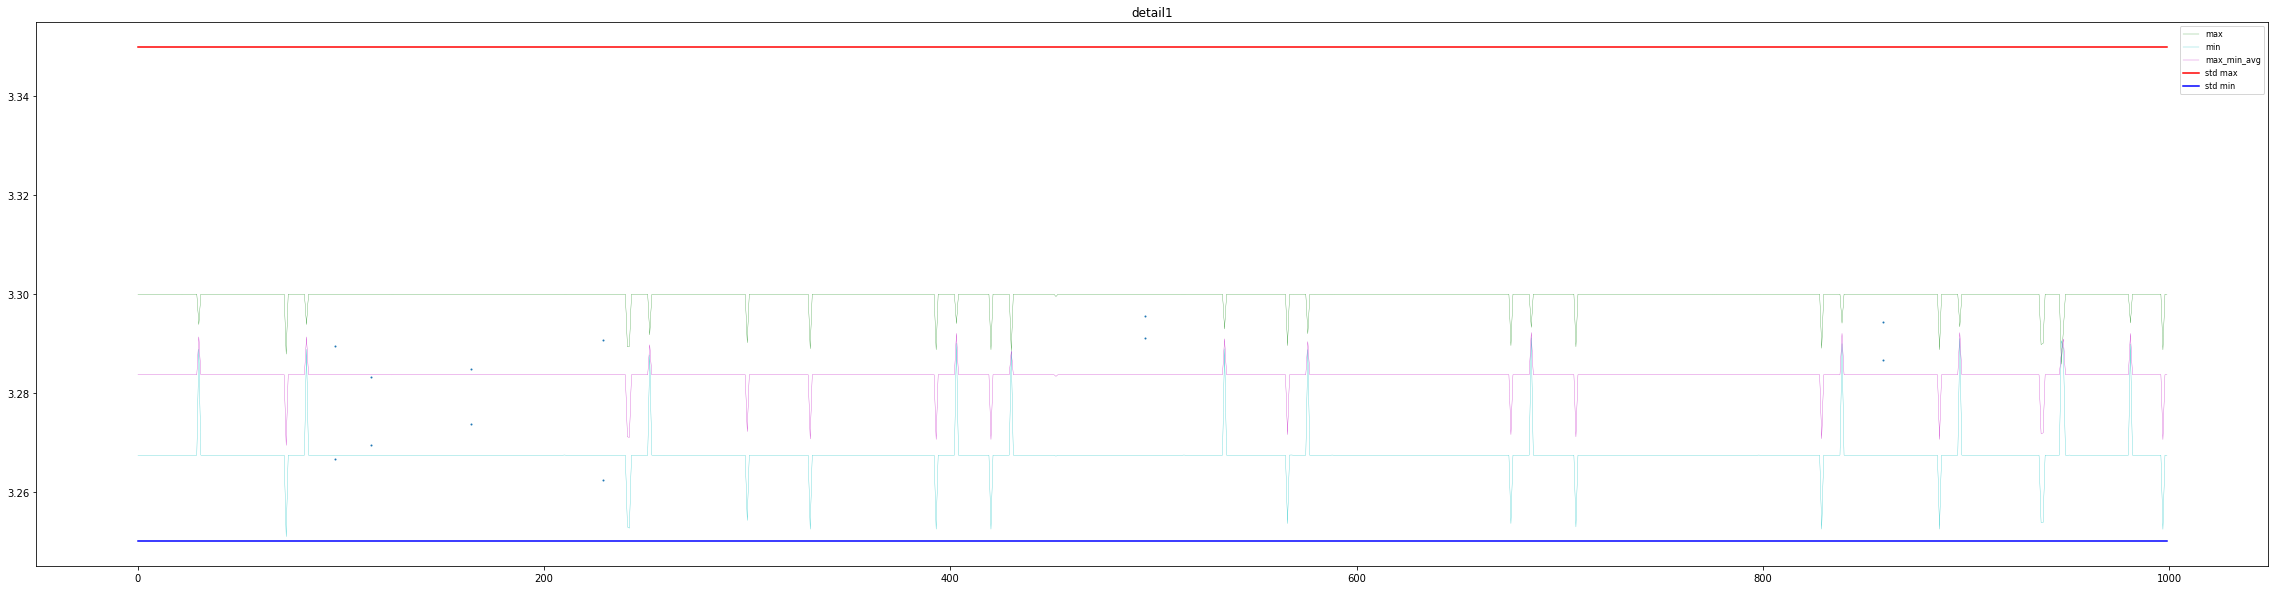

detail2


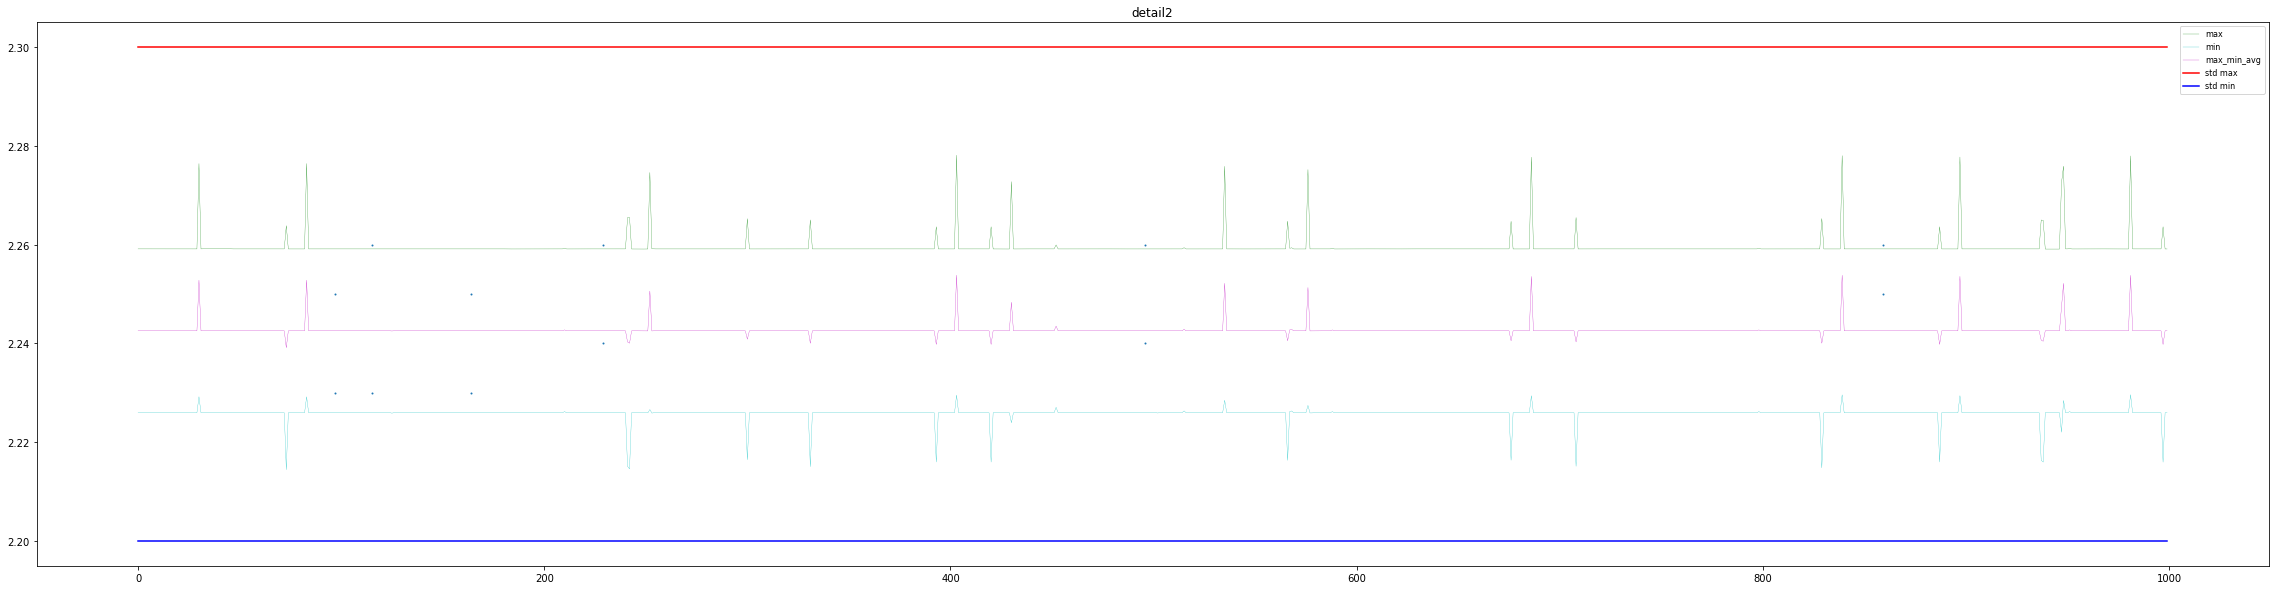

detail3


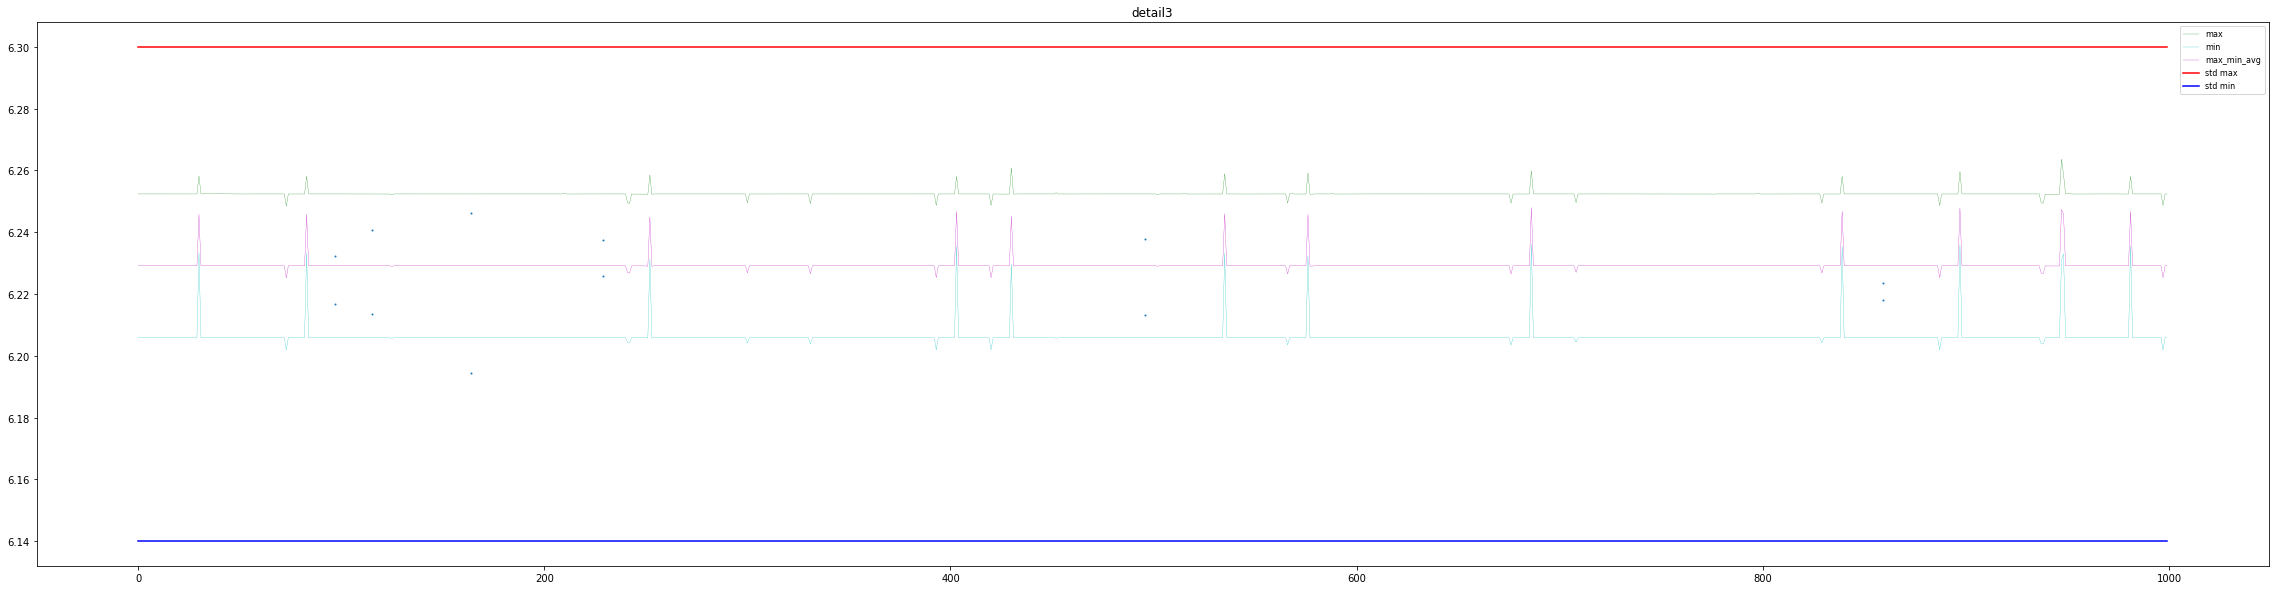

detail4


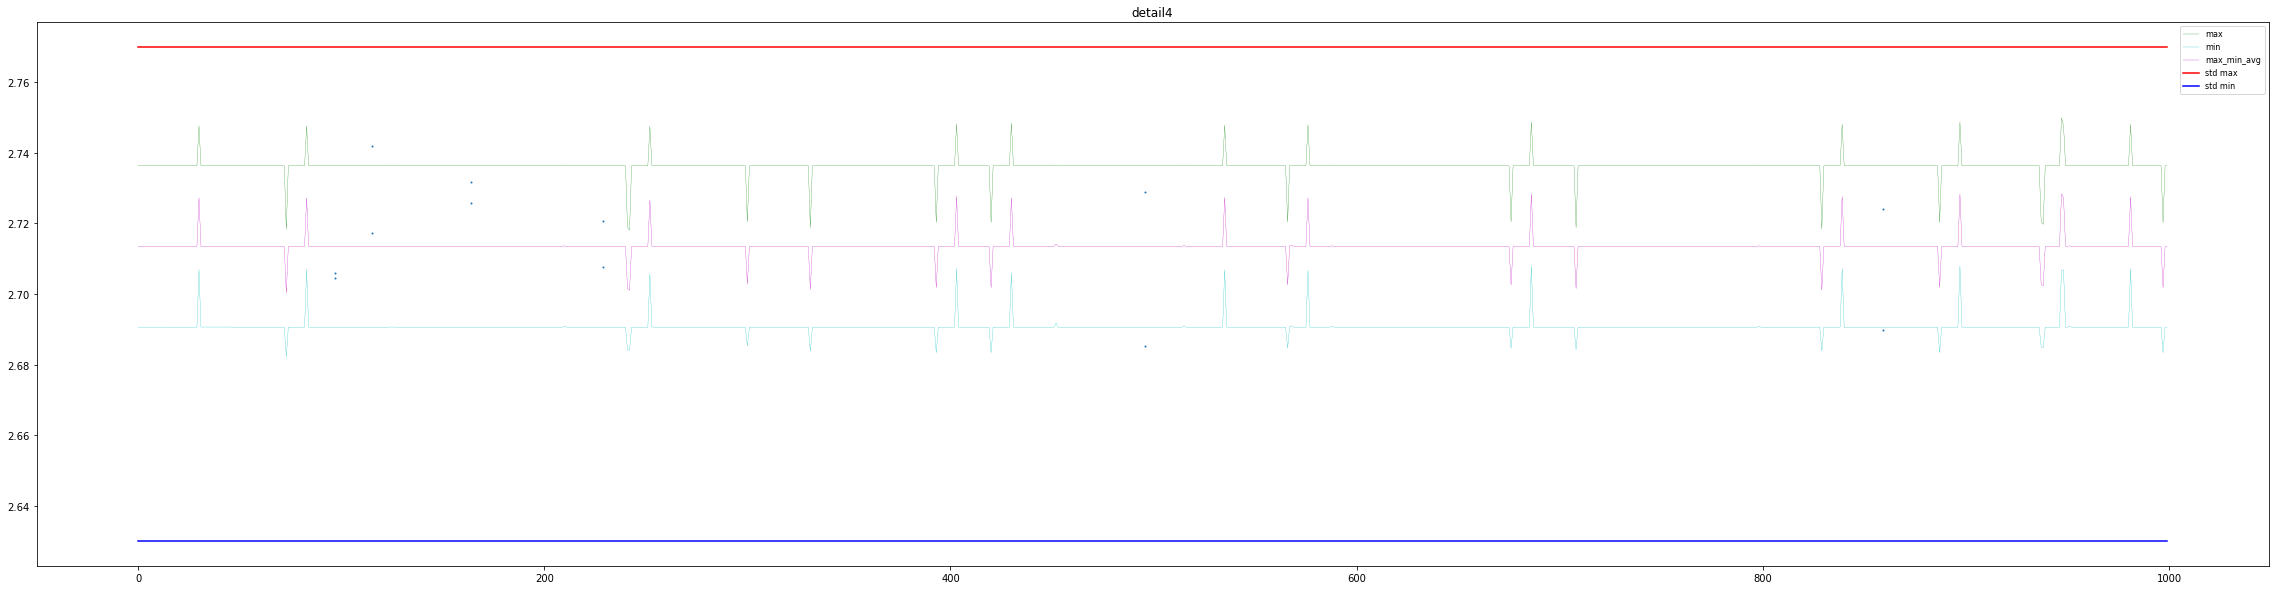

detail5


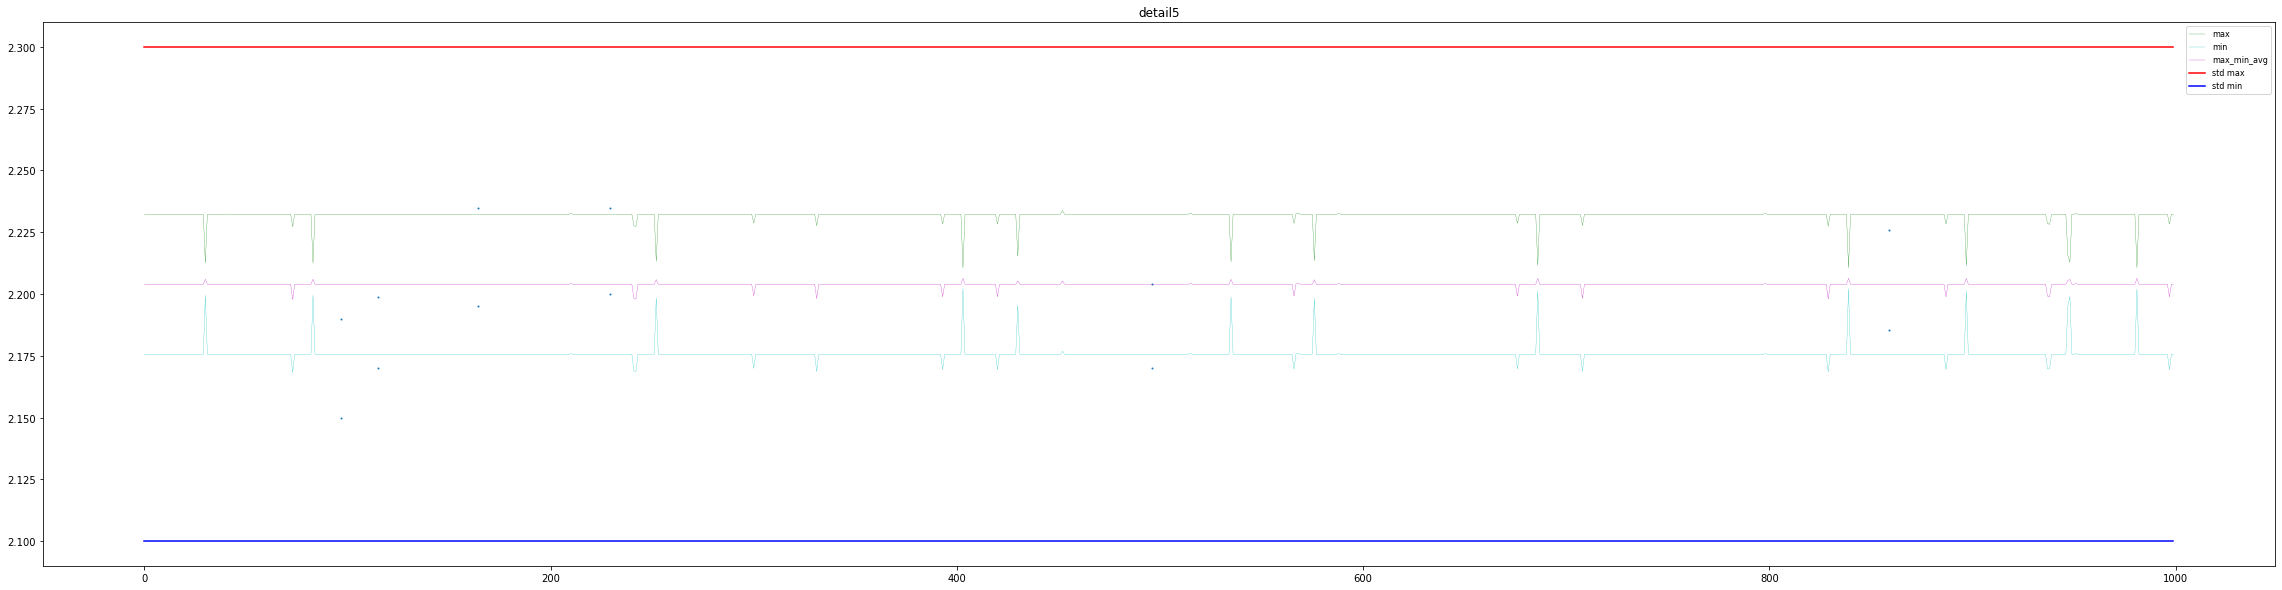

detail6


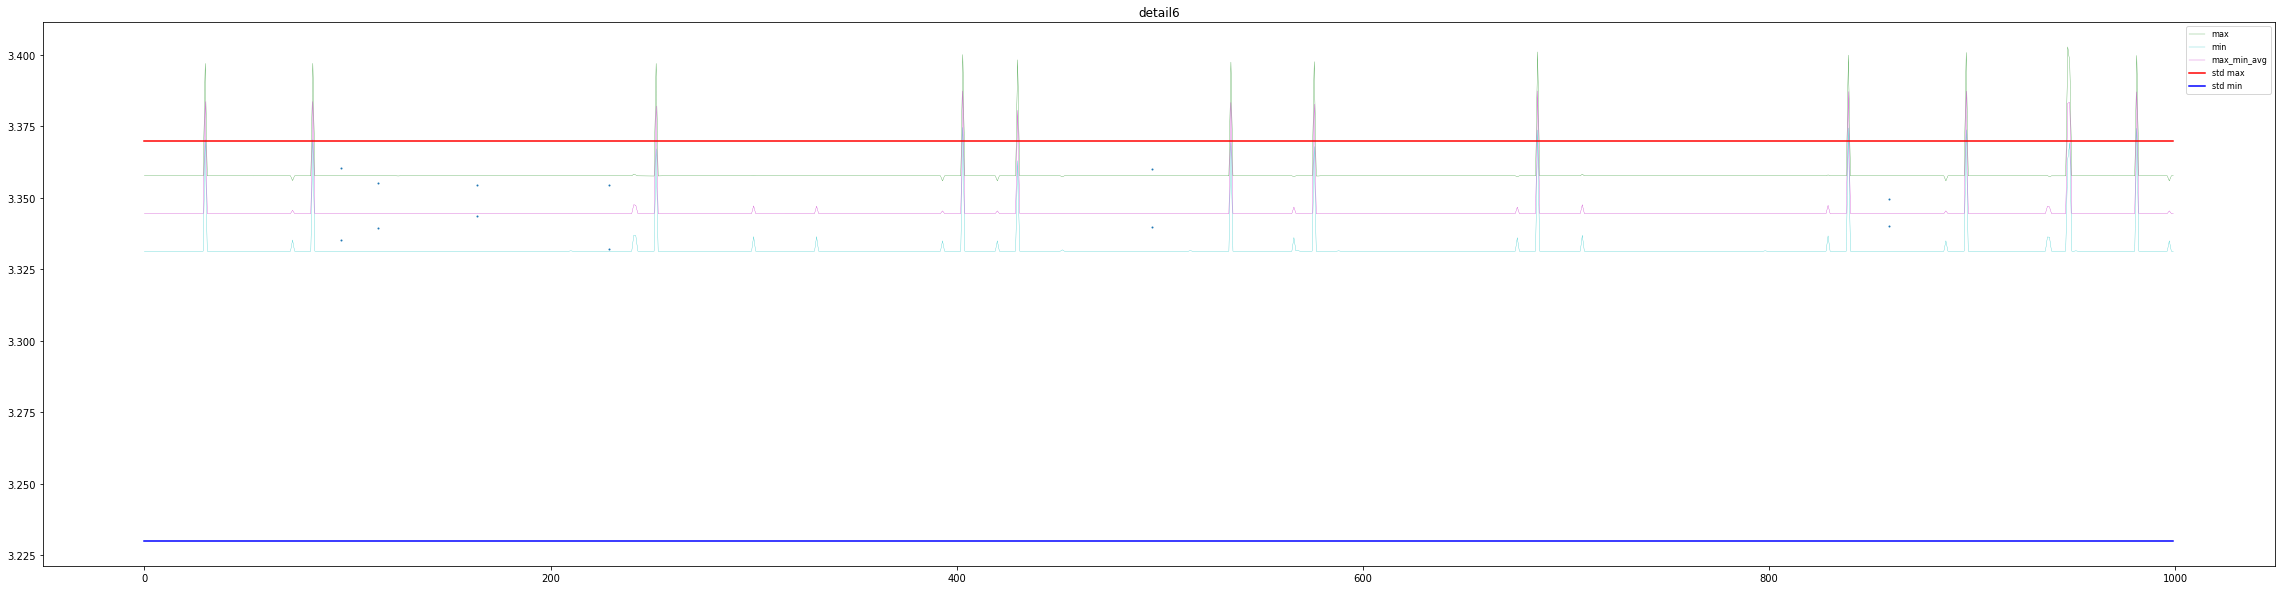

detail7


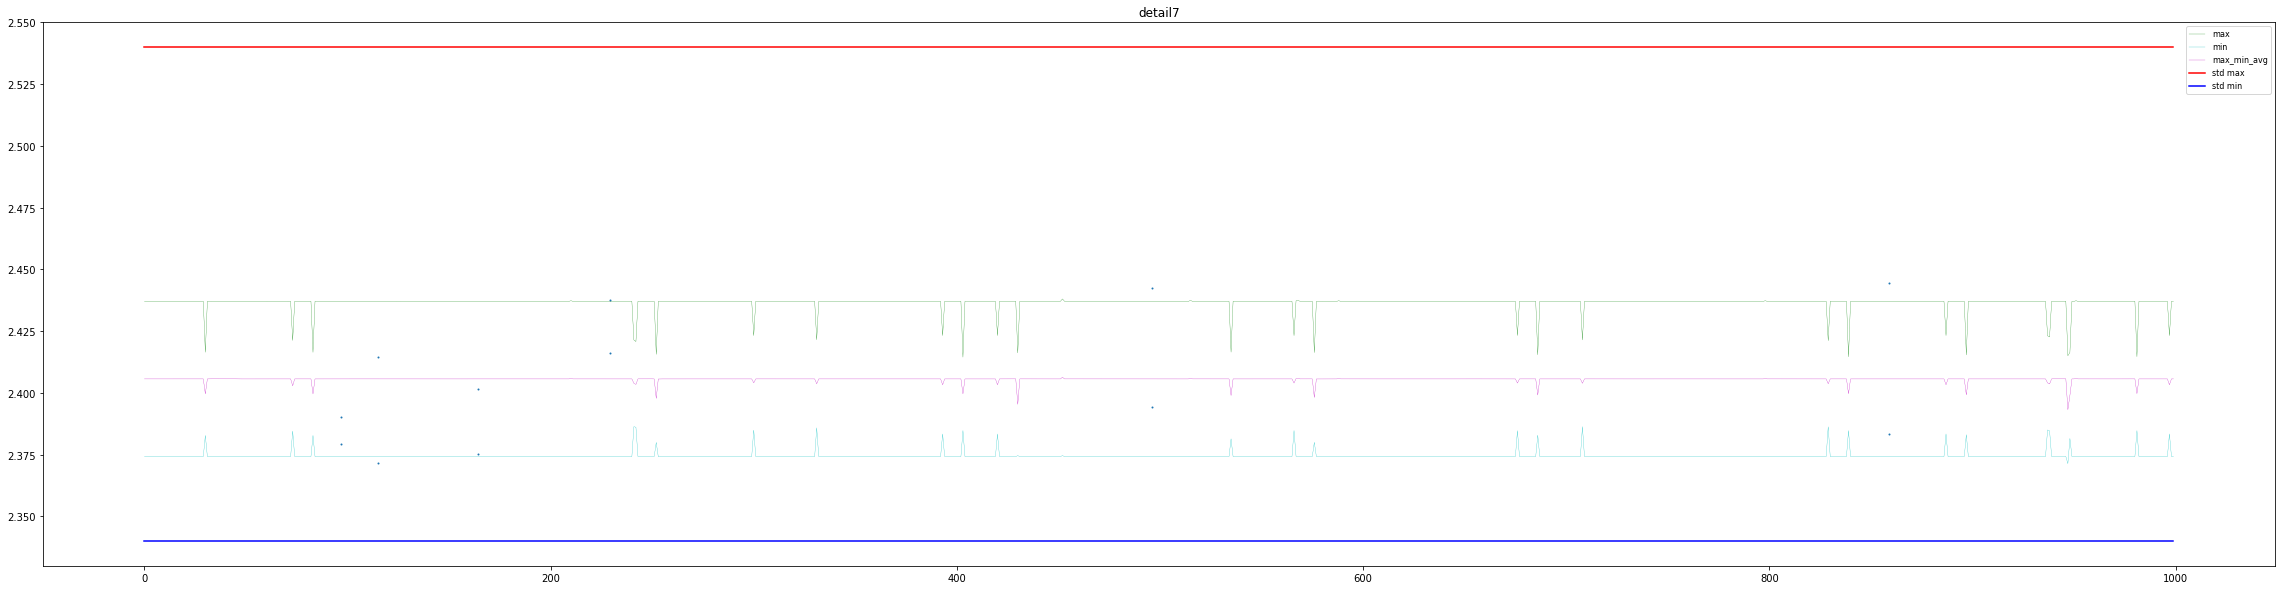

detail8


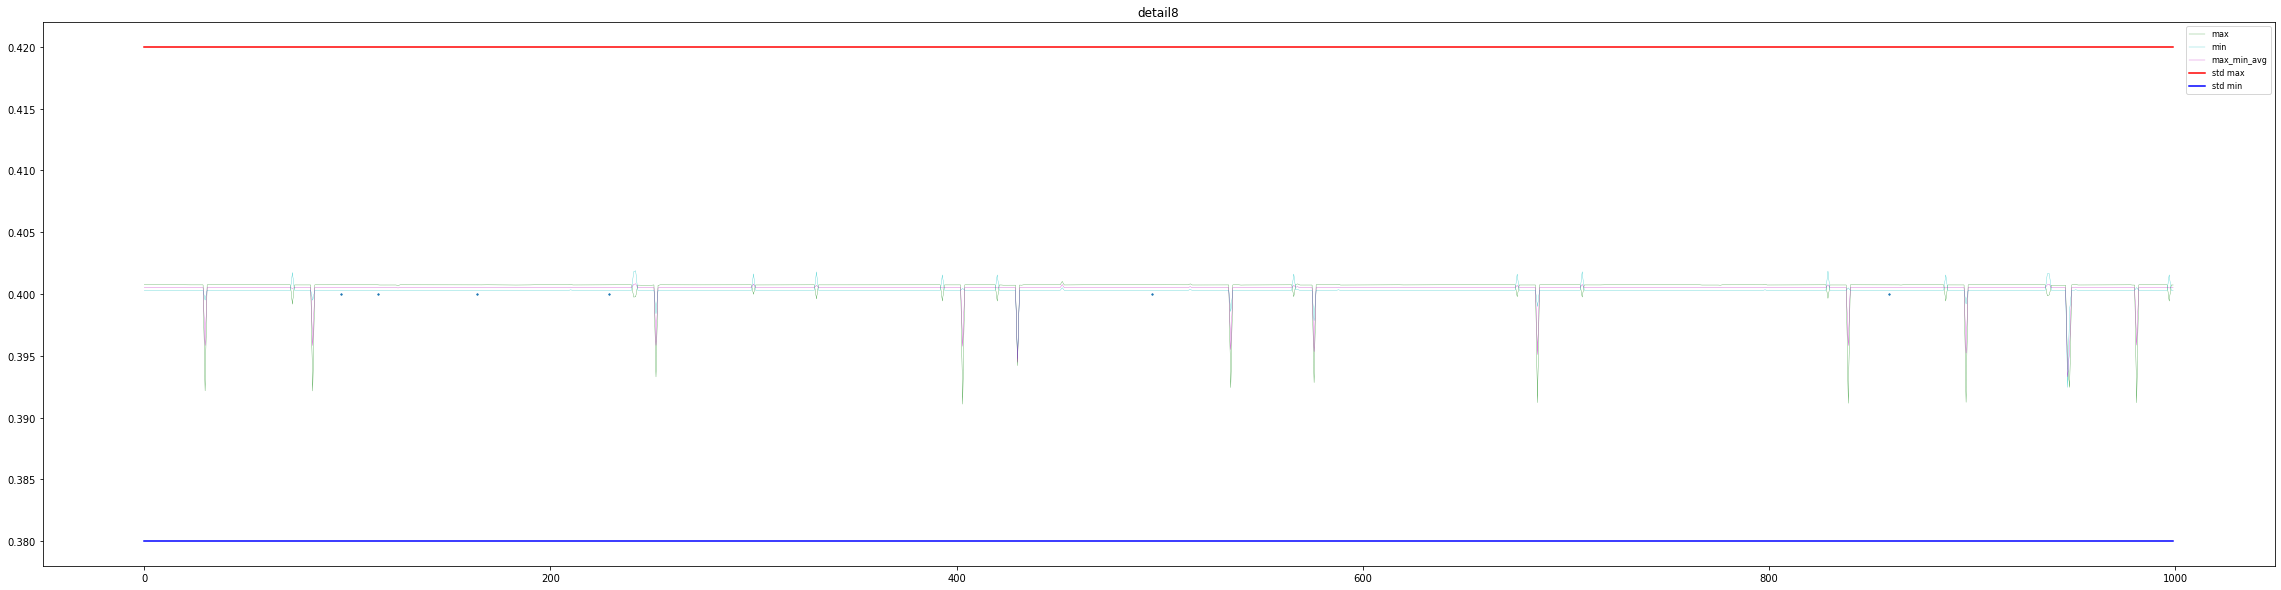

detail9


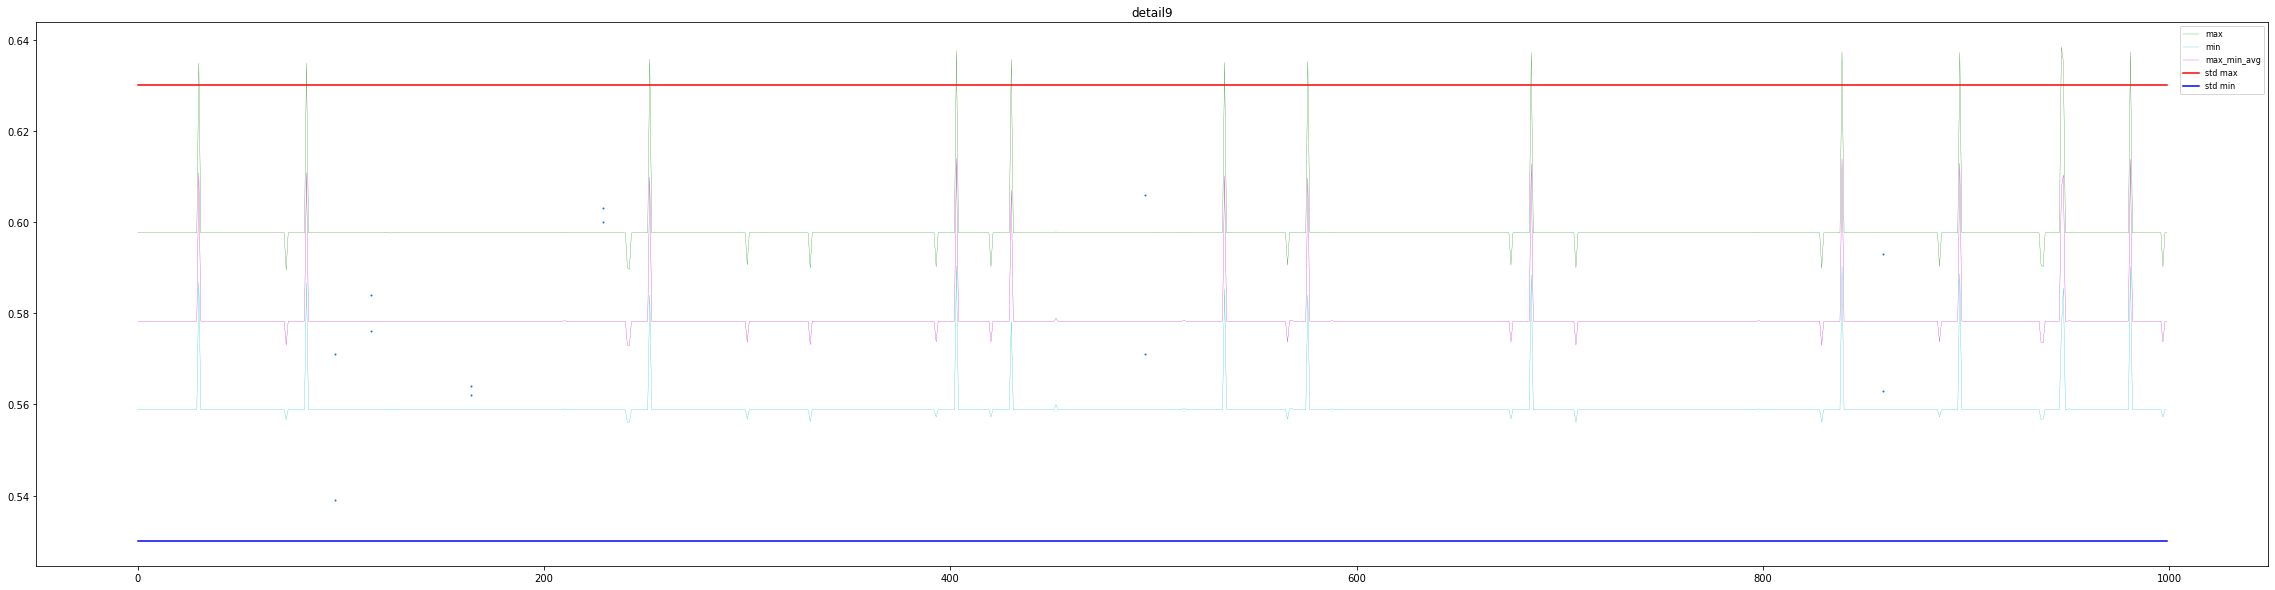

detail10


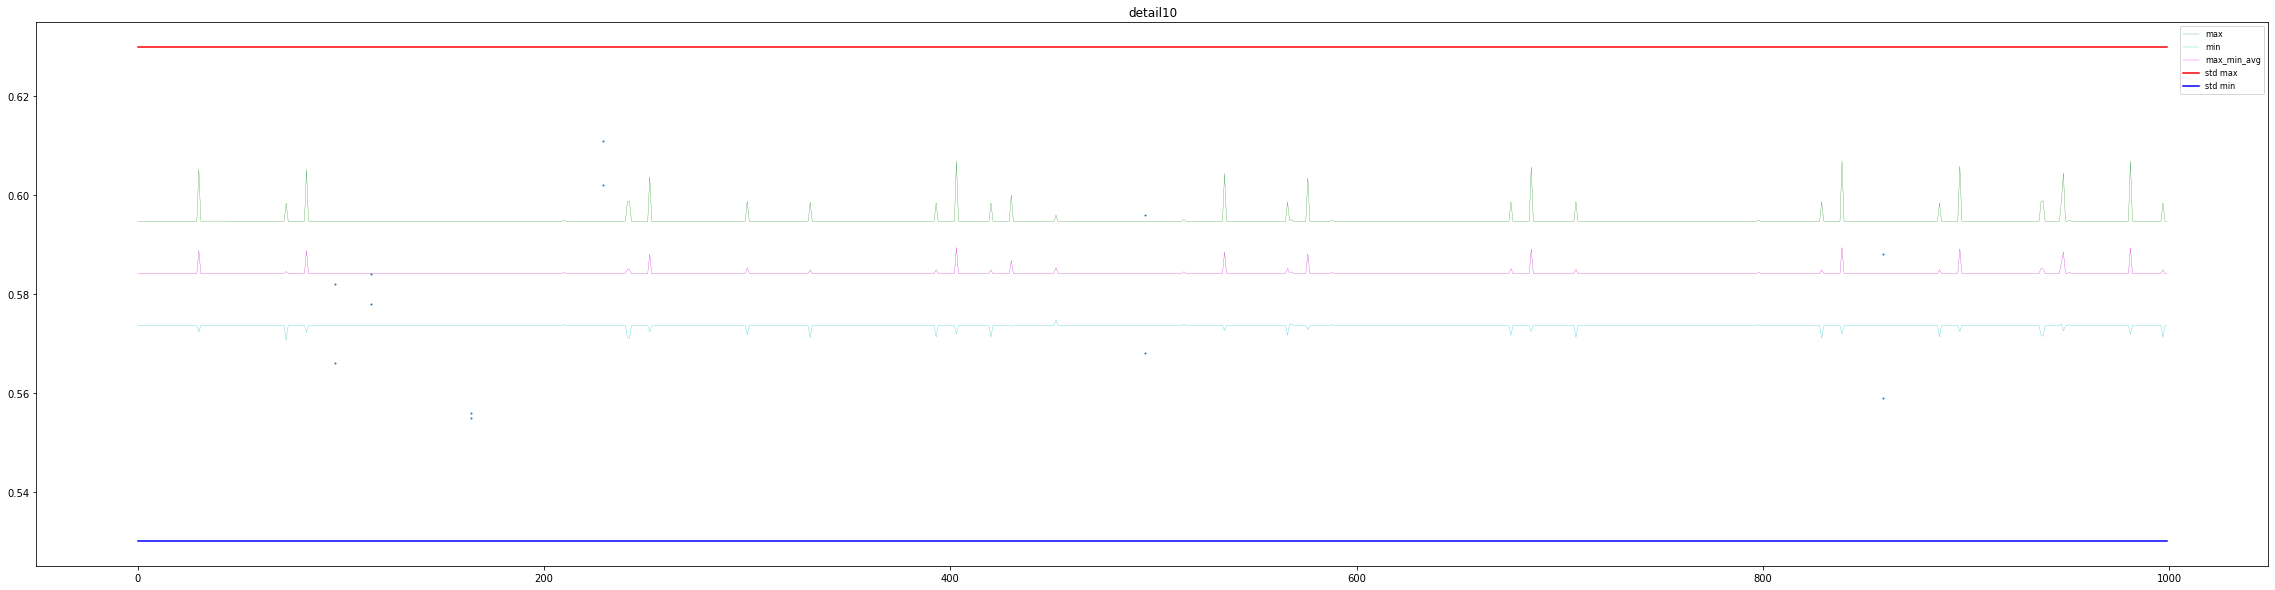

detail11


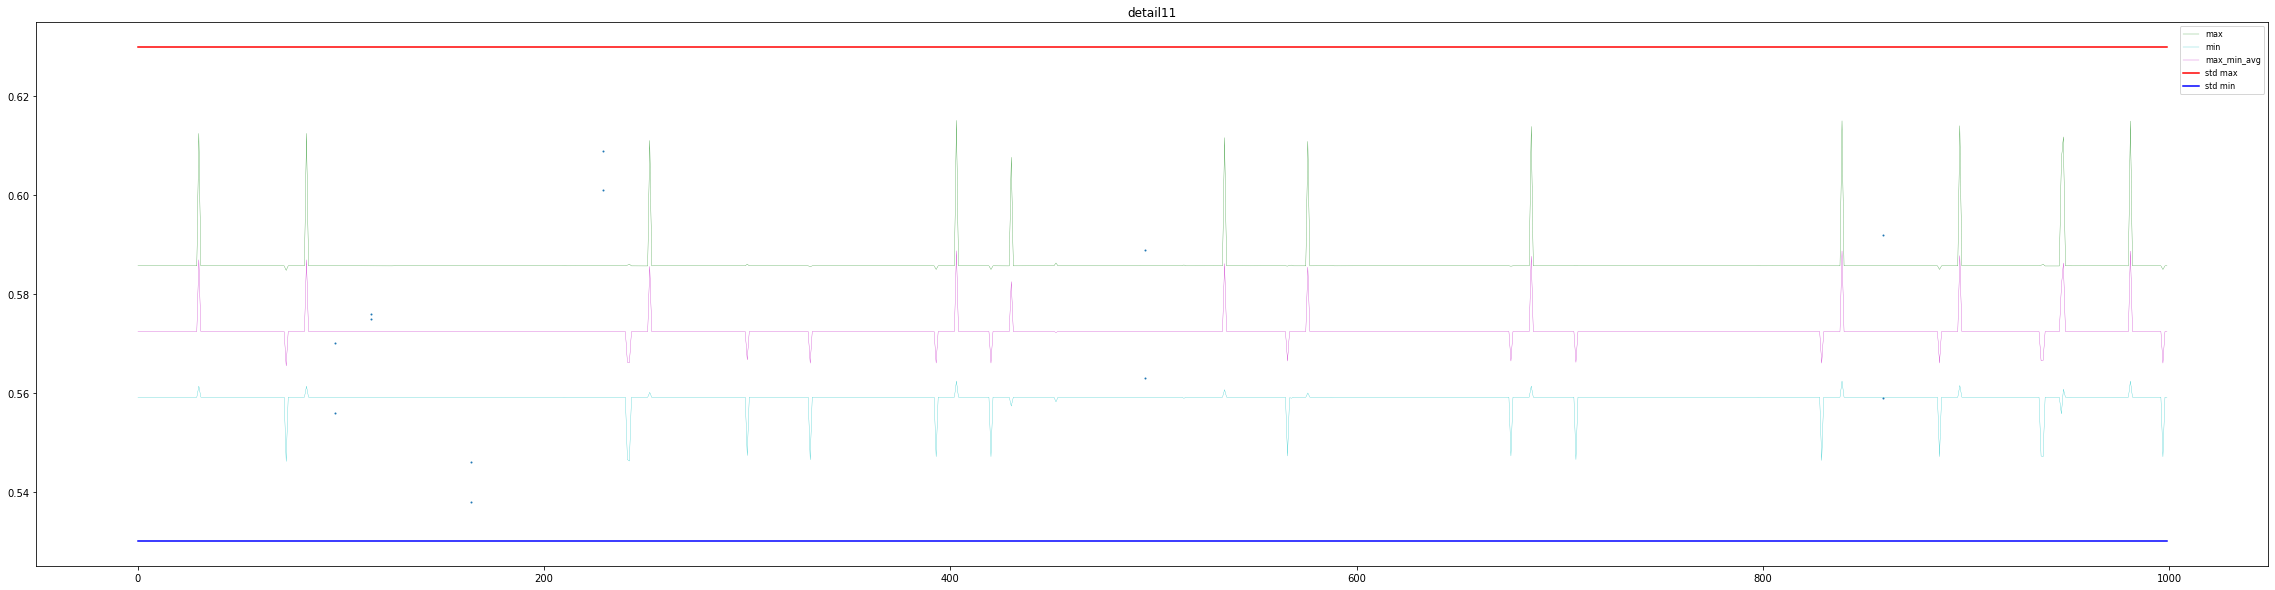

detail12


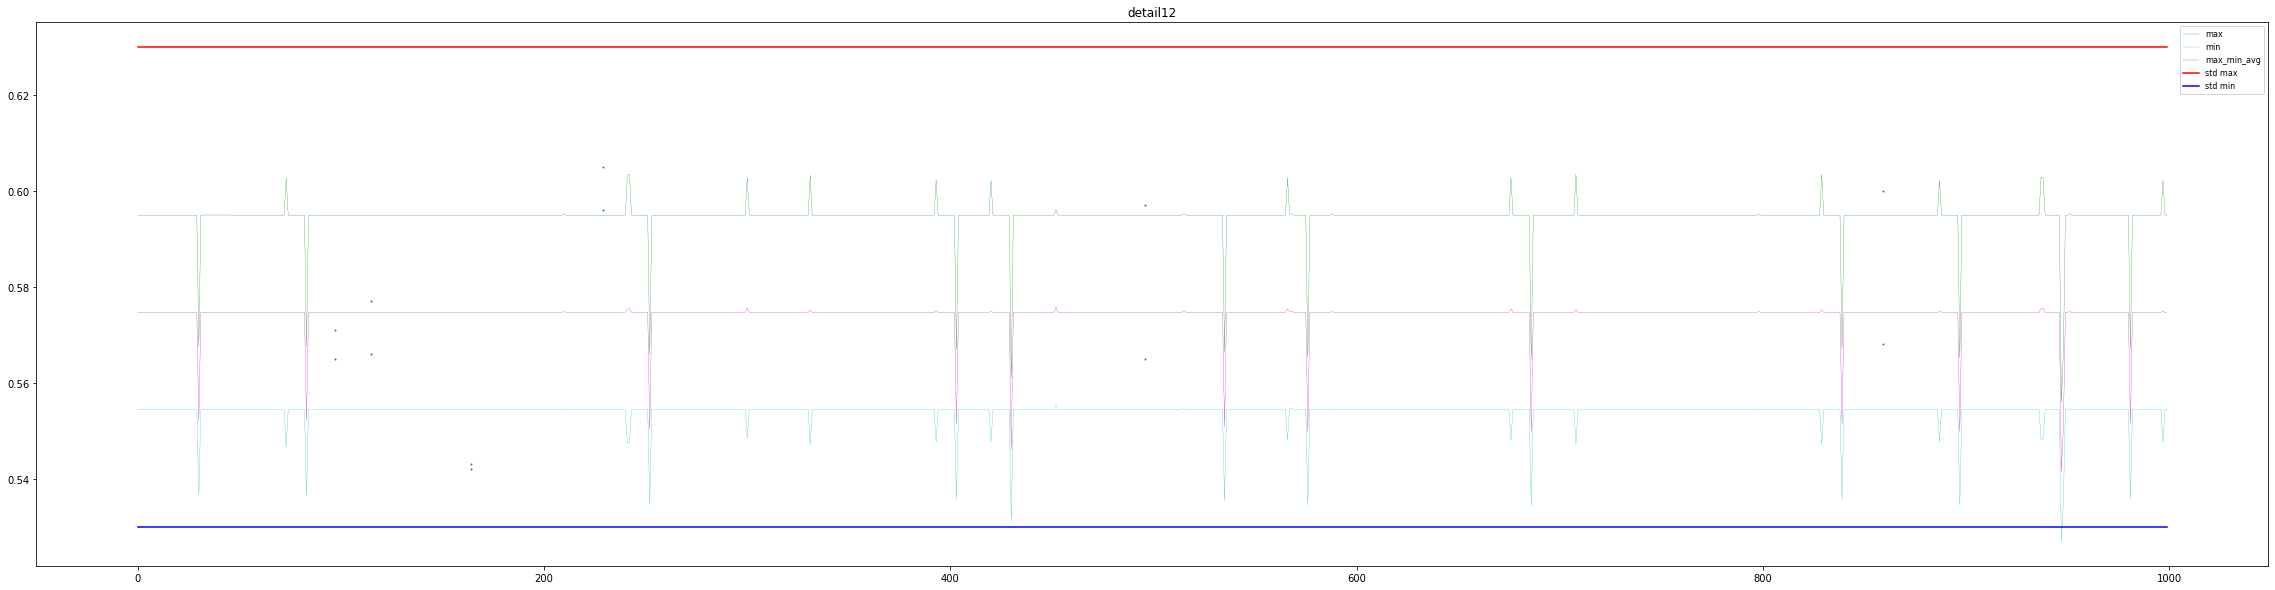

detail13


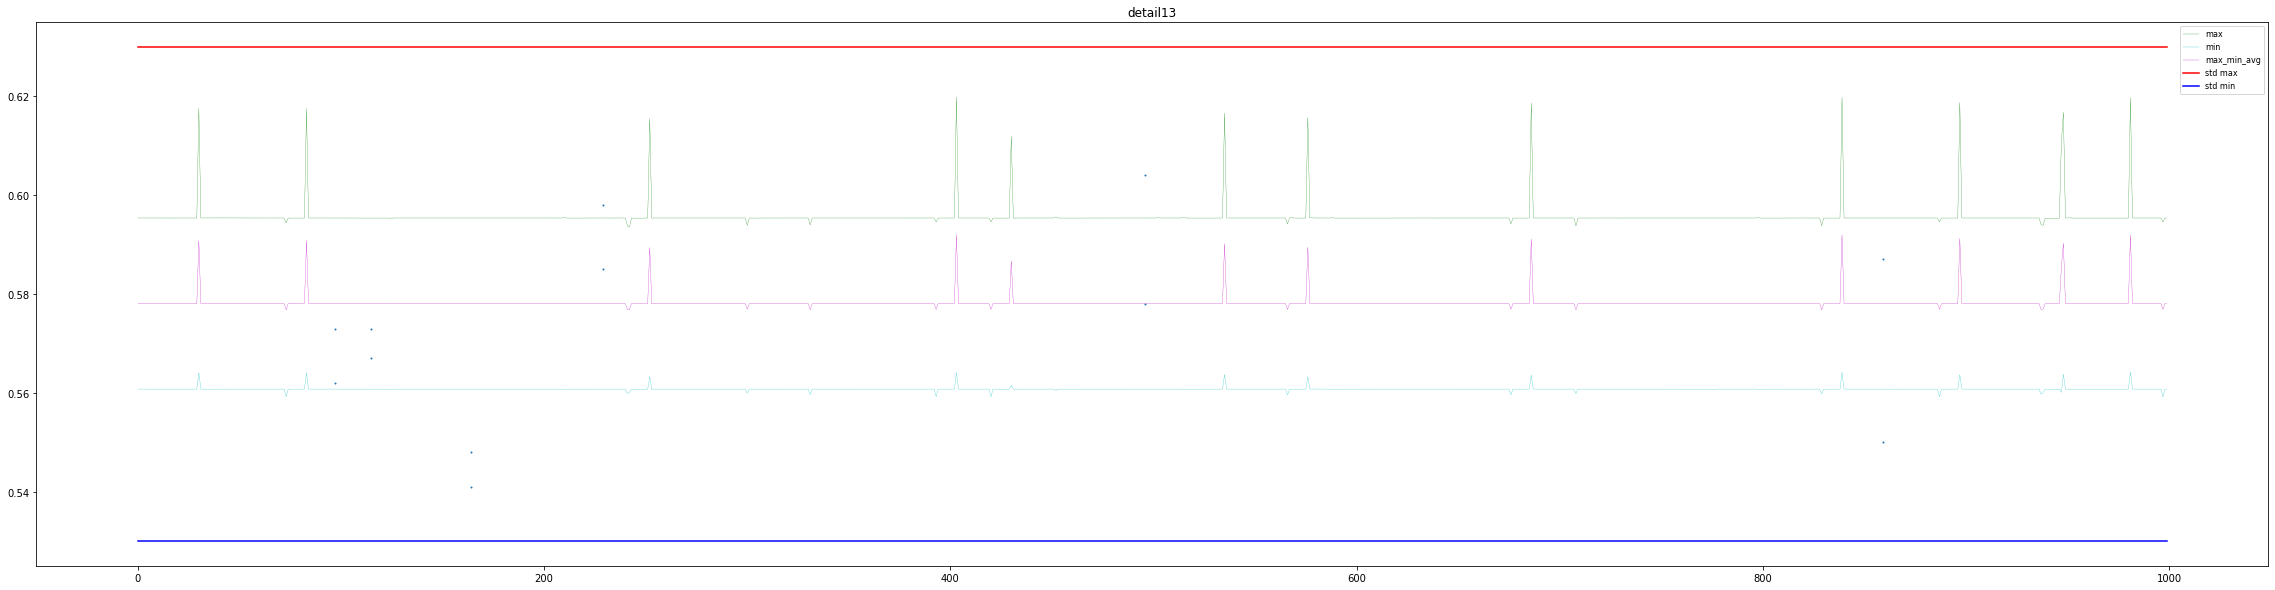

detail1


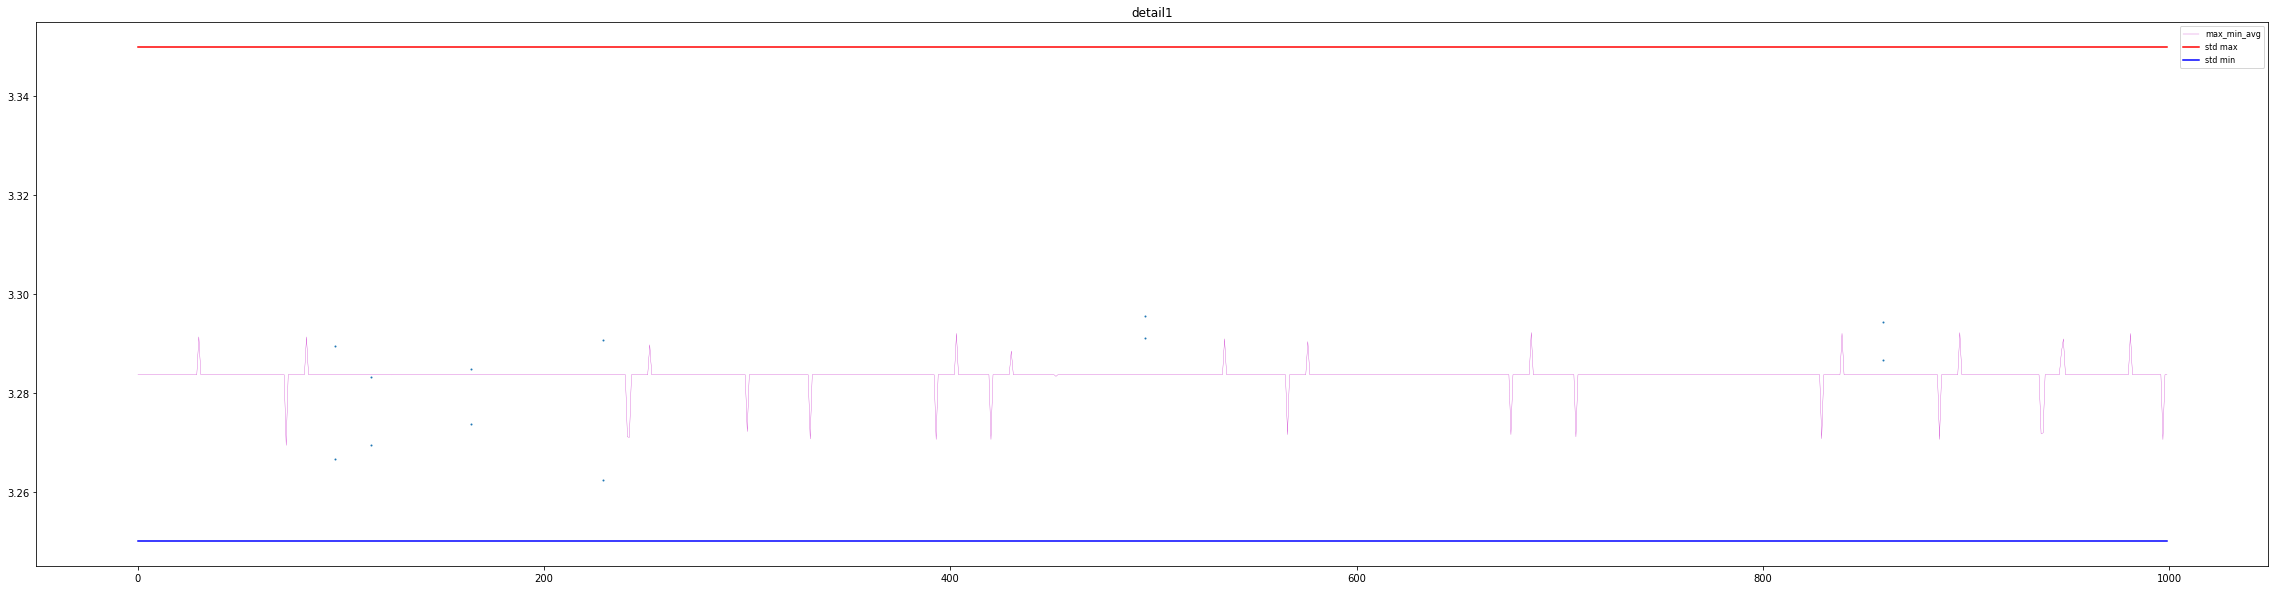

detail2


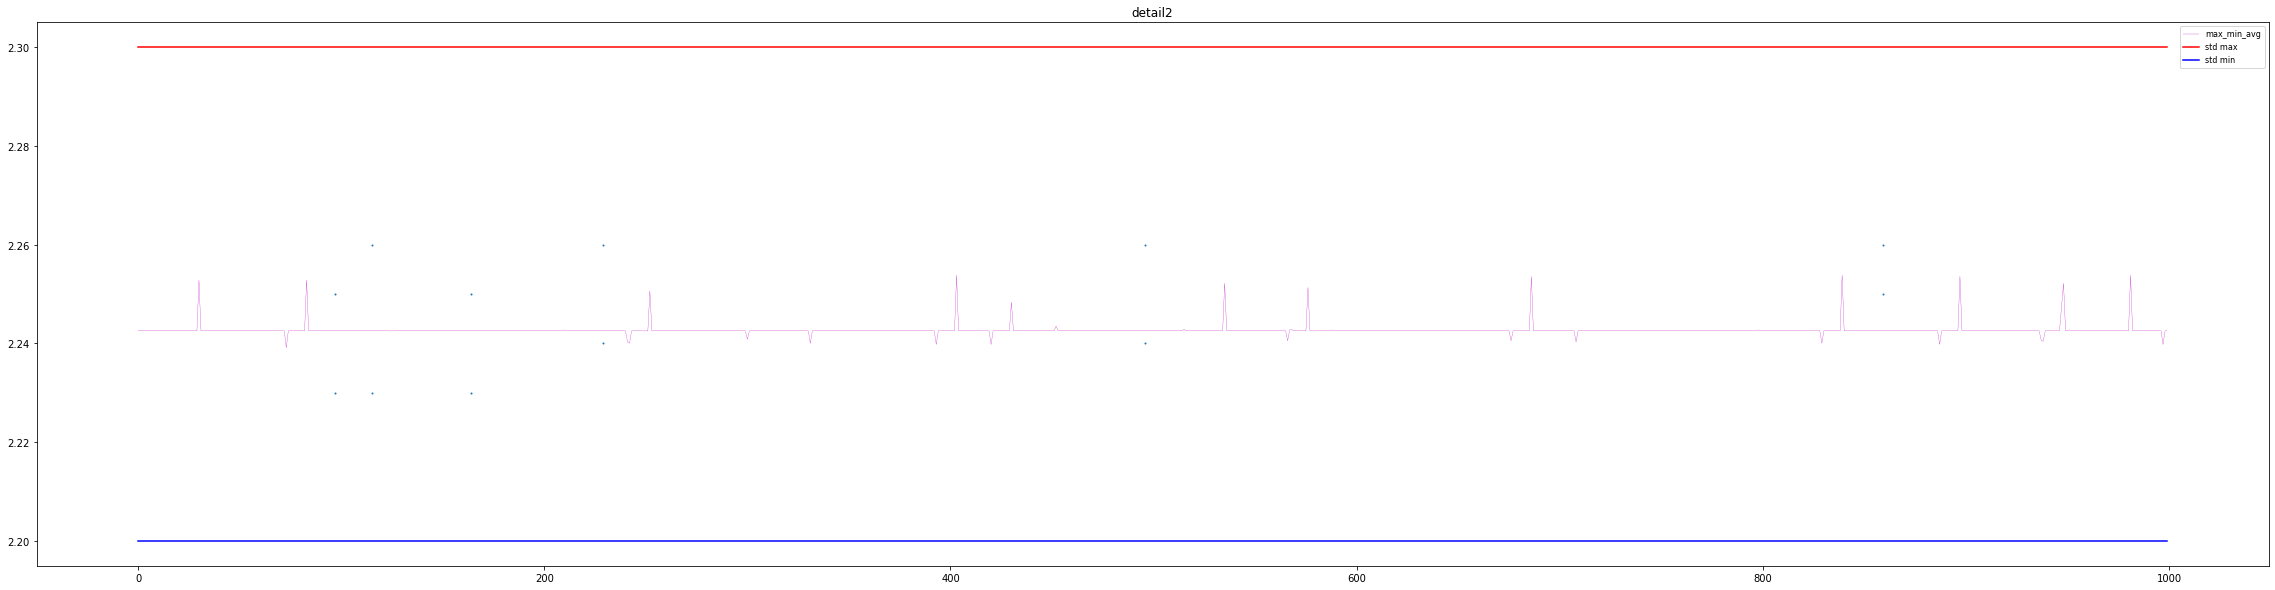

detail3


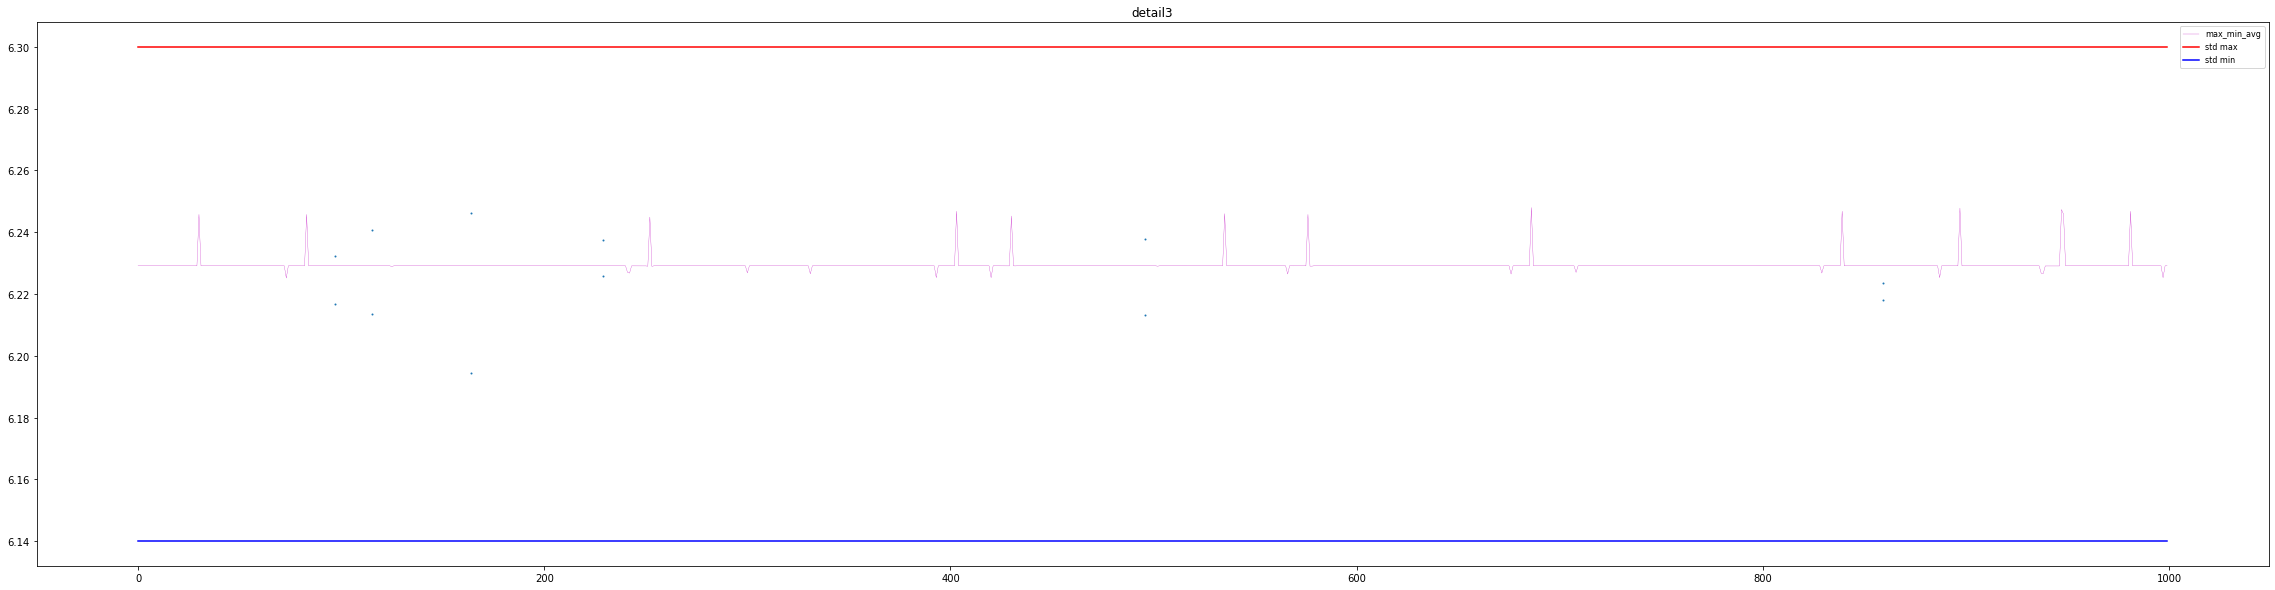

detail4


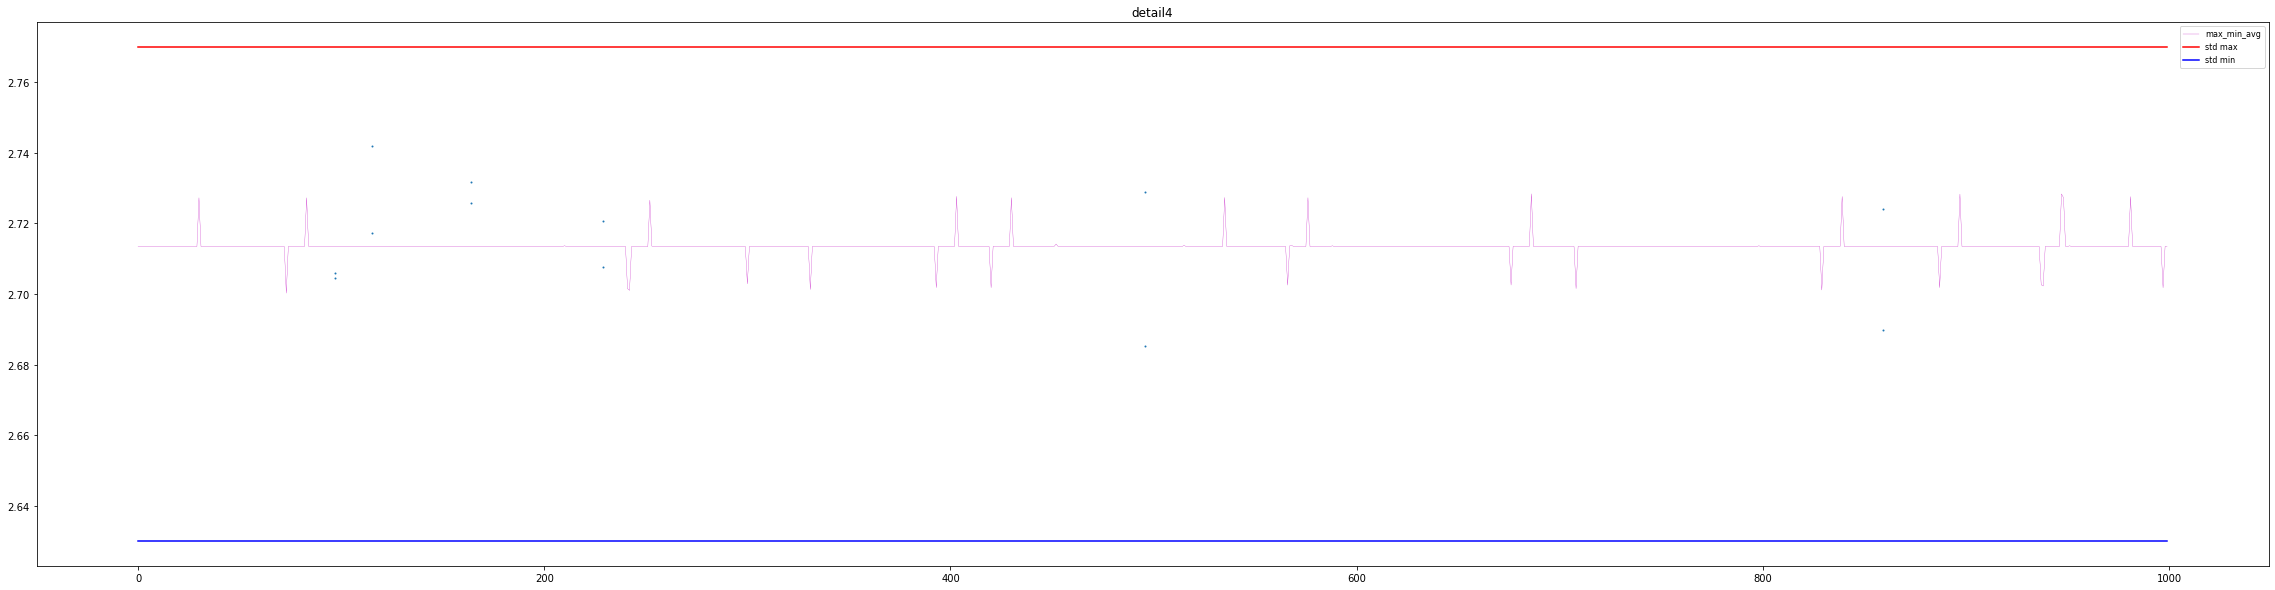

detail5


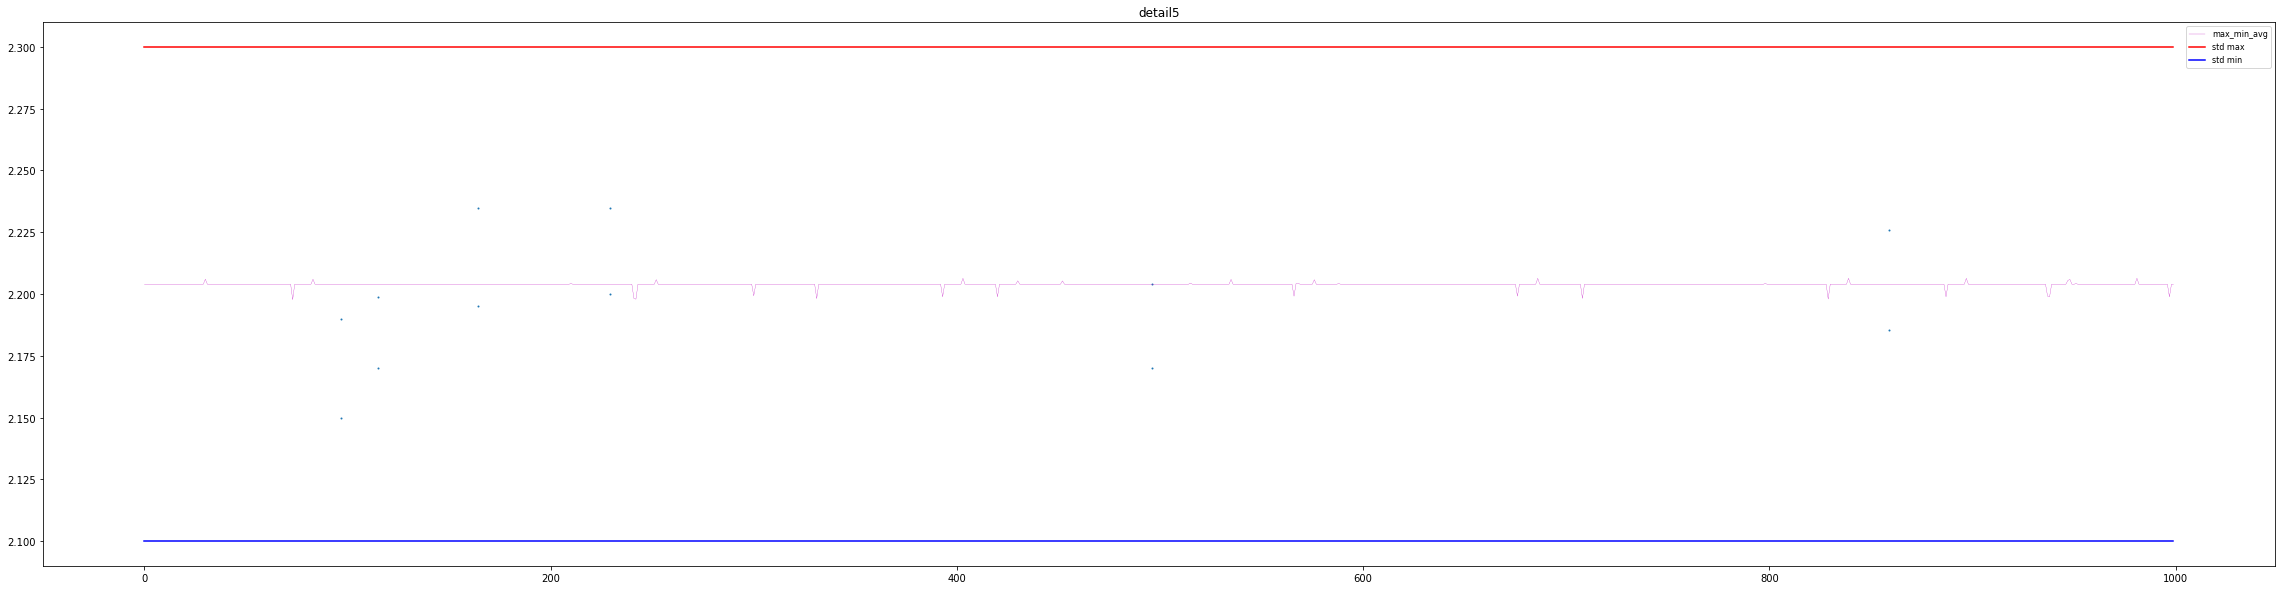

detail6


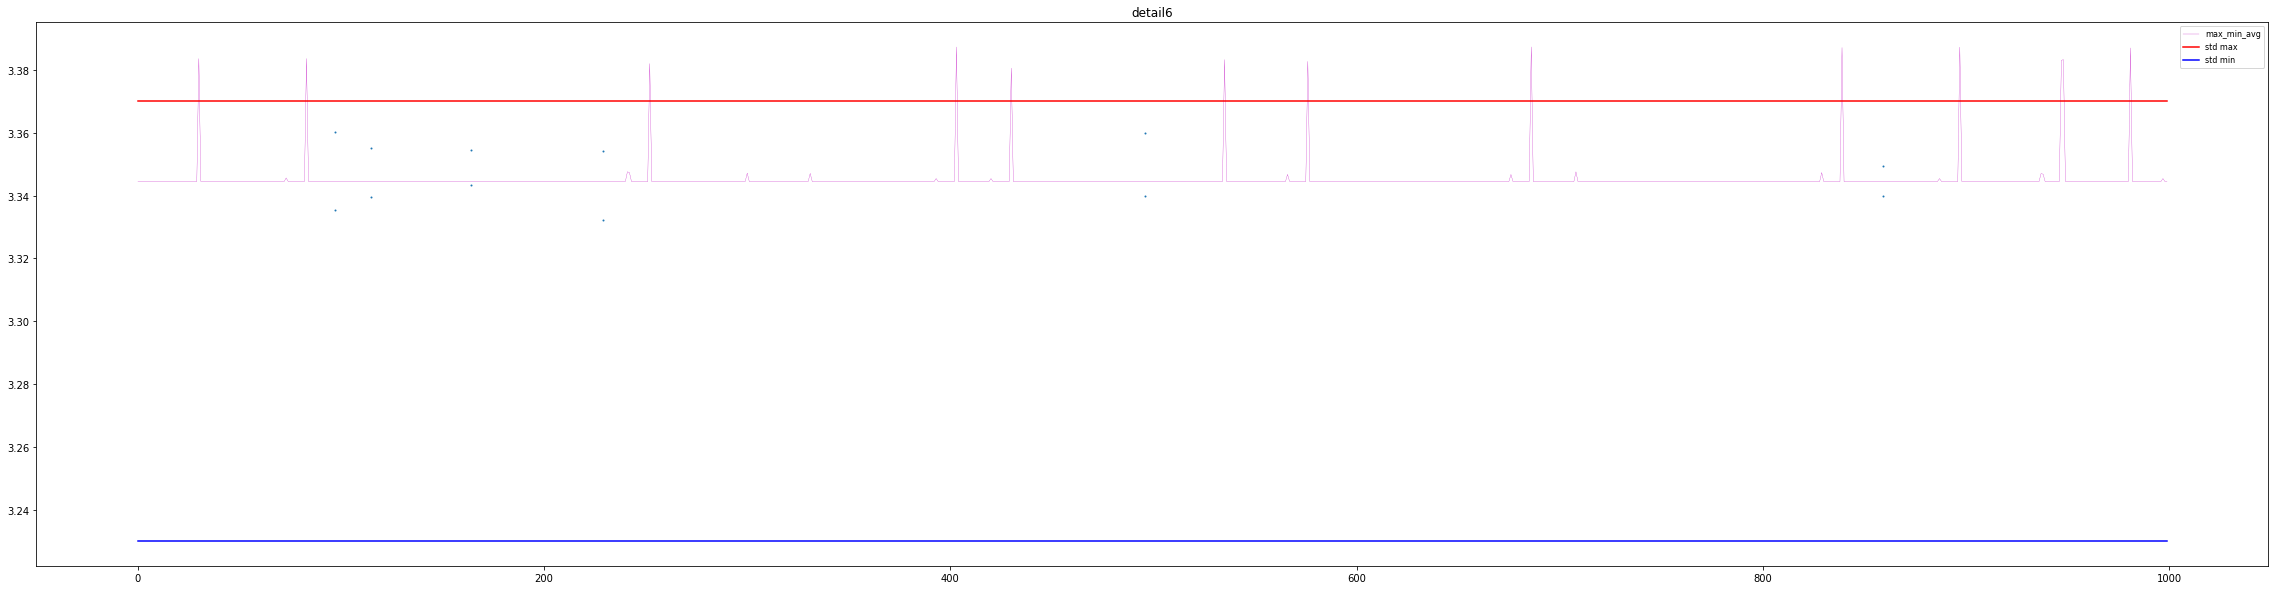

detail7


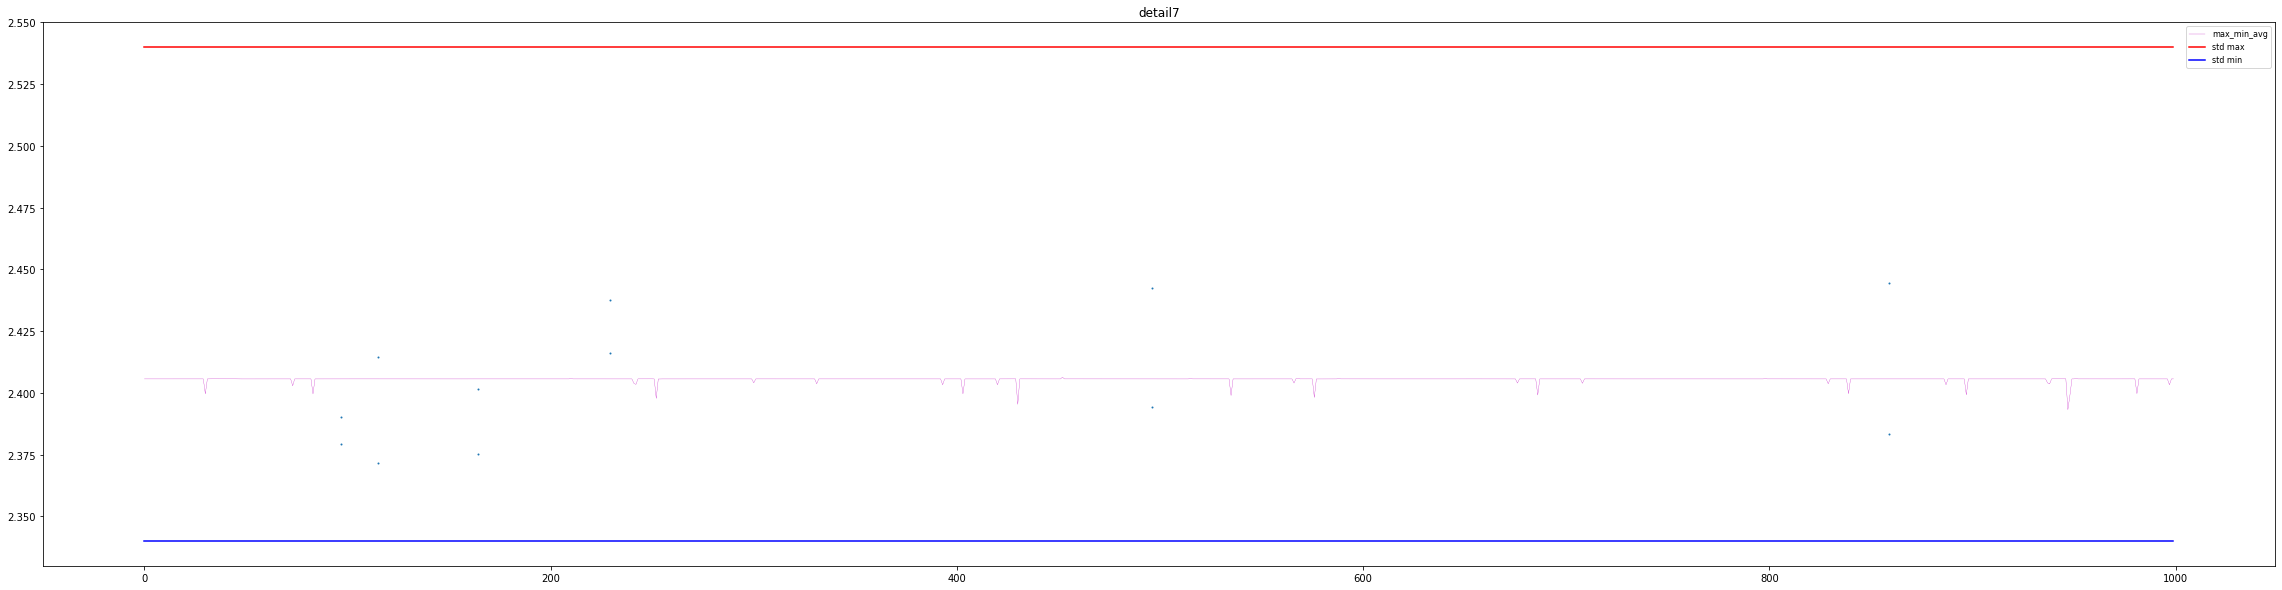

detail8


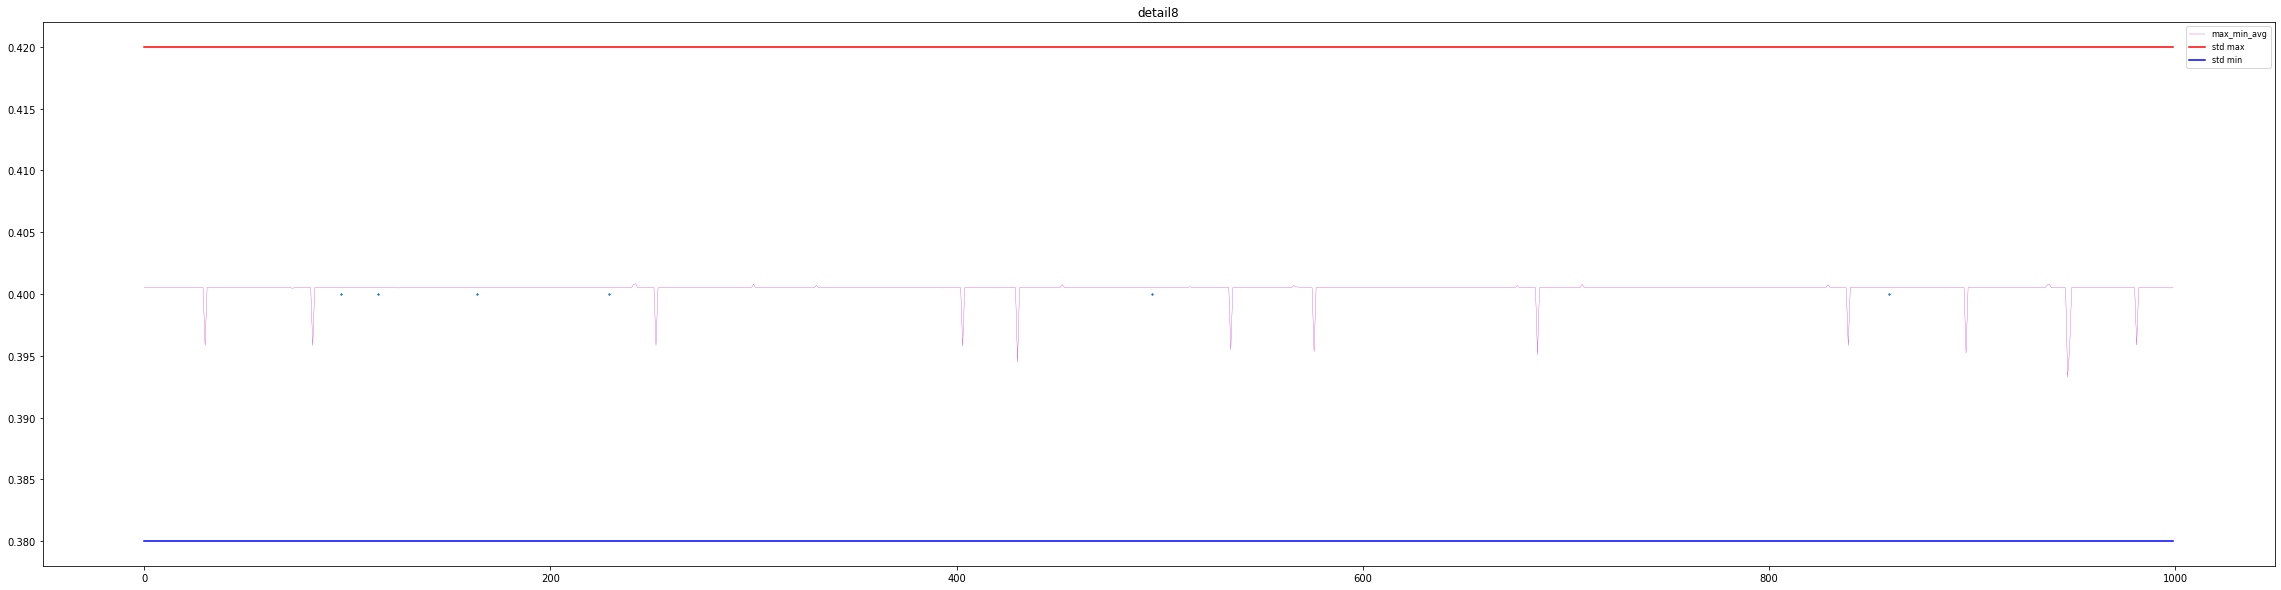

detail9


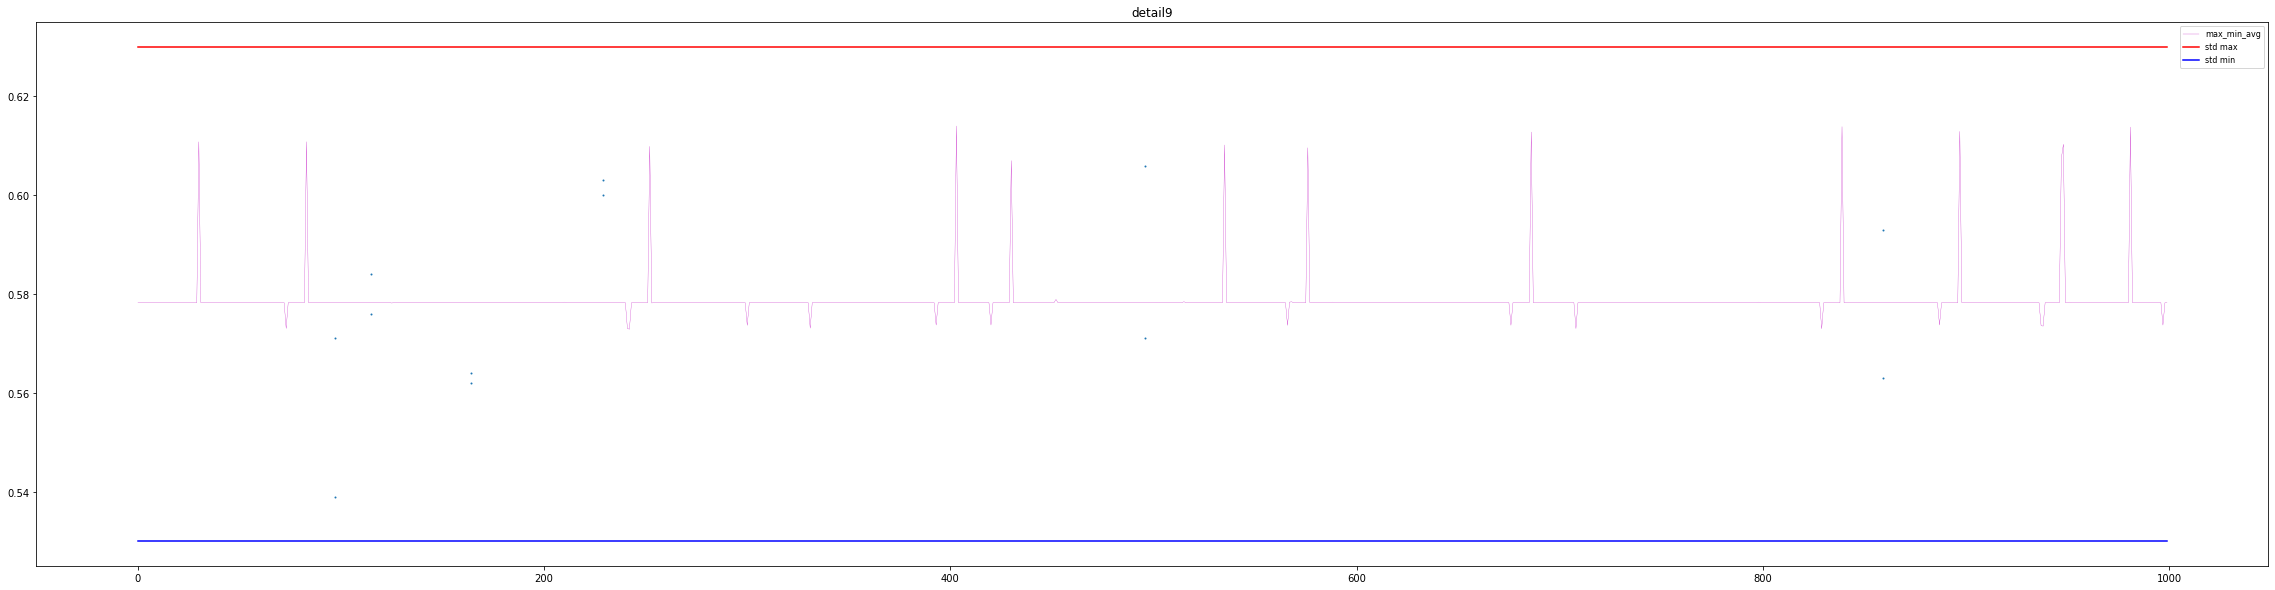

detail10


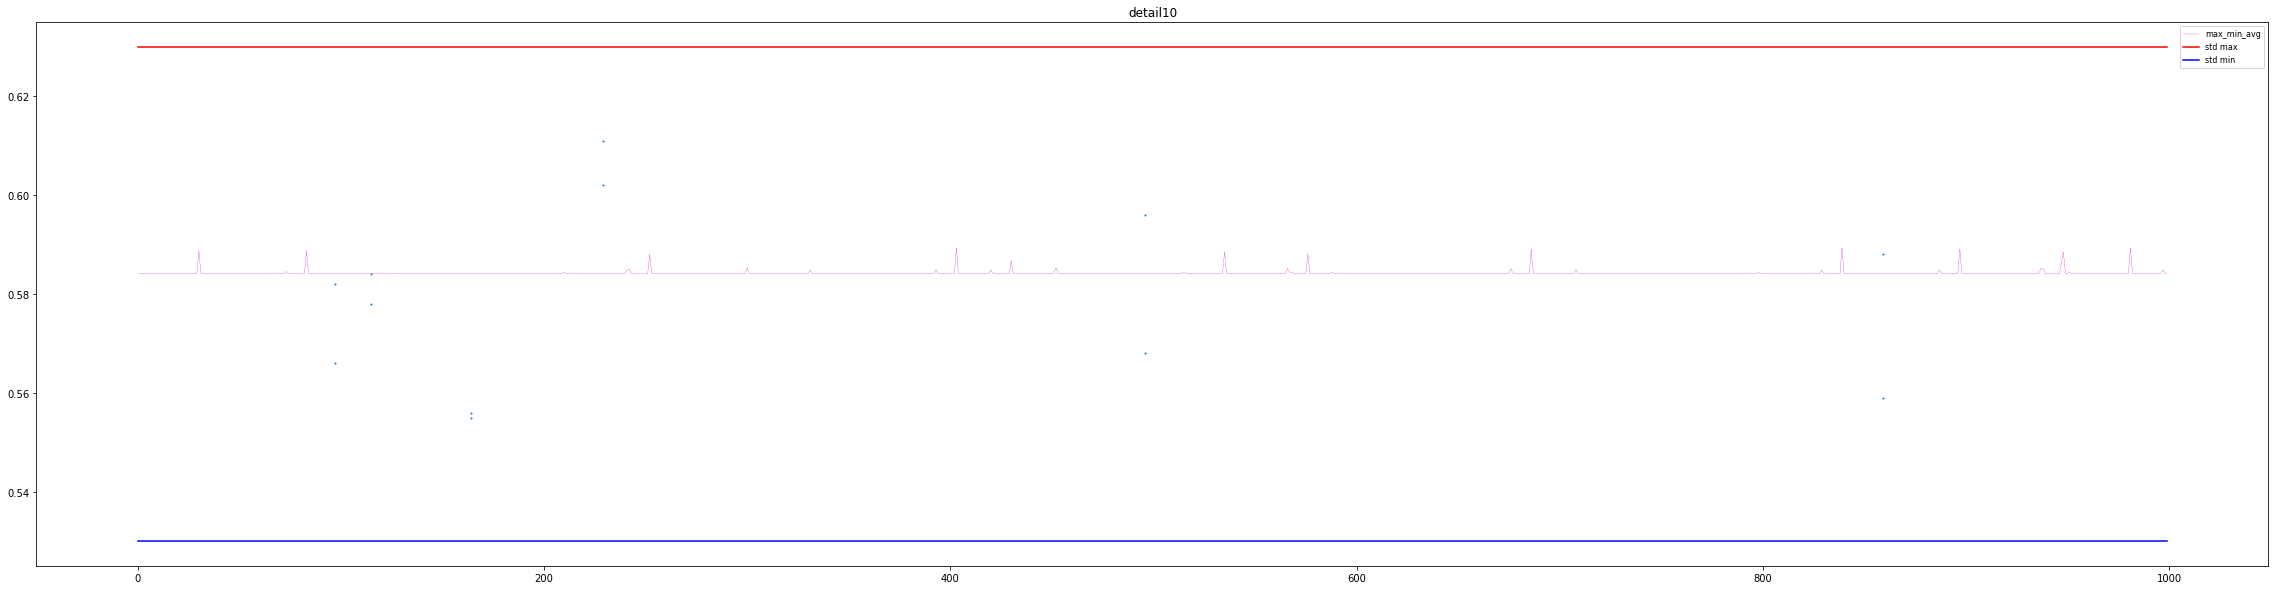

detail11


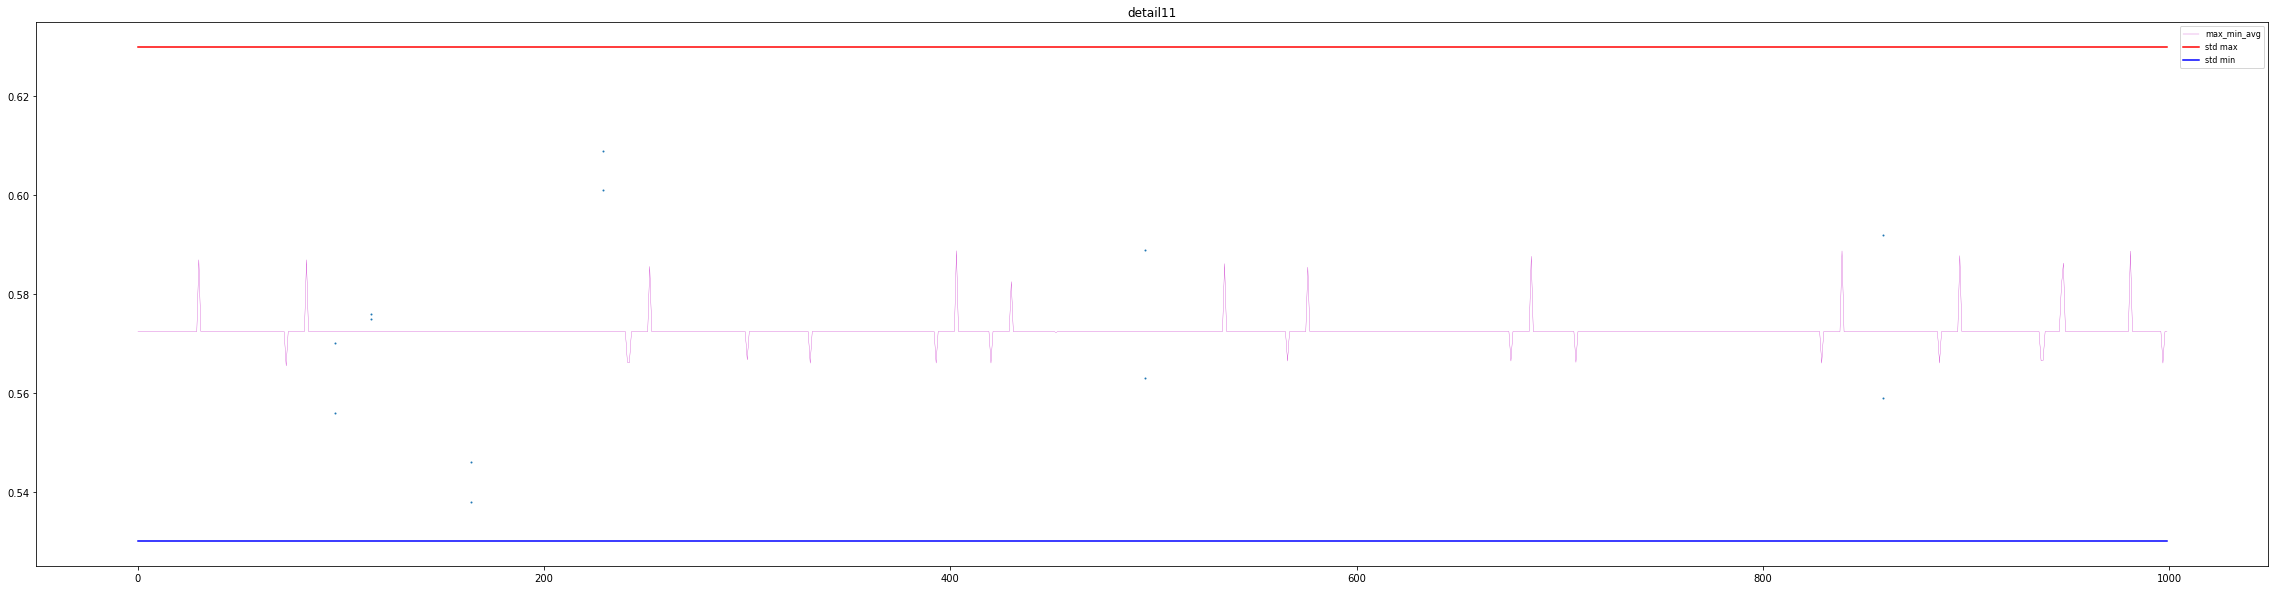

detail12


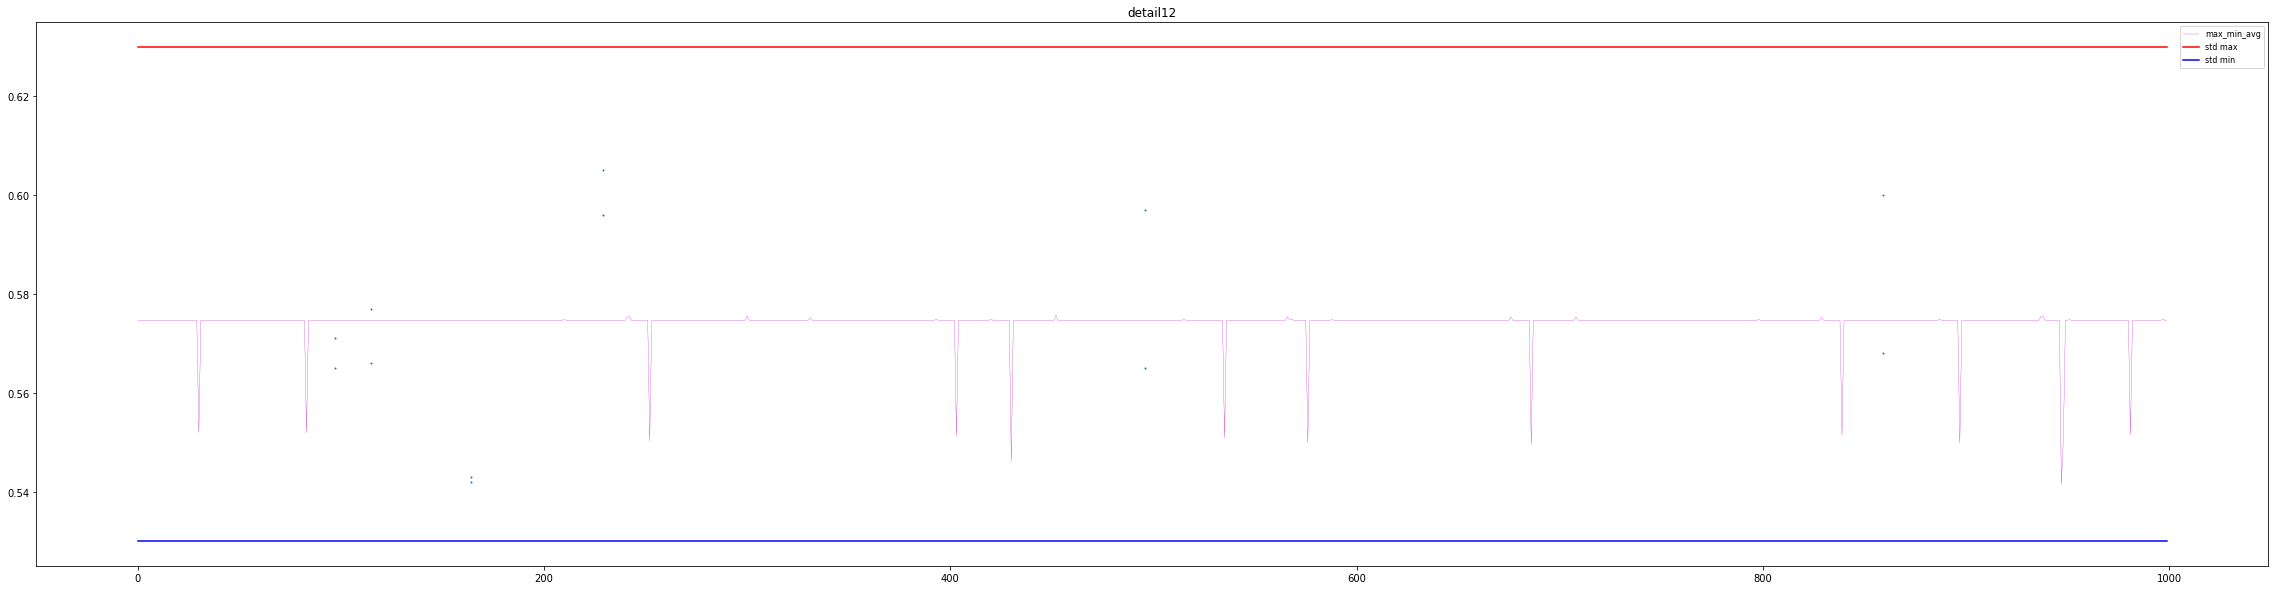

detail13


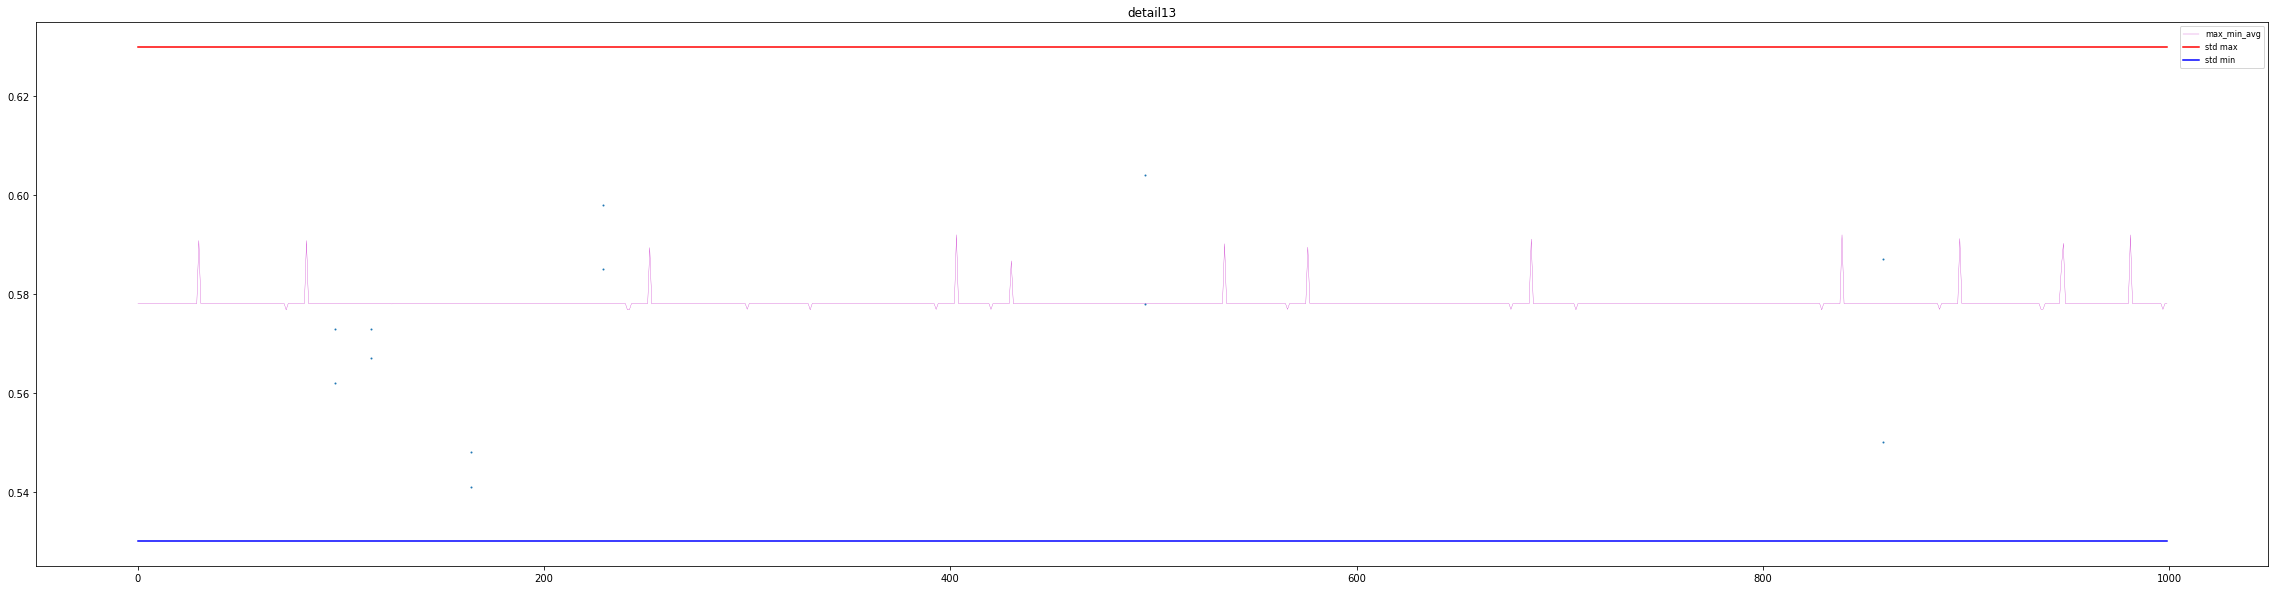

In [ ]:
rate(df)

labels = []
pred_label(by_package, by_machine)

pred_detail_plot("0162B00100",by_package, by_machine)
pred_avg_plot("0162B00100",by_package, by_machine)

#Prediction - By package
Example of prediction by specific package, just change "by_package = True" then the pictures of prediction will show the label.

In [ ]:
by_package = True   #only here is different
by_machine = False

# put test data and label npy file path, ex: 'test_all.npy', 'label_all.npy'
test = np.load(folder_path + 'test_pkg.npy')
label = np.load(folder_path + 'label_pkg.npy',allow_pickle=True)
print(test.shape)
print(label.shape)

test = torch.tensor(test).to(torch.float32)
print(test.shape)

(588, 100, 3)
(588, 1)
torch.Size([588, 100, 3])


In [ ]:
with torch.no_grad():
  pred = model(test, alpha=0.1, beta=0.1)

np.save(folder_path + 'pred_pkg.npy', pred)

In [ ]:
df = pd.DataFrame(test.reshape(-1, sequence_num*3).numpy())
p_df = pd.DataFrame(pred.numpy())

for i in range(26):
  df['pred'+str(i+1)] = p_df[i]

measure_pred = np.array(measure_std(pred, "0162B00100"))

df['label'] = label
df['measure_pred'] = measure_pred

data = np.load(folder_path+'true.npy',allow_pickle=True)
data = pd.DataFrame(data)
data_true = []
data_label = []
data_df = pd.DataFrame()

for pred_num in range(len(pred)):
  for data_num in range(len(data)):
    if data[0][data_num] == label[pred_num]: 
      data_label.append(pred_num)
      true = []
      for i in range(13):
        true.append(data.iloc[data_num][i+1])
      data_true.append(true)

data_df["num"] = pd.DataFrame(data_label)
data_true = pd.DataFrame(data_true)
for i in range(13):
  data_df['true'+str(i+1)] = data_true[i]

df.to_csv(folder_path +"/test_pkg.csv", header=True, index=True) 
print(df.head(10))
print(data_df.head(10))

       0    1         2      3    4         5      6    7         8      9  \
0  314.0  1.0  1.633333  299.0  2.0  1.183333  299.0  2.0  4.983333  299.0   
1  299.0  2.0  4.683333  299.0  2.0  4.983333  299.0  2.0  4.950000  299.0   
2  299.0  2.0  4.983333  299.0  2.0  5.000000  299.0  2.0  4.966667  299.0   
3  299.0  2.0  4.966667  299.0  2.0  4.983333  299.0  2.0  1.383333  299.0   
4  299.0  2.0  0.533333  299.0  2.0  4.983333  299.0  2.0  4.983333  299.0   
5  299.0  2.0  0.350000  314.0  1.0  2.716667  299.0  2.0  2.450000  299.0   
6  299.0  2.0  4.966667  299.0  2.0  4.983333  299.0  2.0  5.016667  299.0   
7  299.0  2.0  4.983333  299.0  2.0  5.000000  314.0  1.0  2.433333  299.0   
8  299.0  2.0  4.816667  299.0  2.0  4.983333  299.0  2.0  4.983333  299.0   
9  299.0  2.0  4.983333  299.0  2.0  4.966667  299.0  2.0  5.000000  314.0   

   ...    pred19    pred20    pred21    pred22    pred23    pred24    pred25  \
0  ...  3.331318  2.374215  0.400302  0.558845  0.573610  0.5

581/588 良率: 0.9880952380952381
detail1


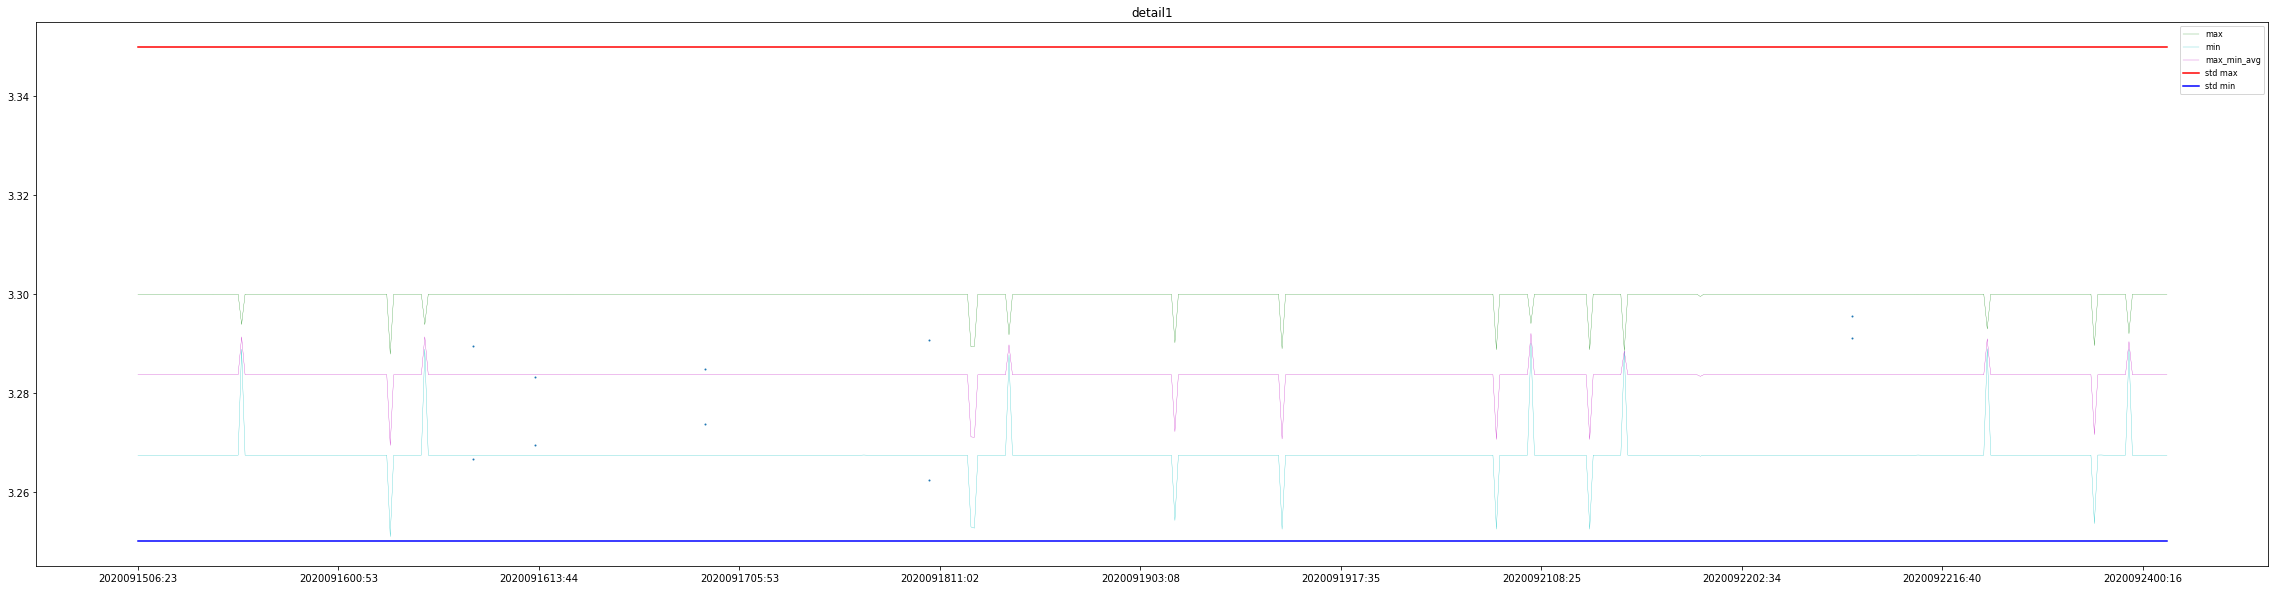

detail2


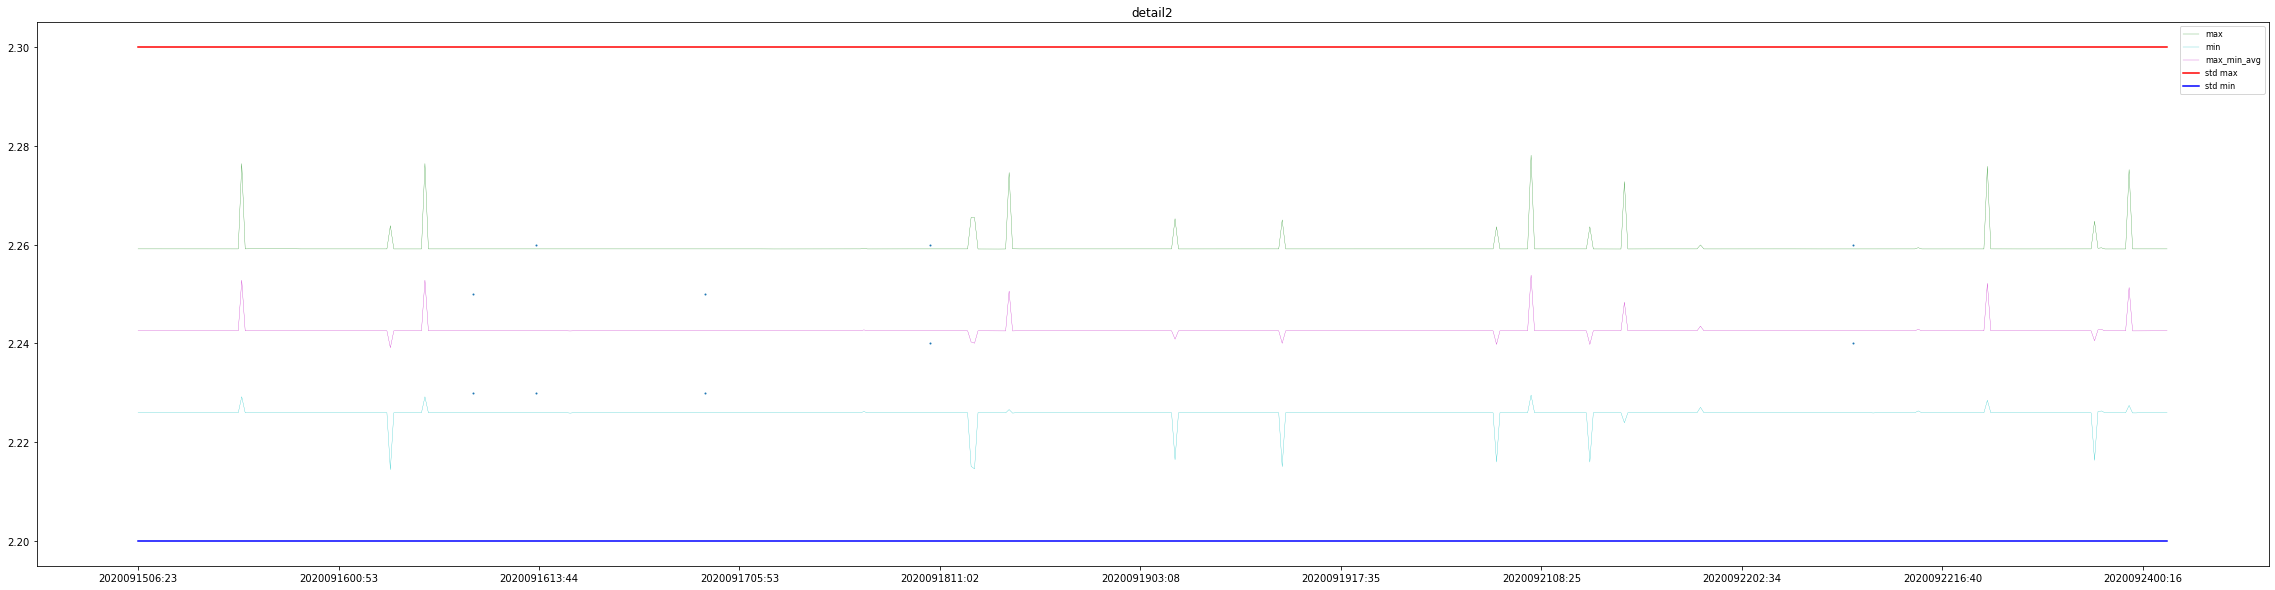

detail3


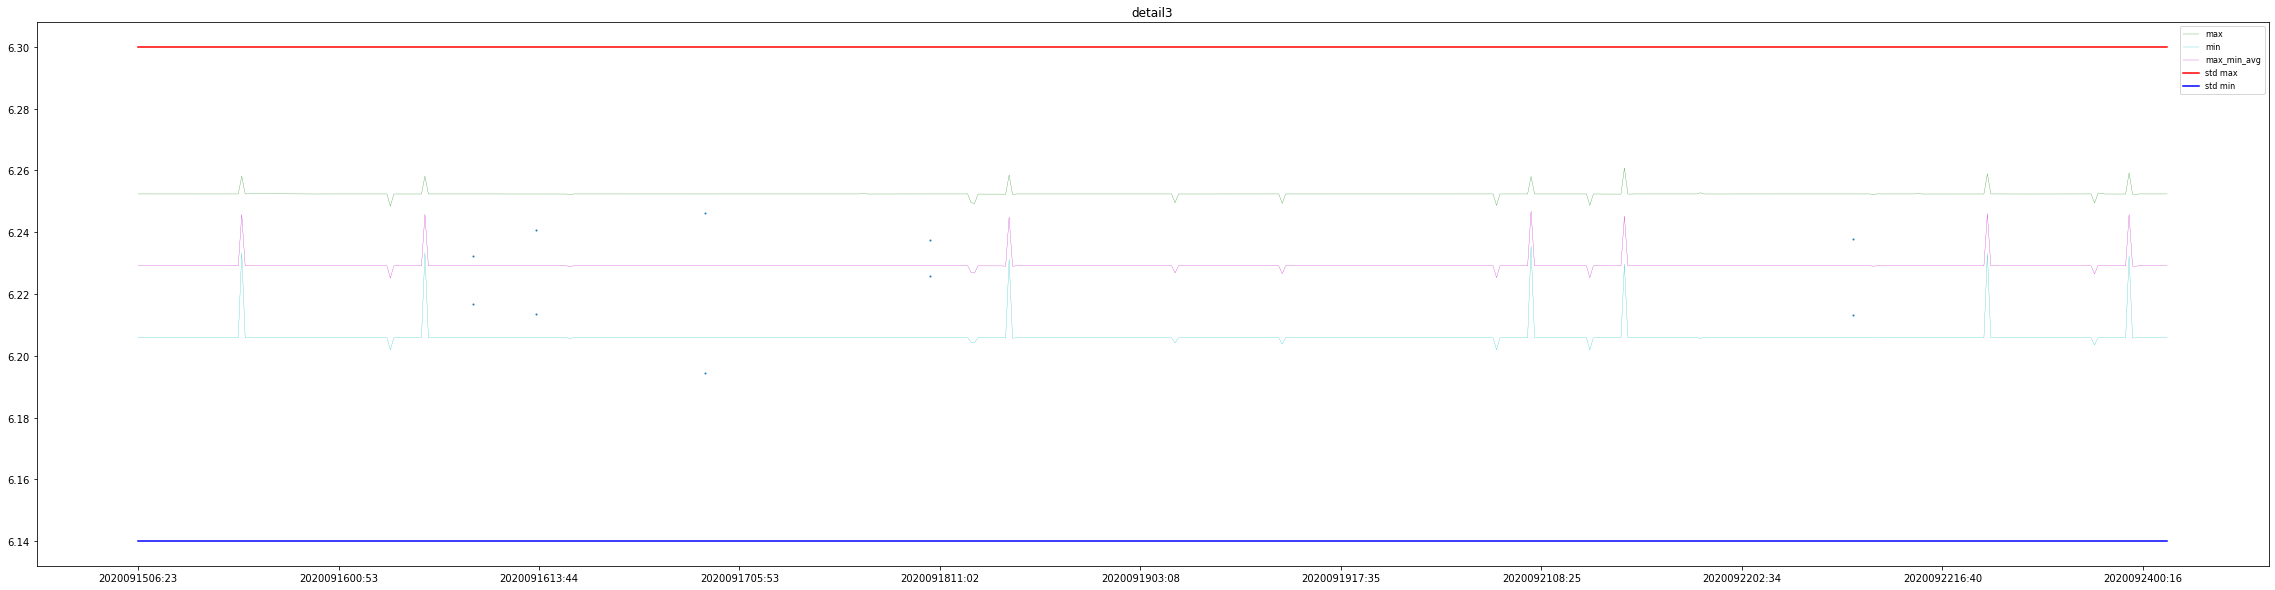

detail4


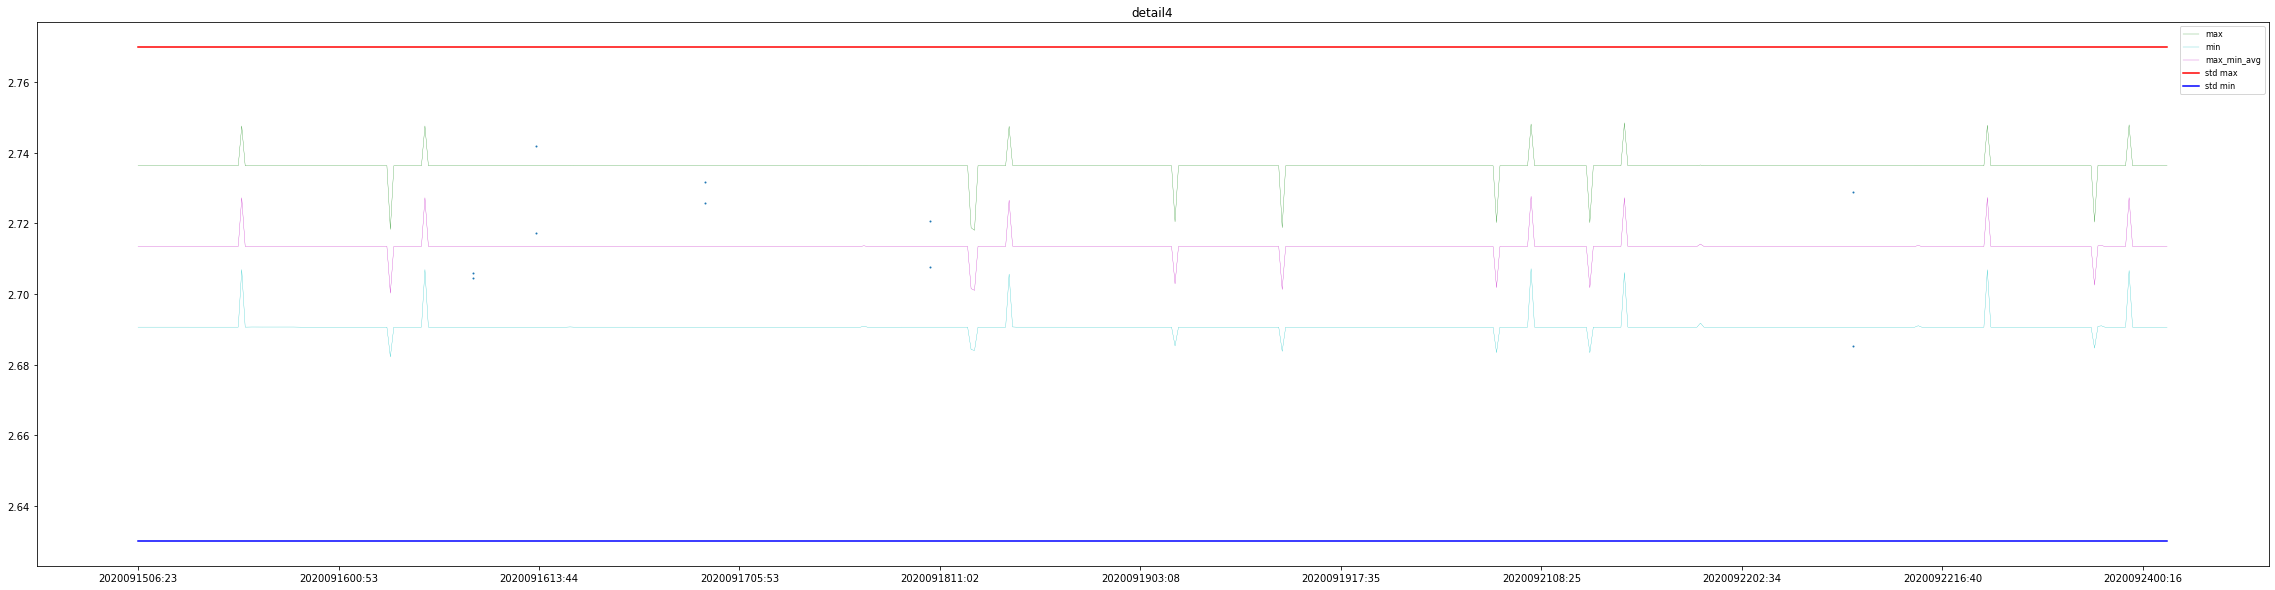

detail5


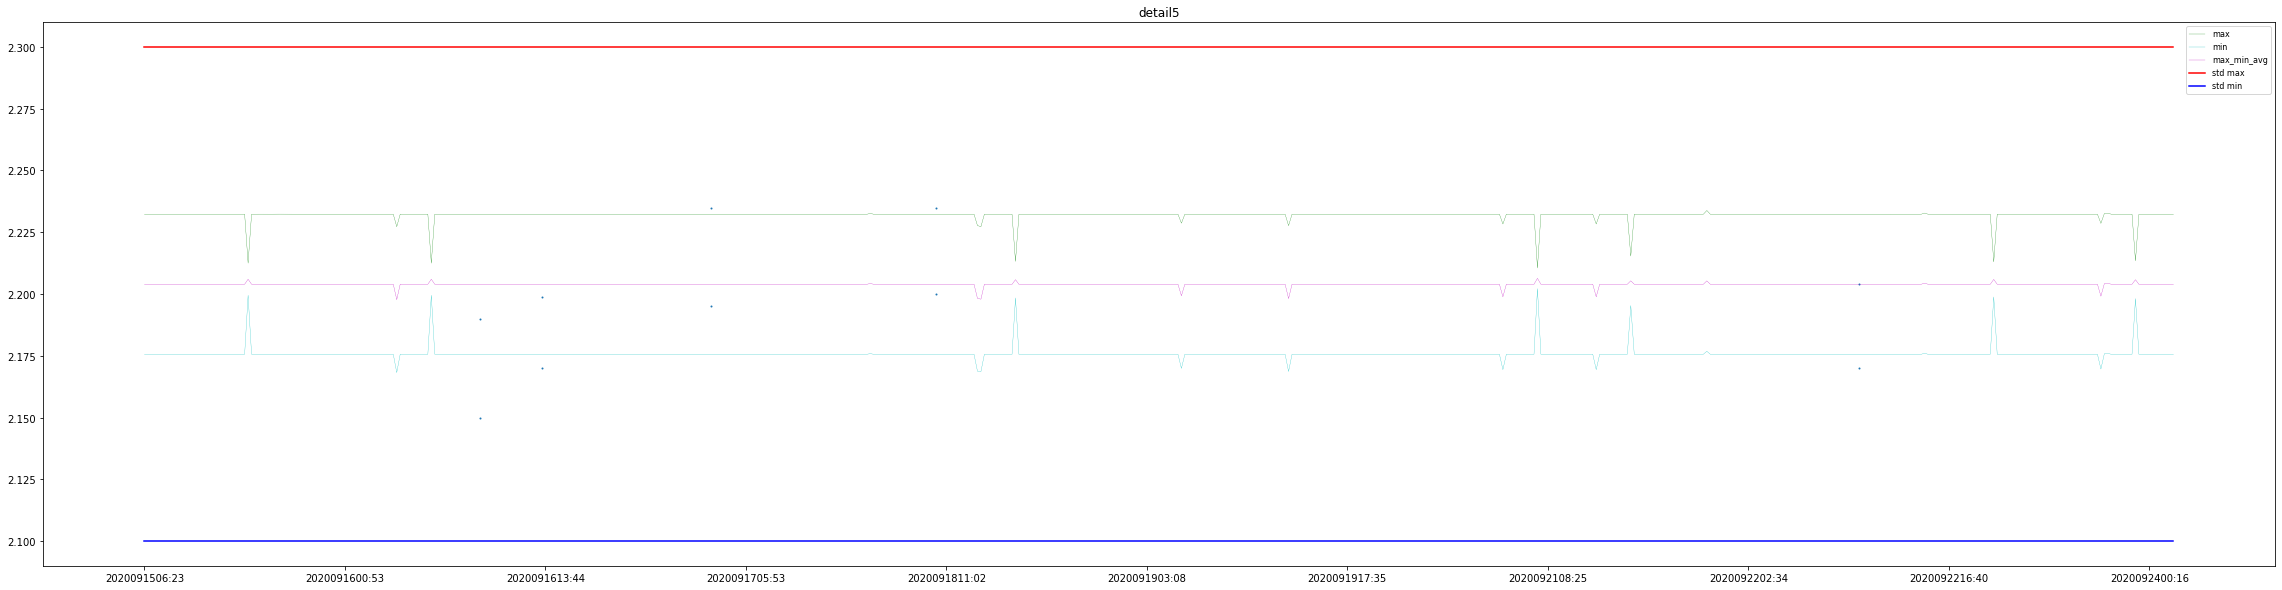

detail6


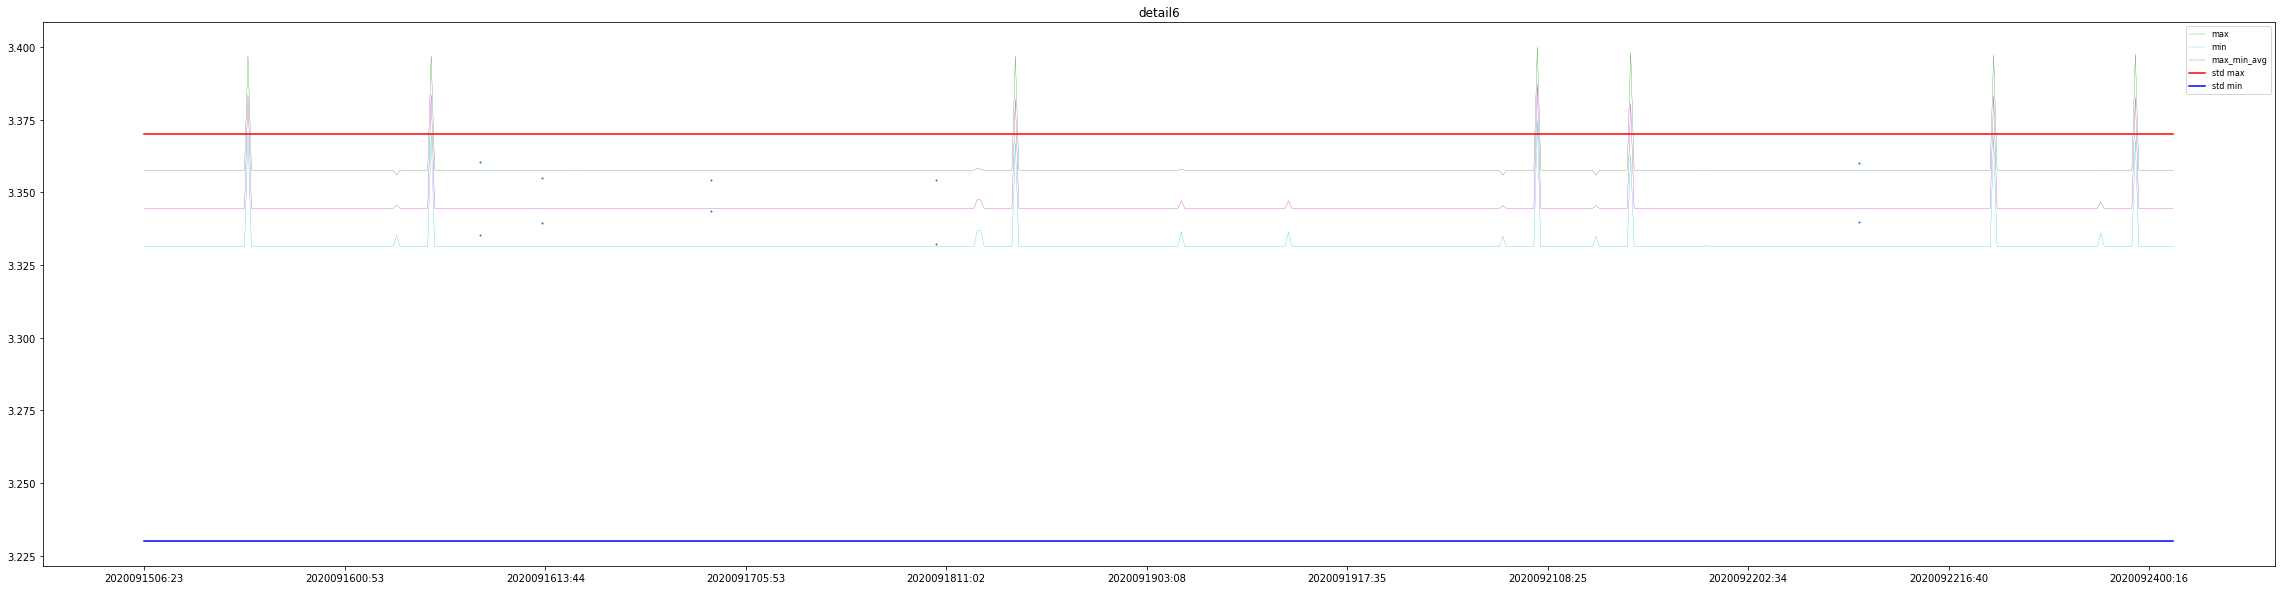

detail7


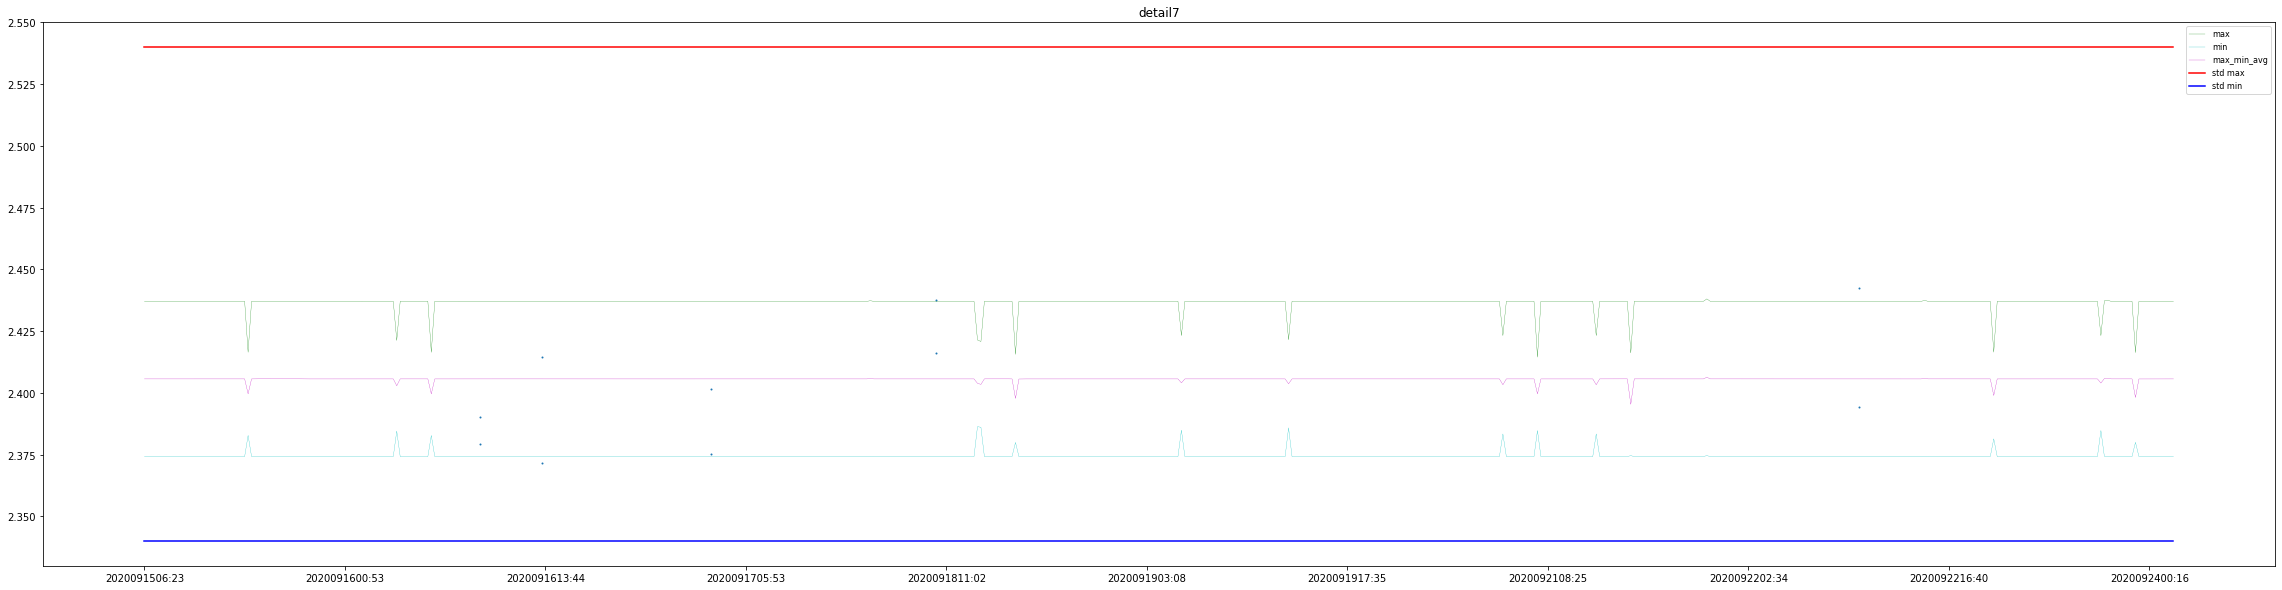

detail8


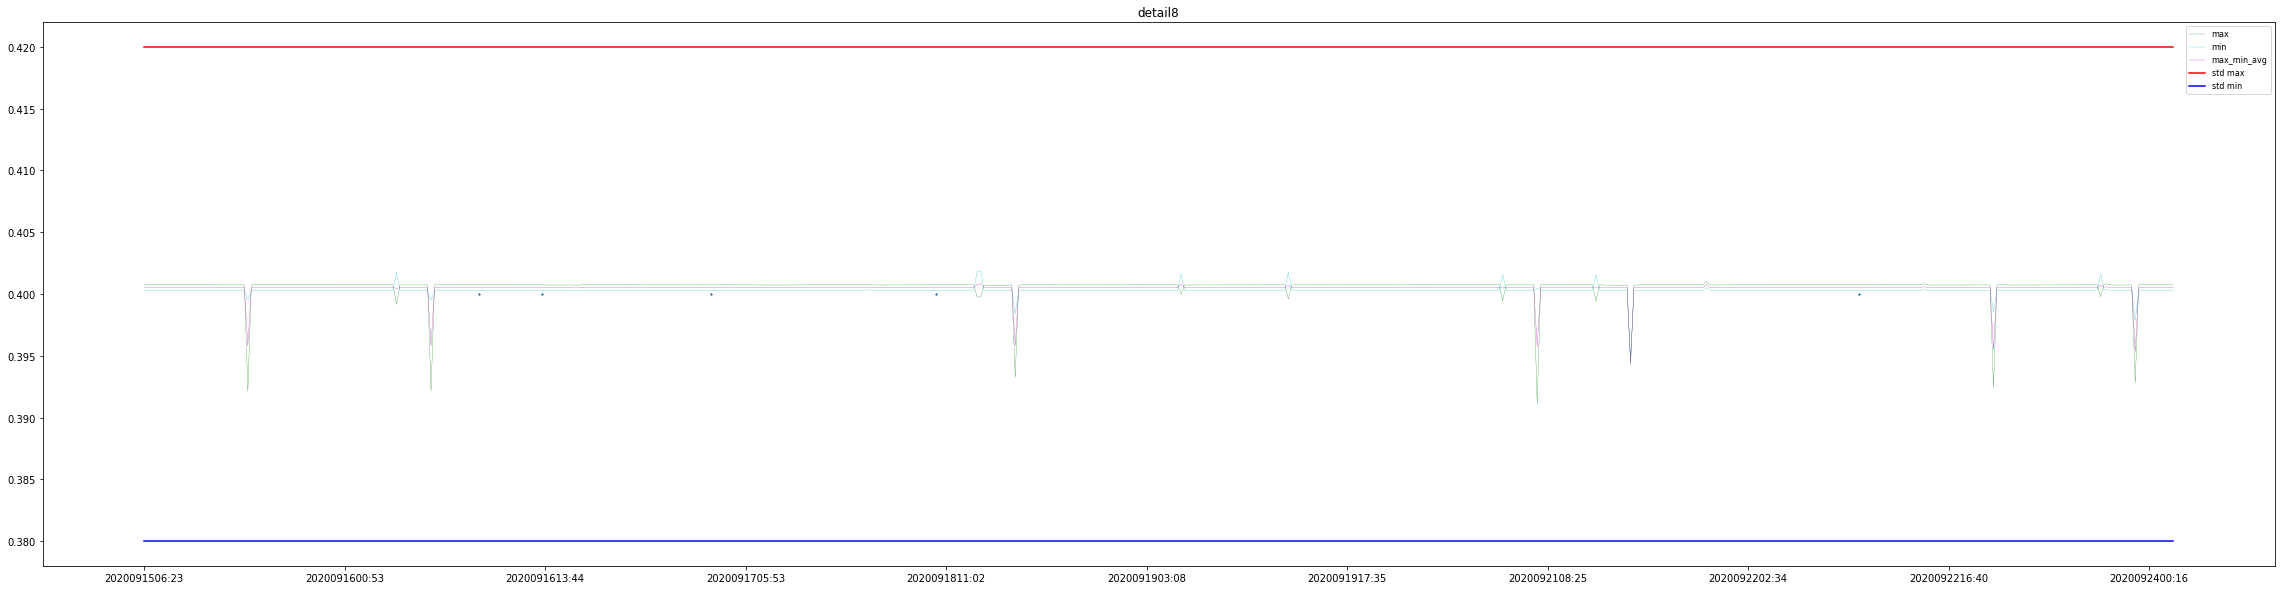

detail9


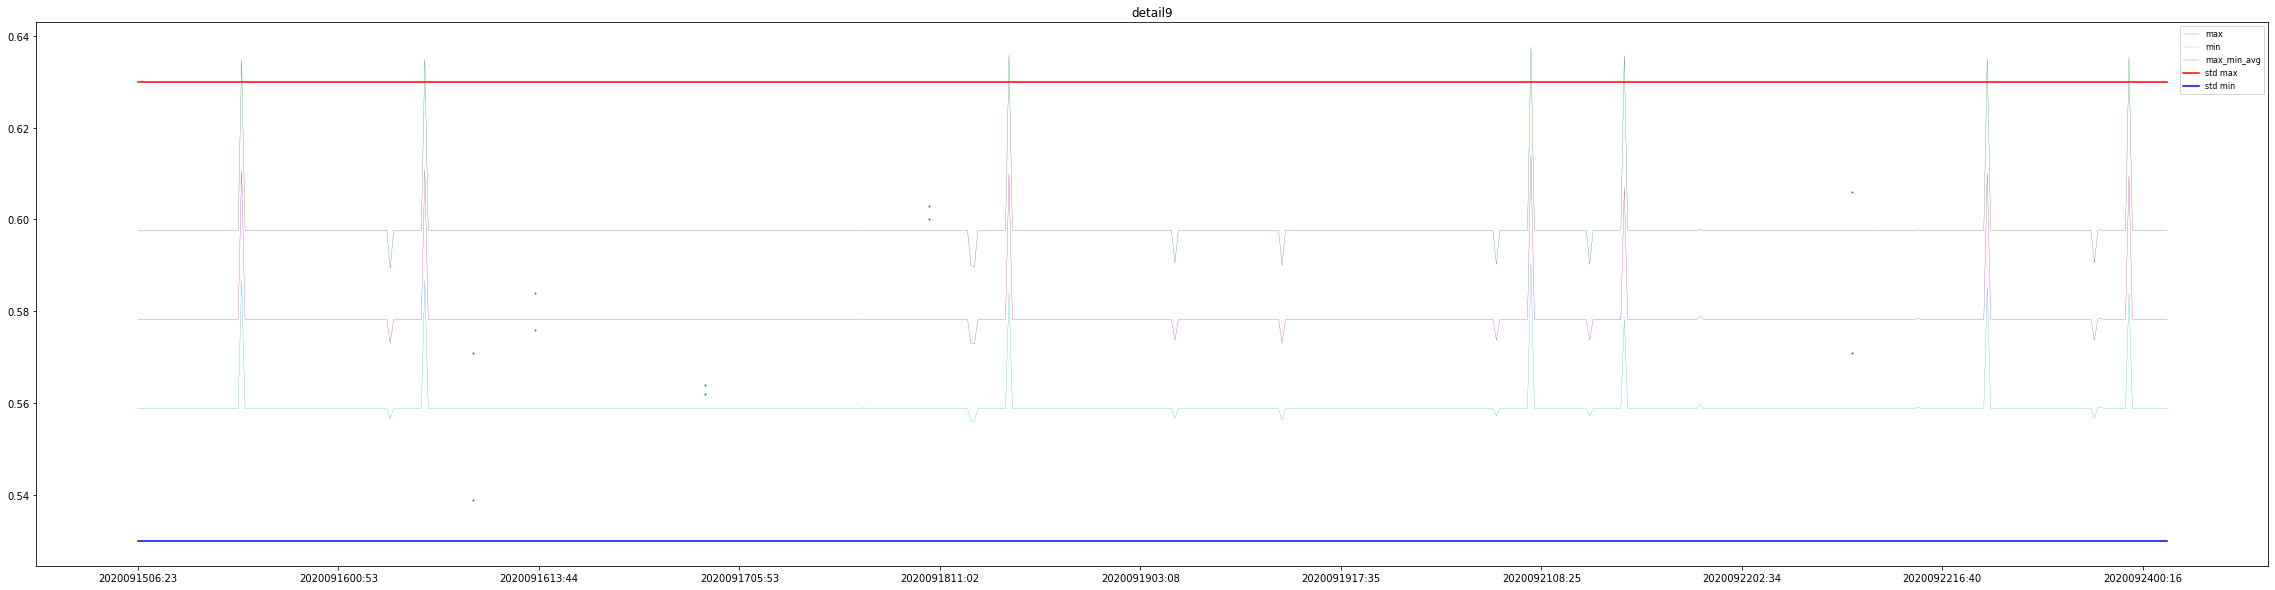

detail10


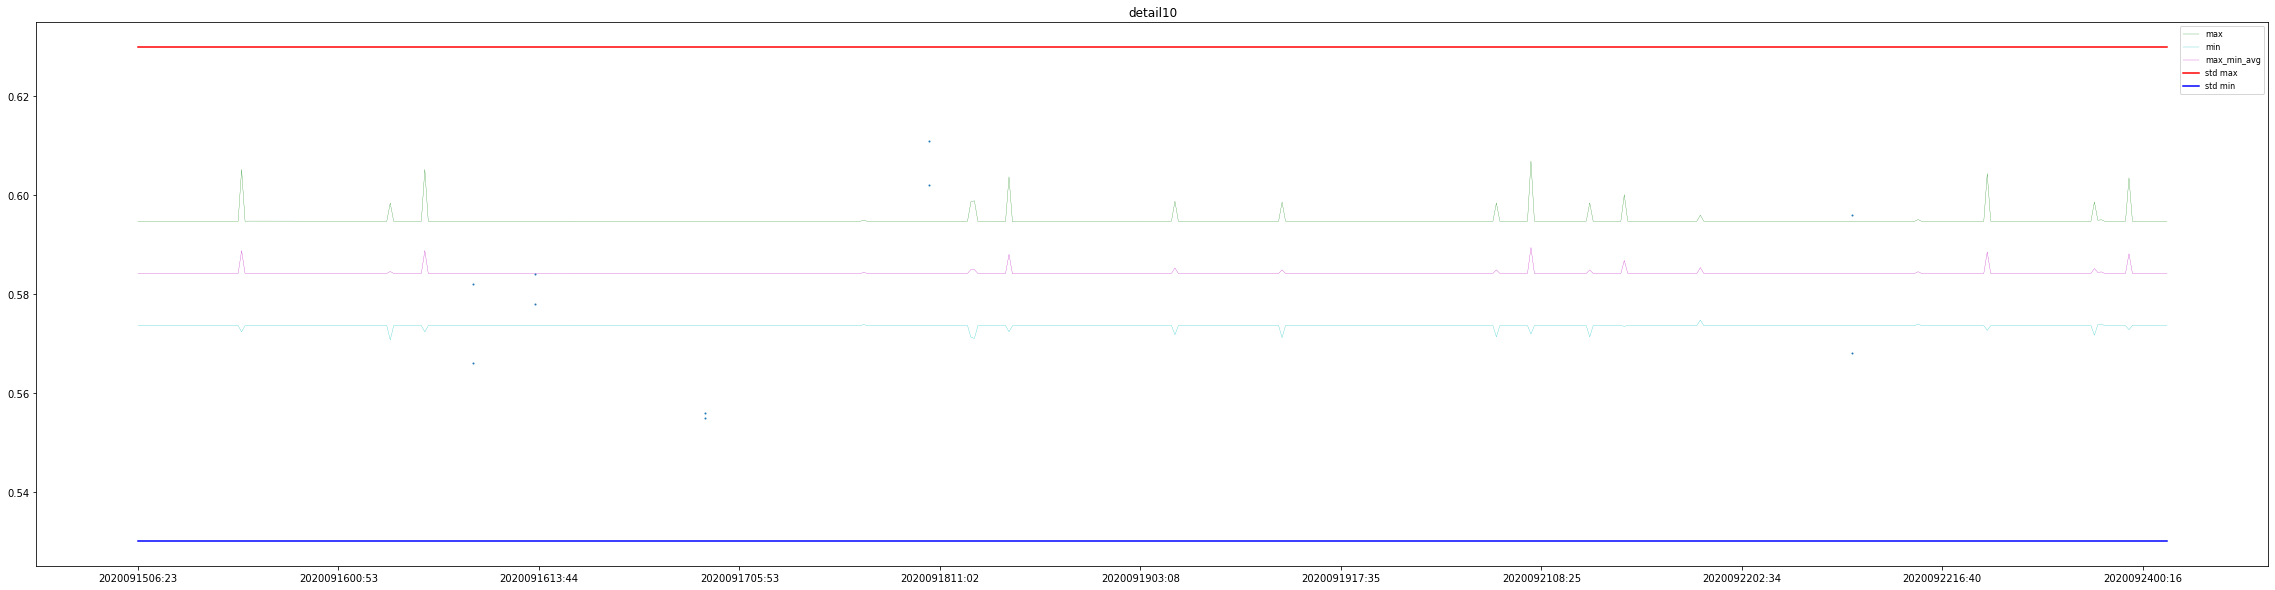

detail11


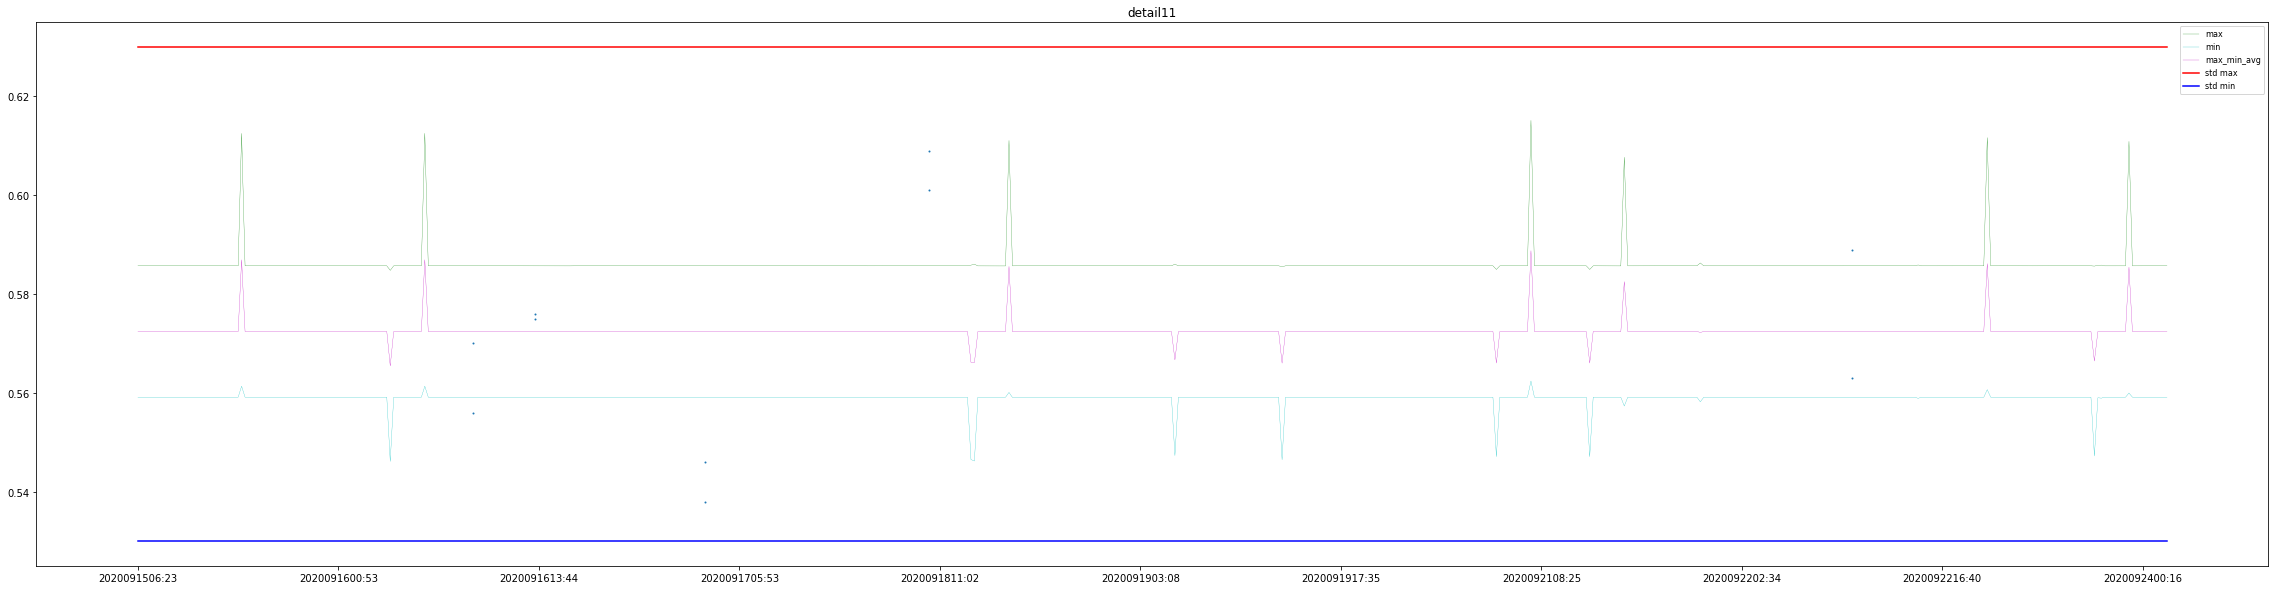

detail12


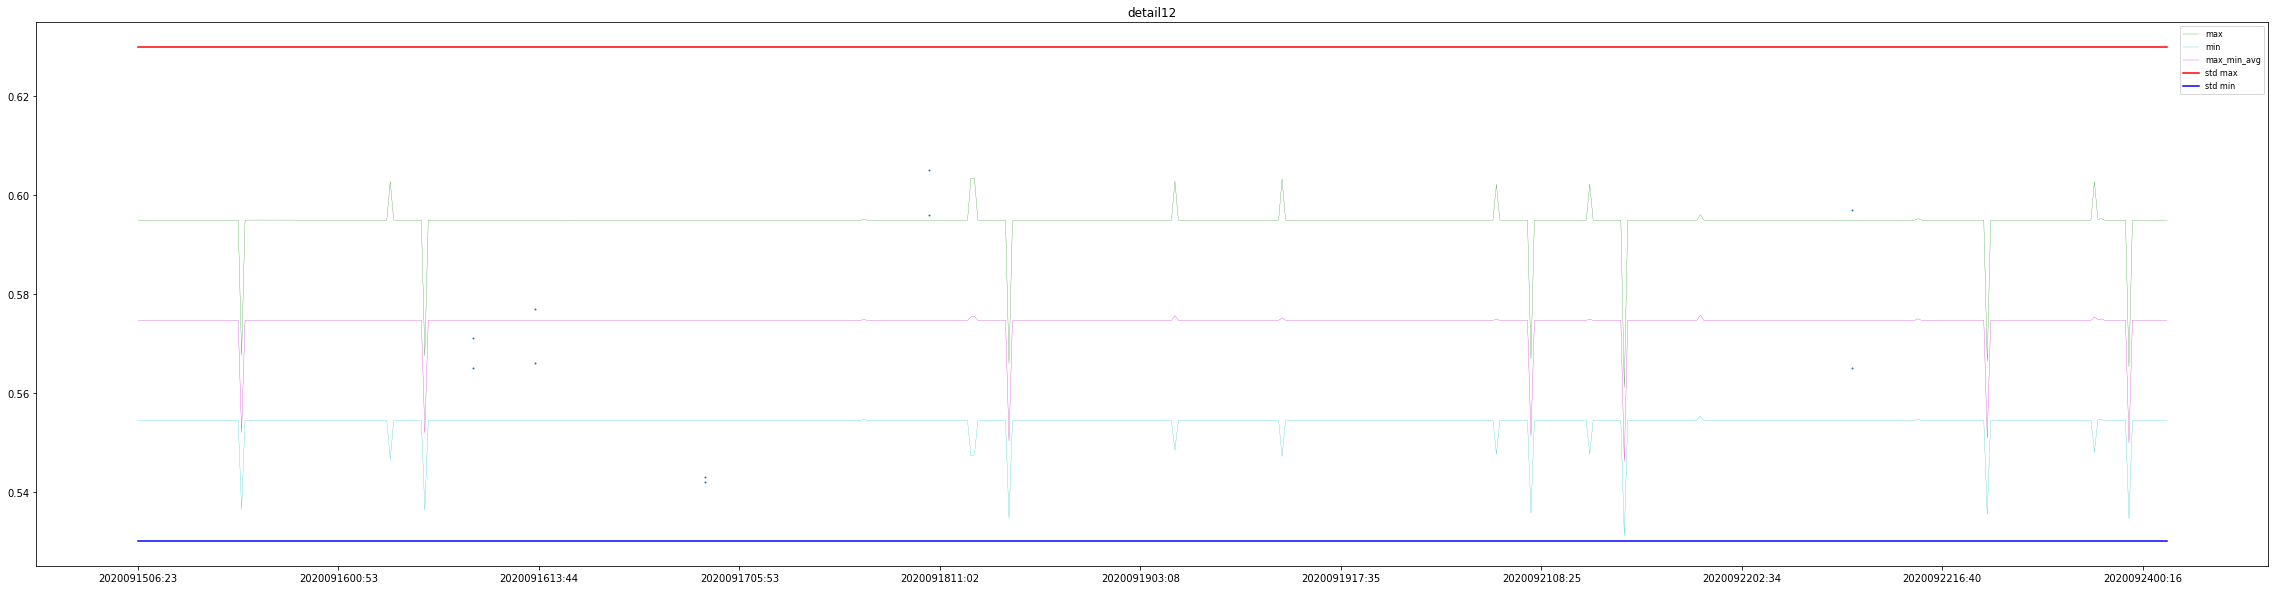

detail13


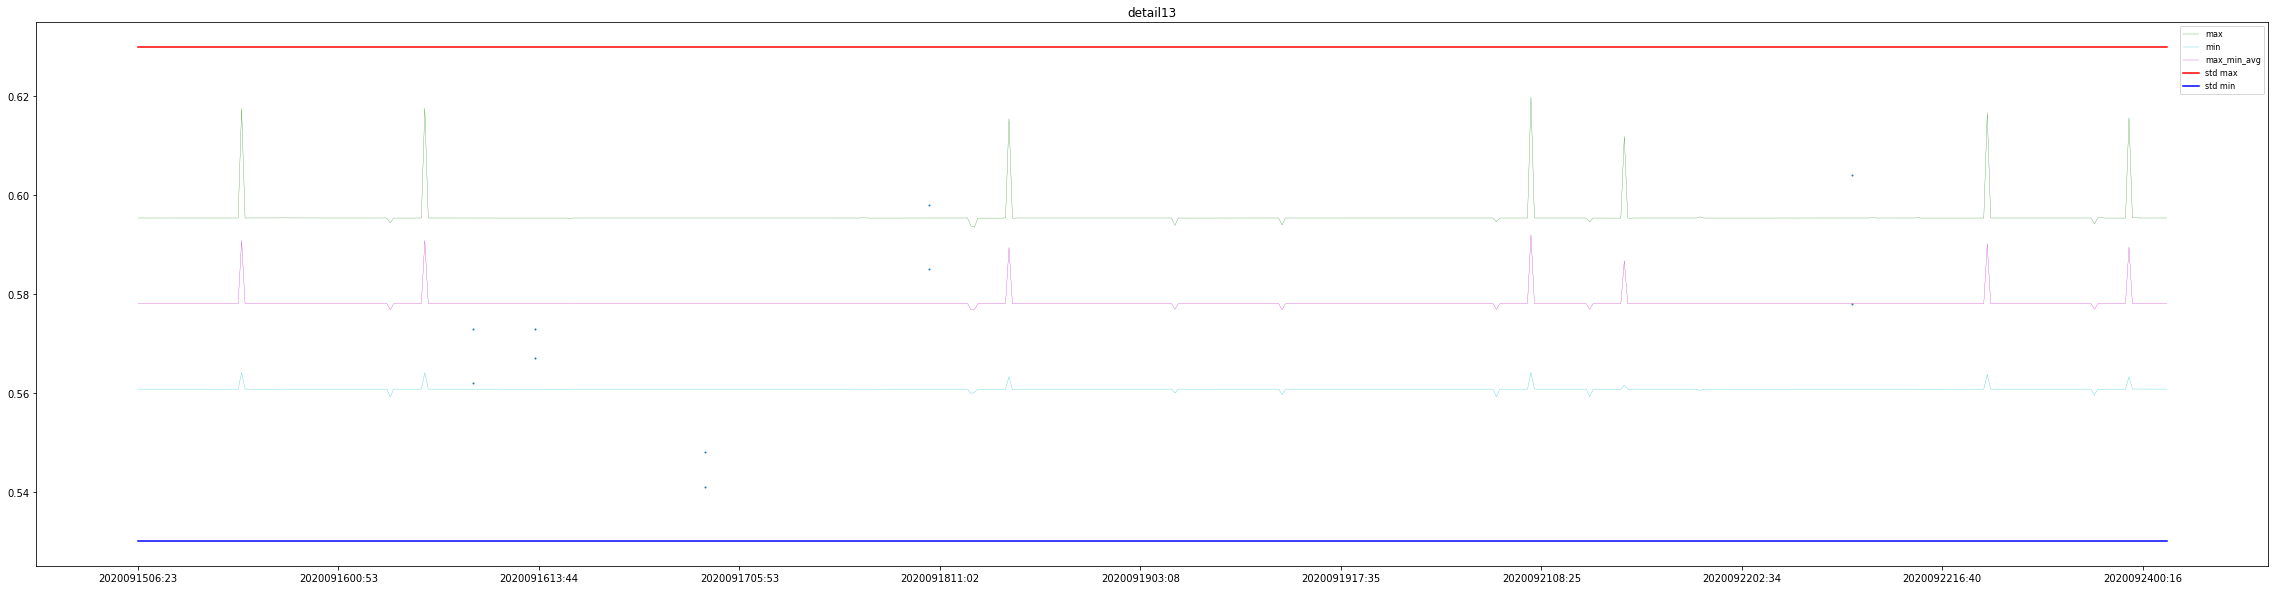

detail1


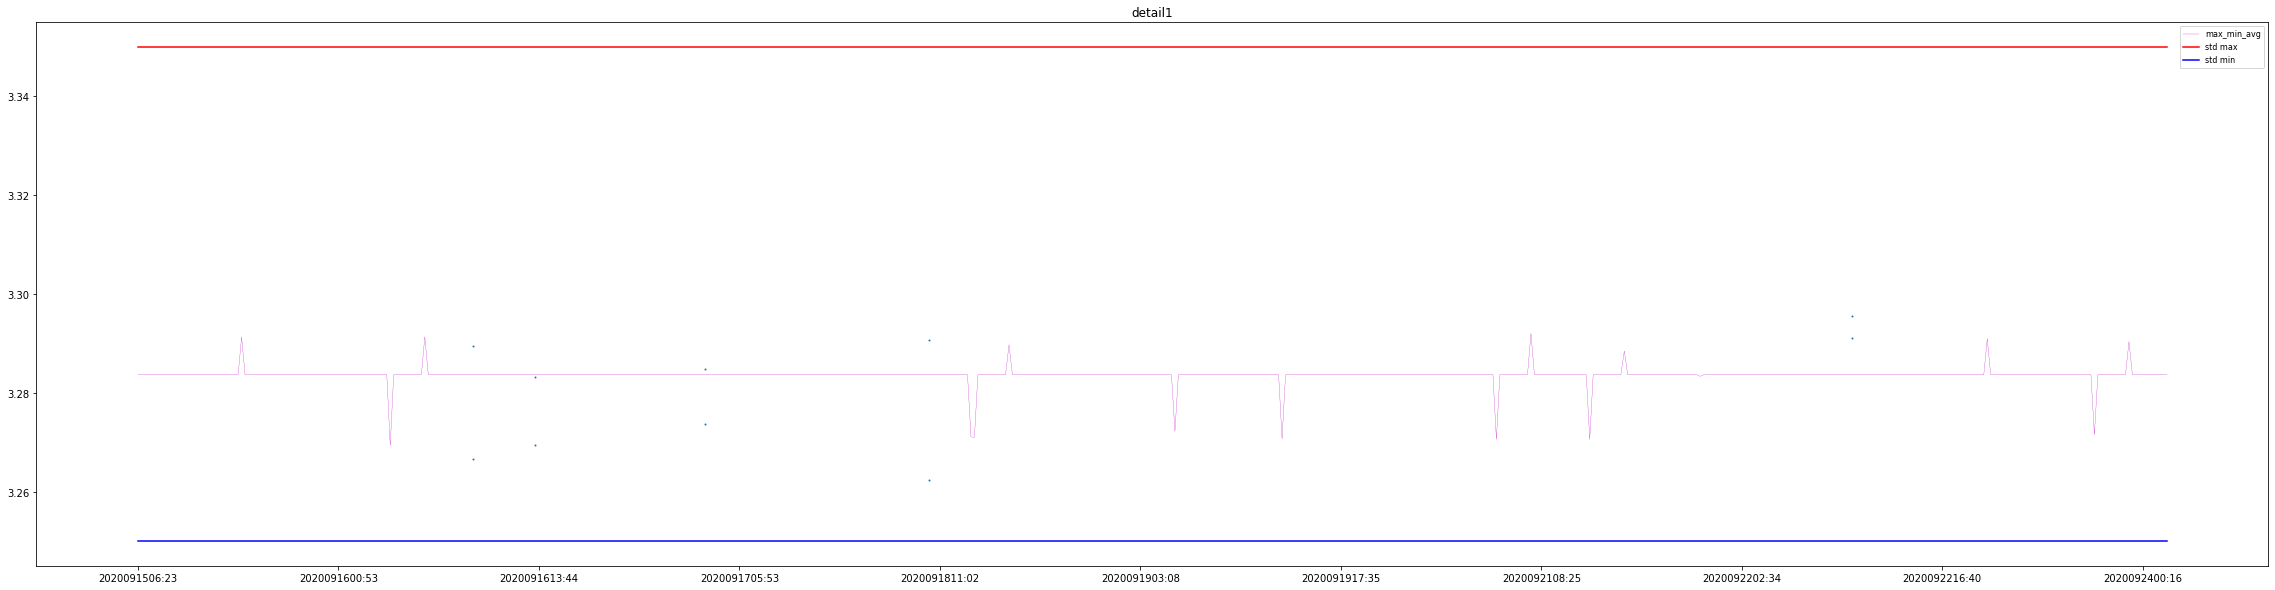

detail2


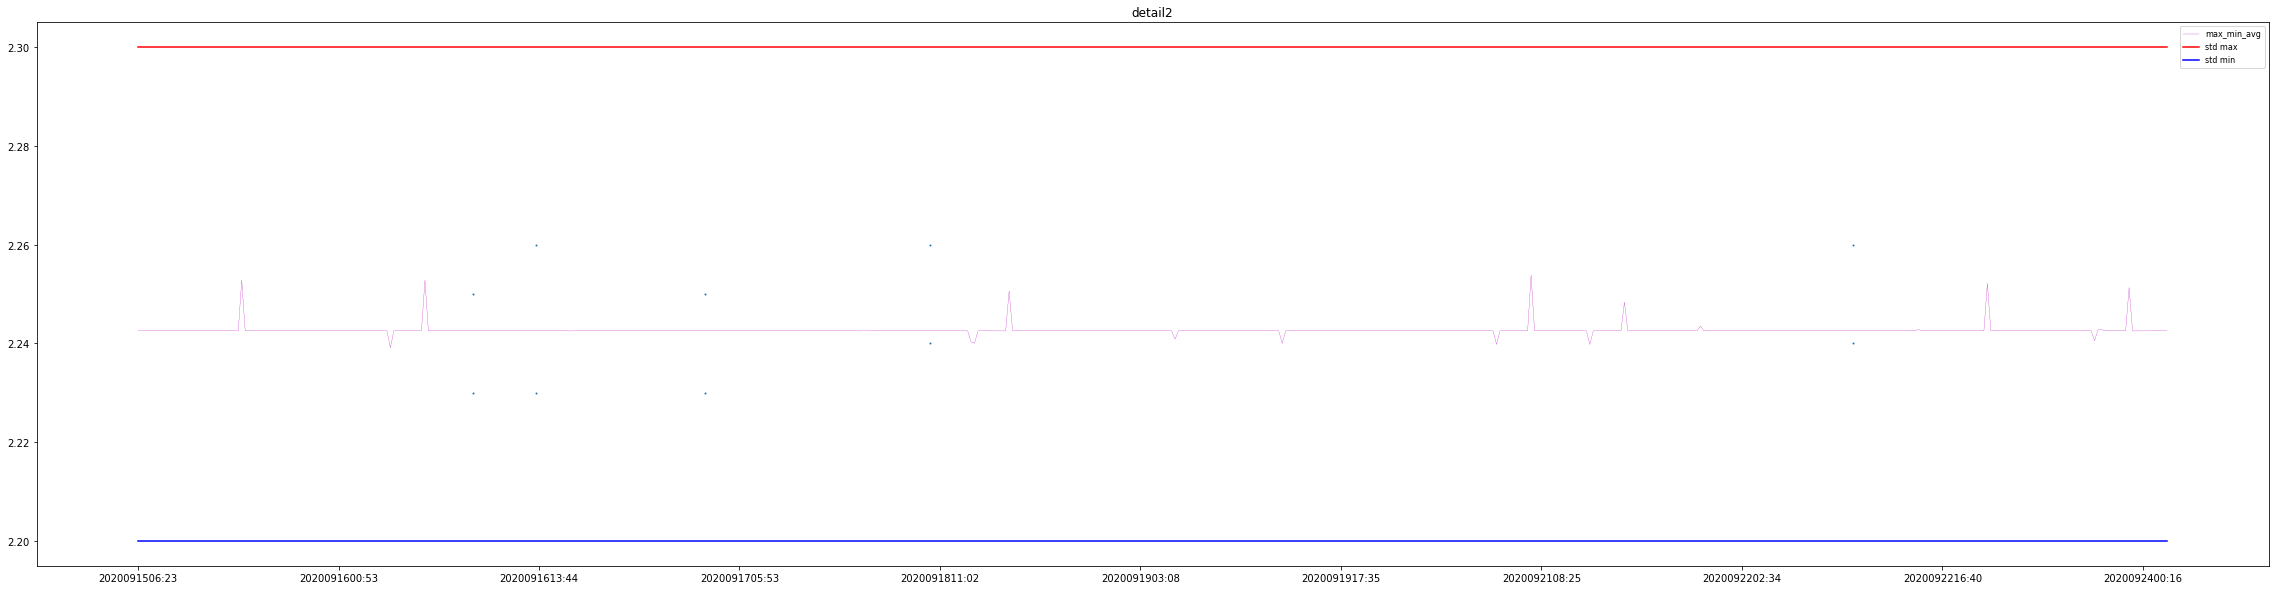

detail3


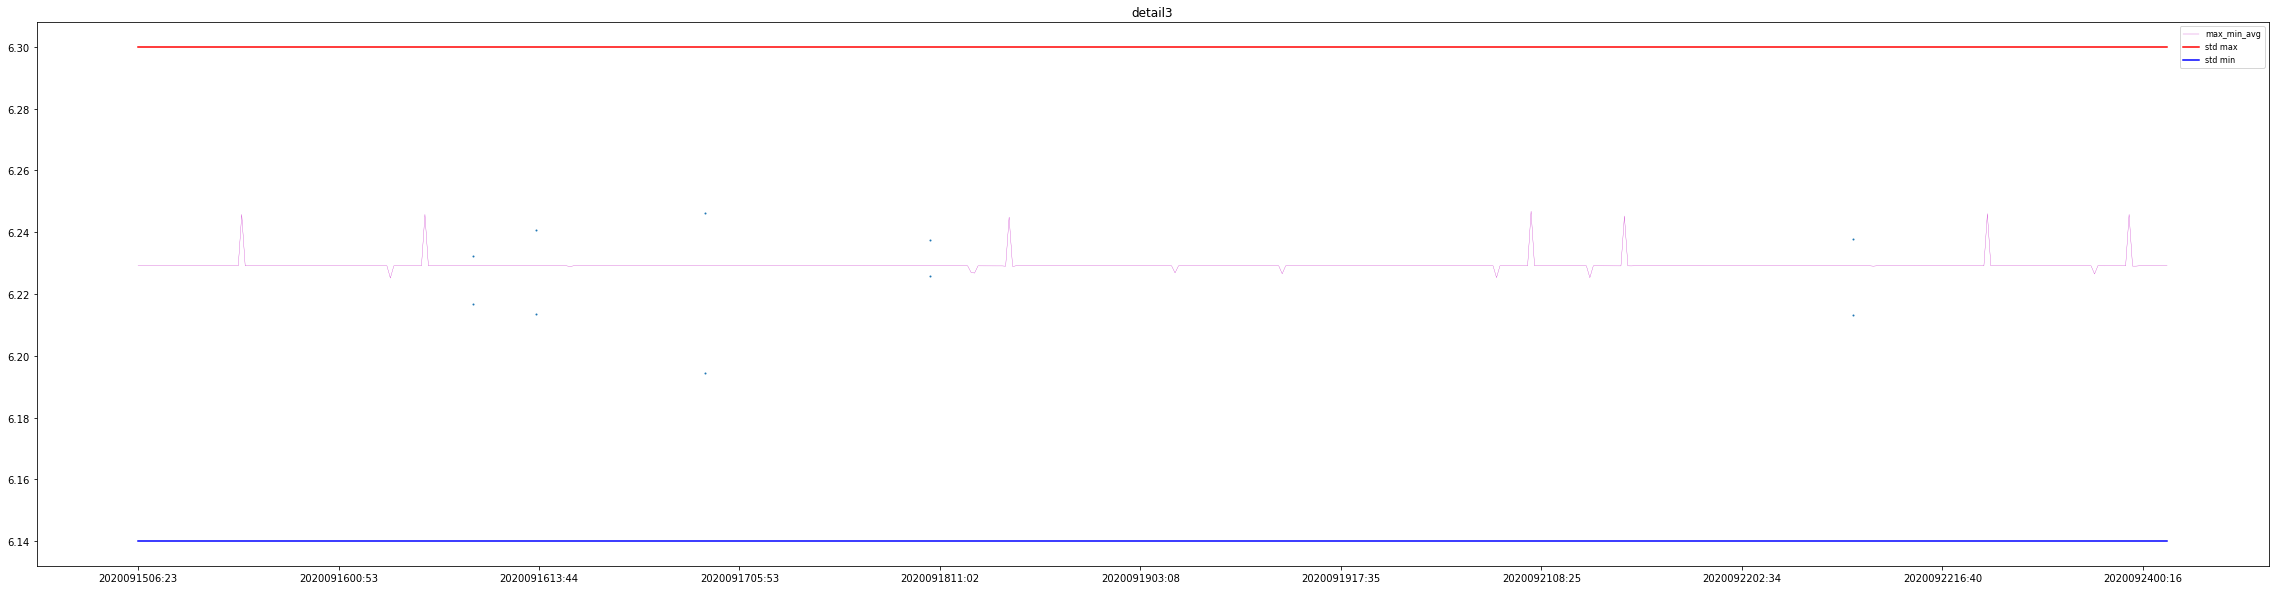

detail4


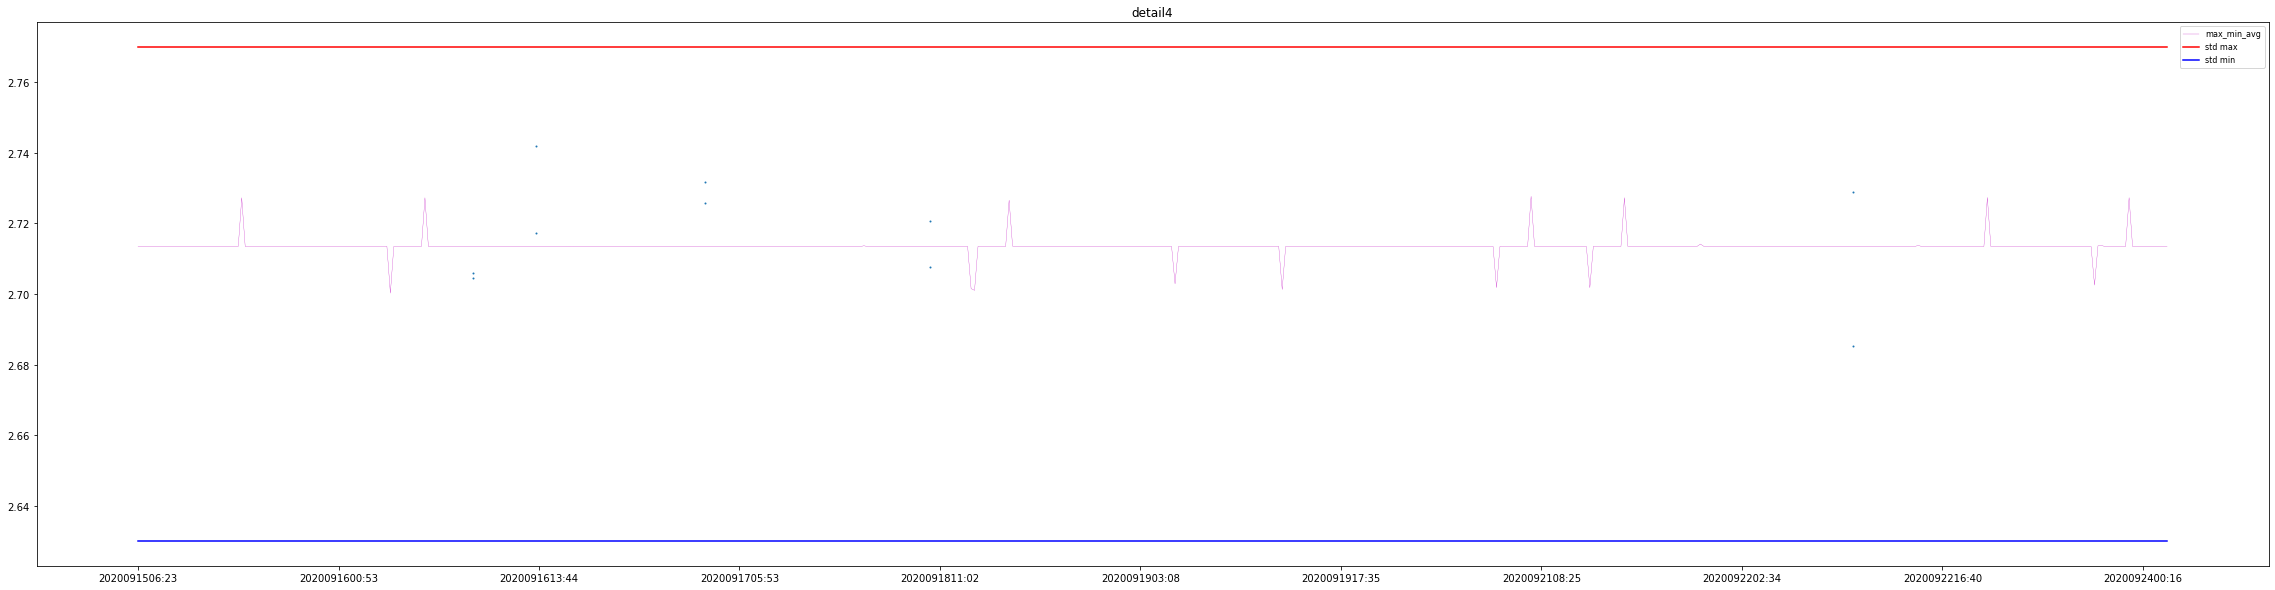

detail5


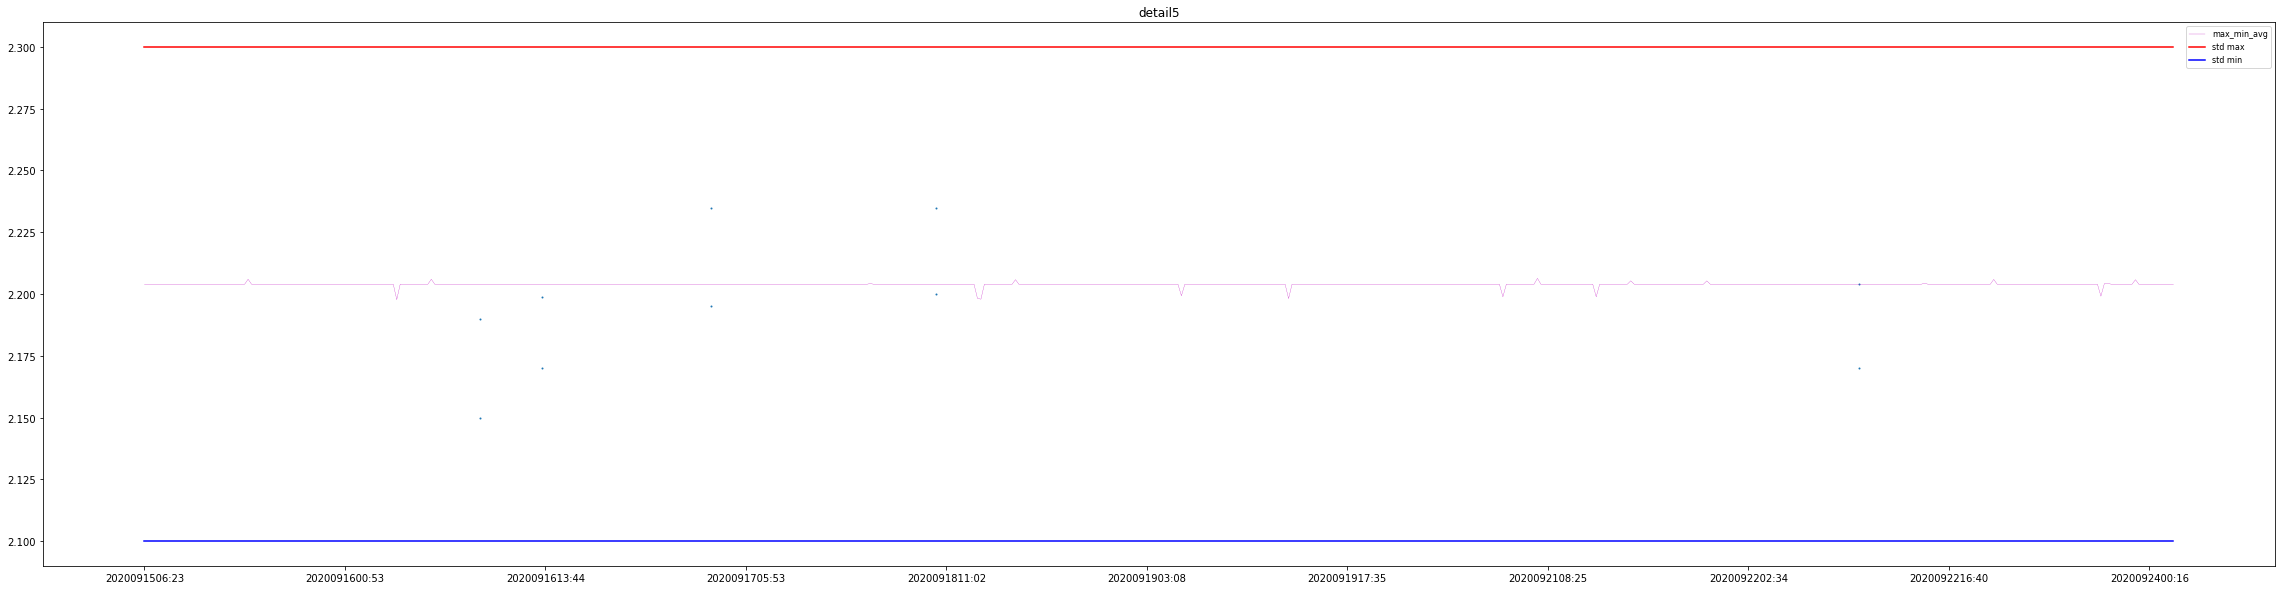

detail6


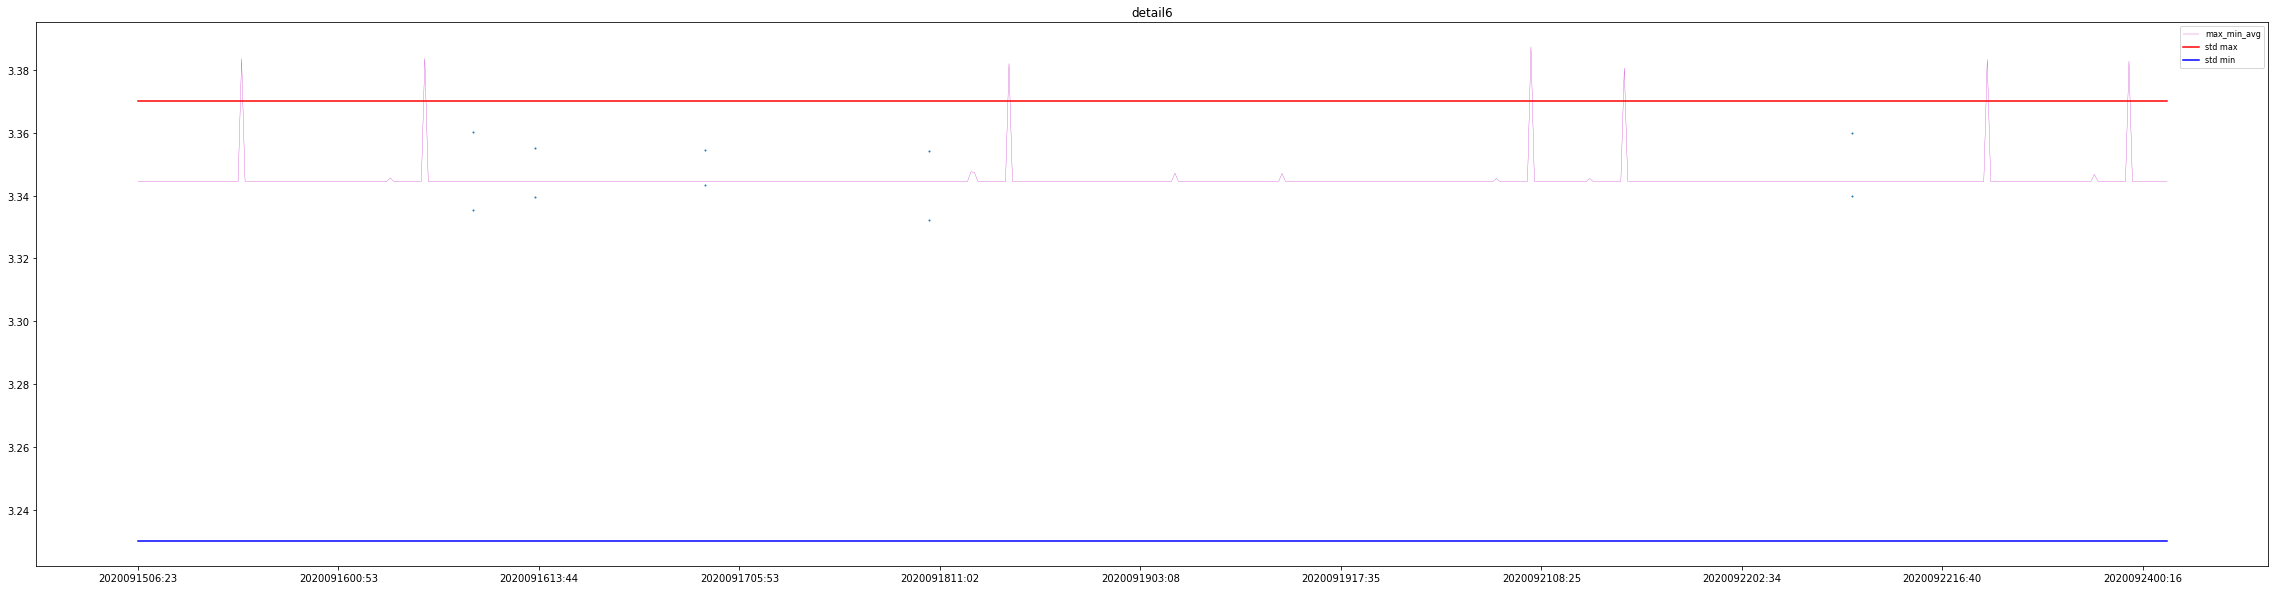

detail7


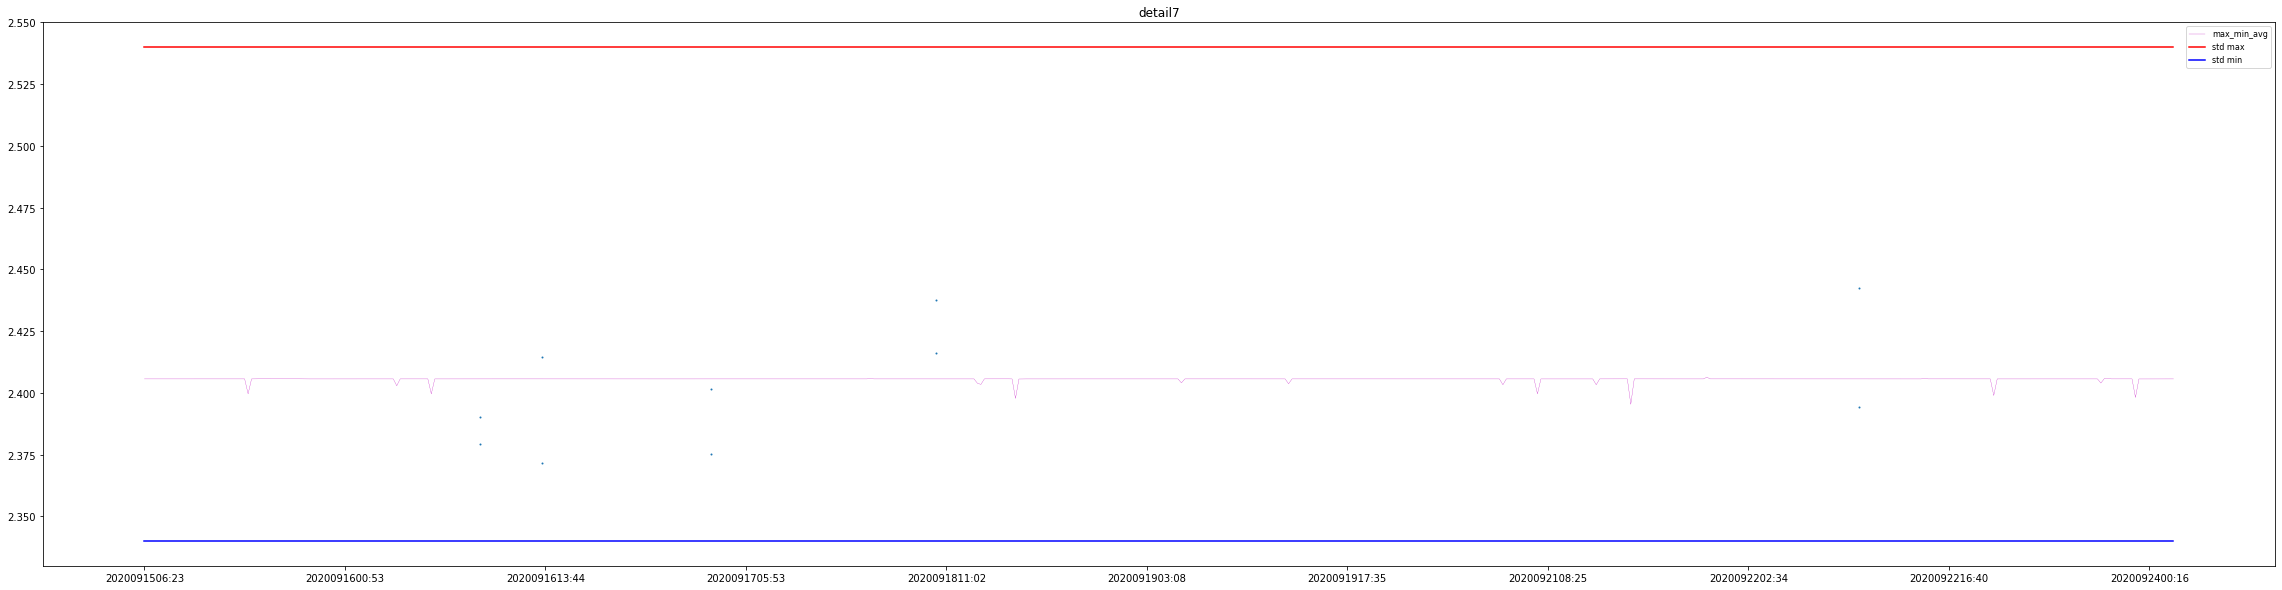

detail8


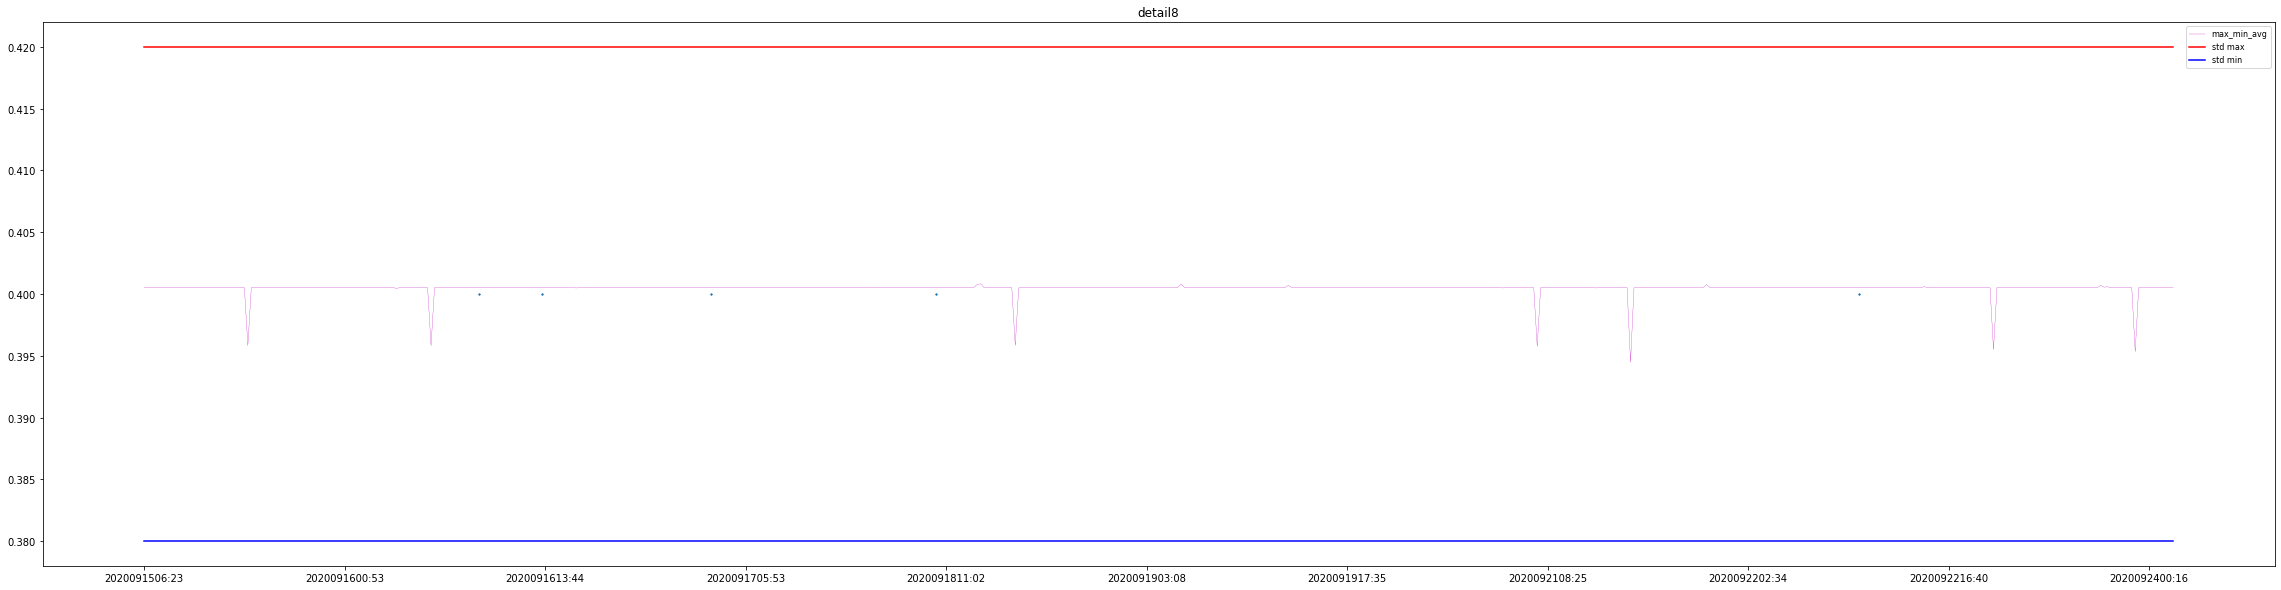

detail9


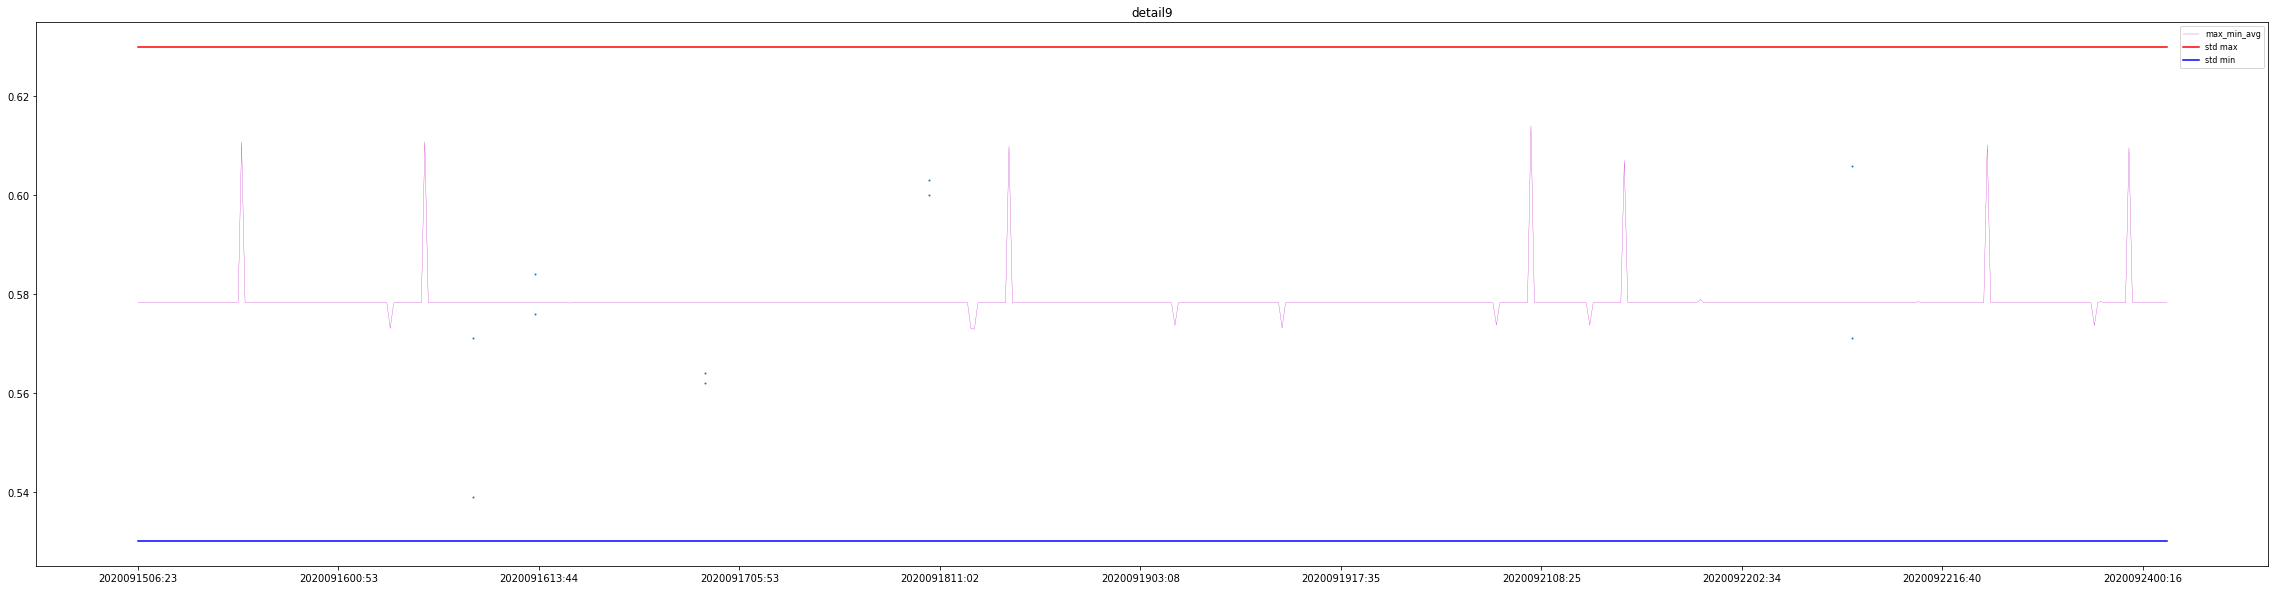

detail10


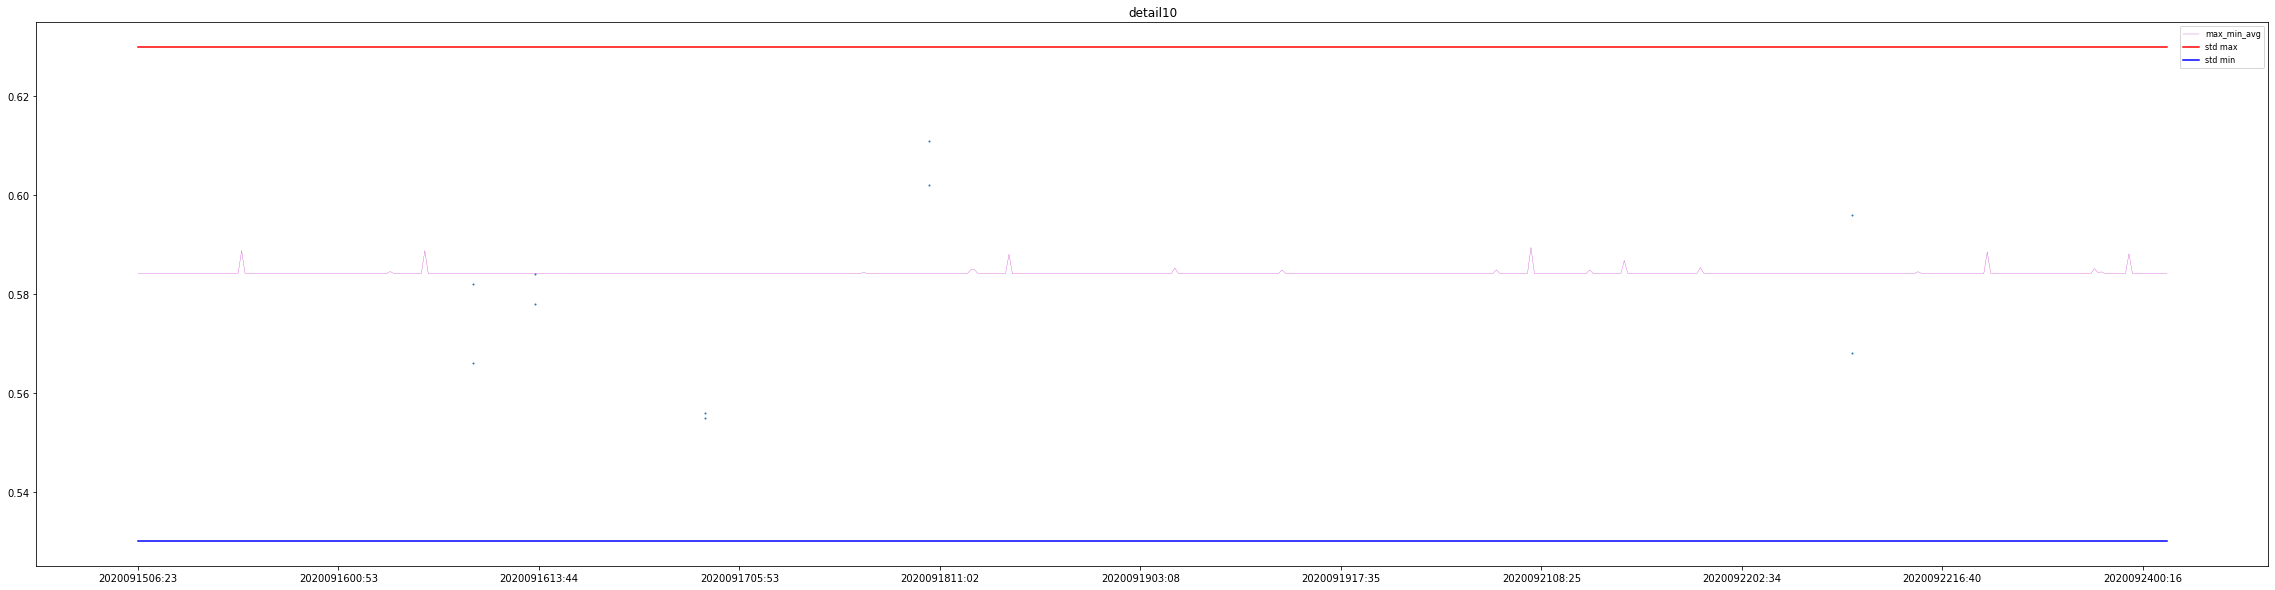

detail11


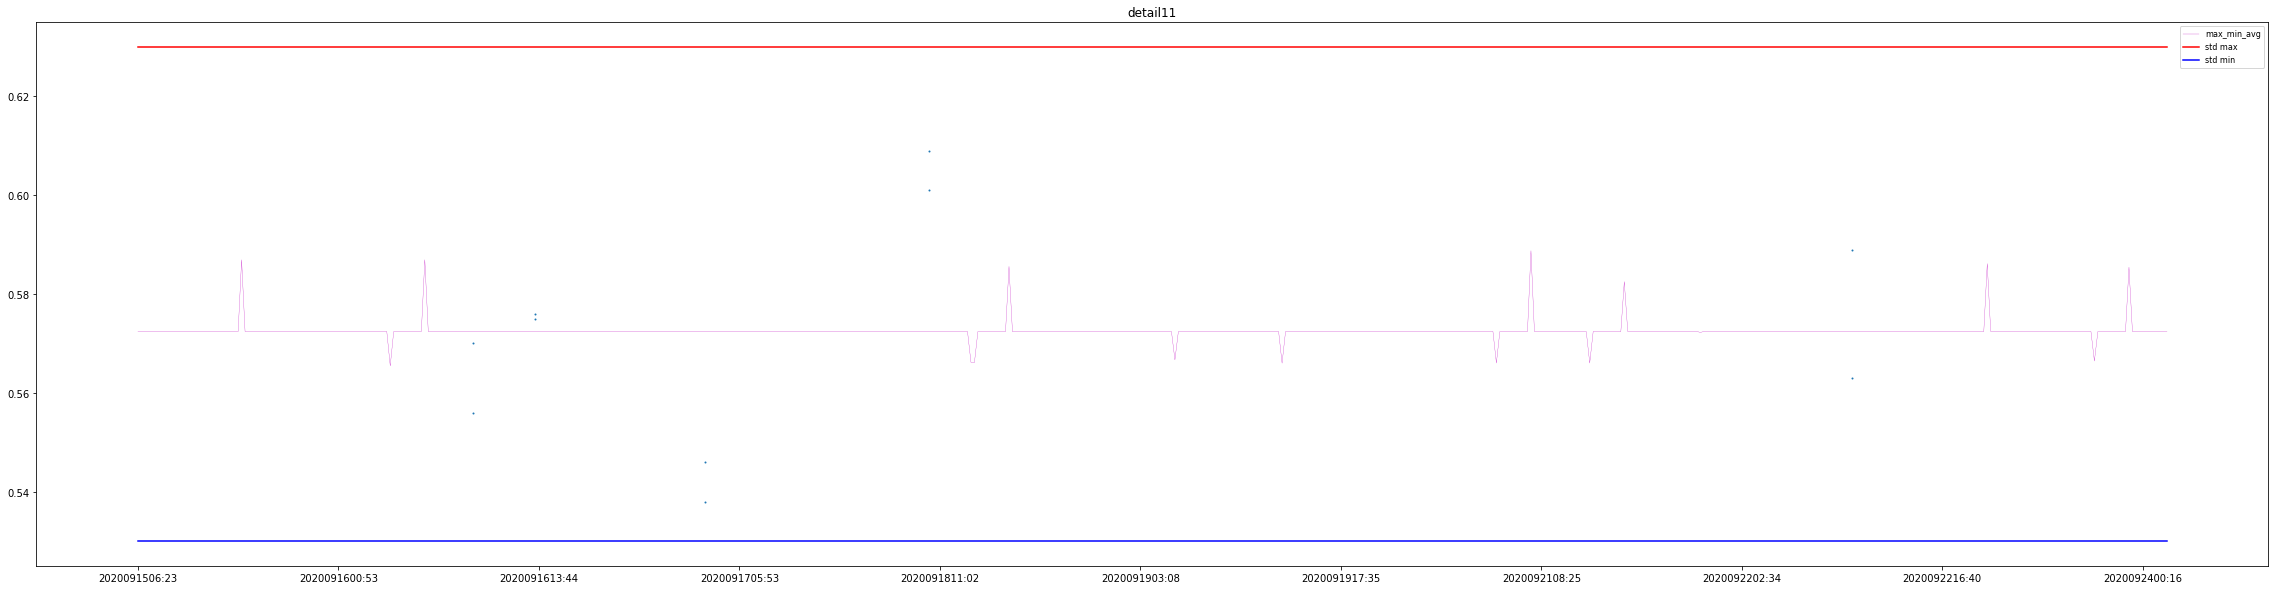

detail12


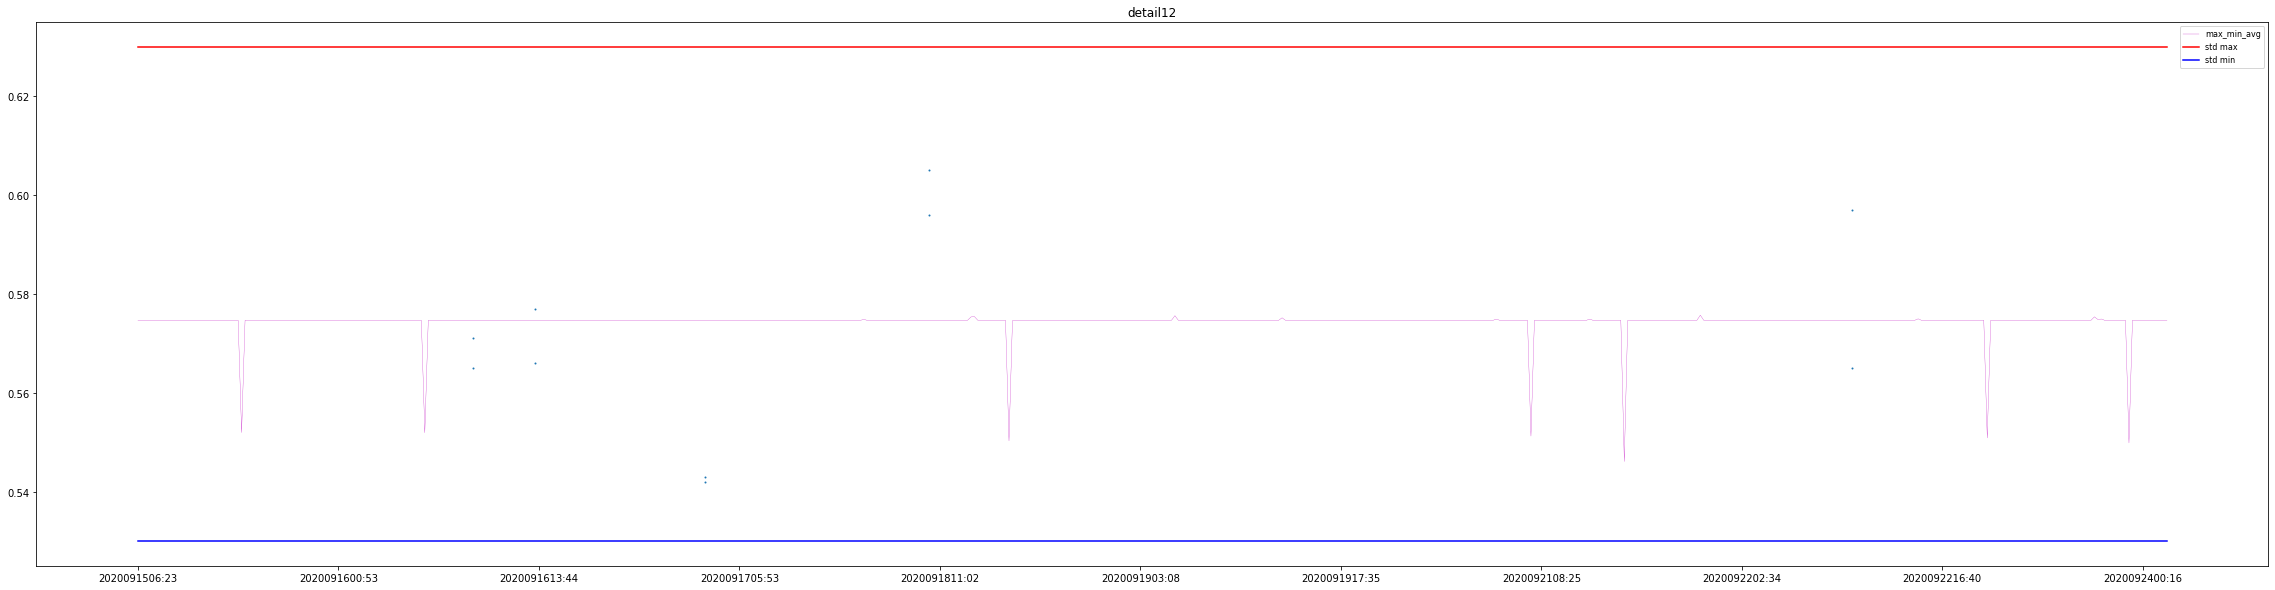

detail13


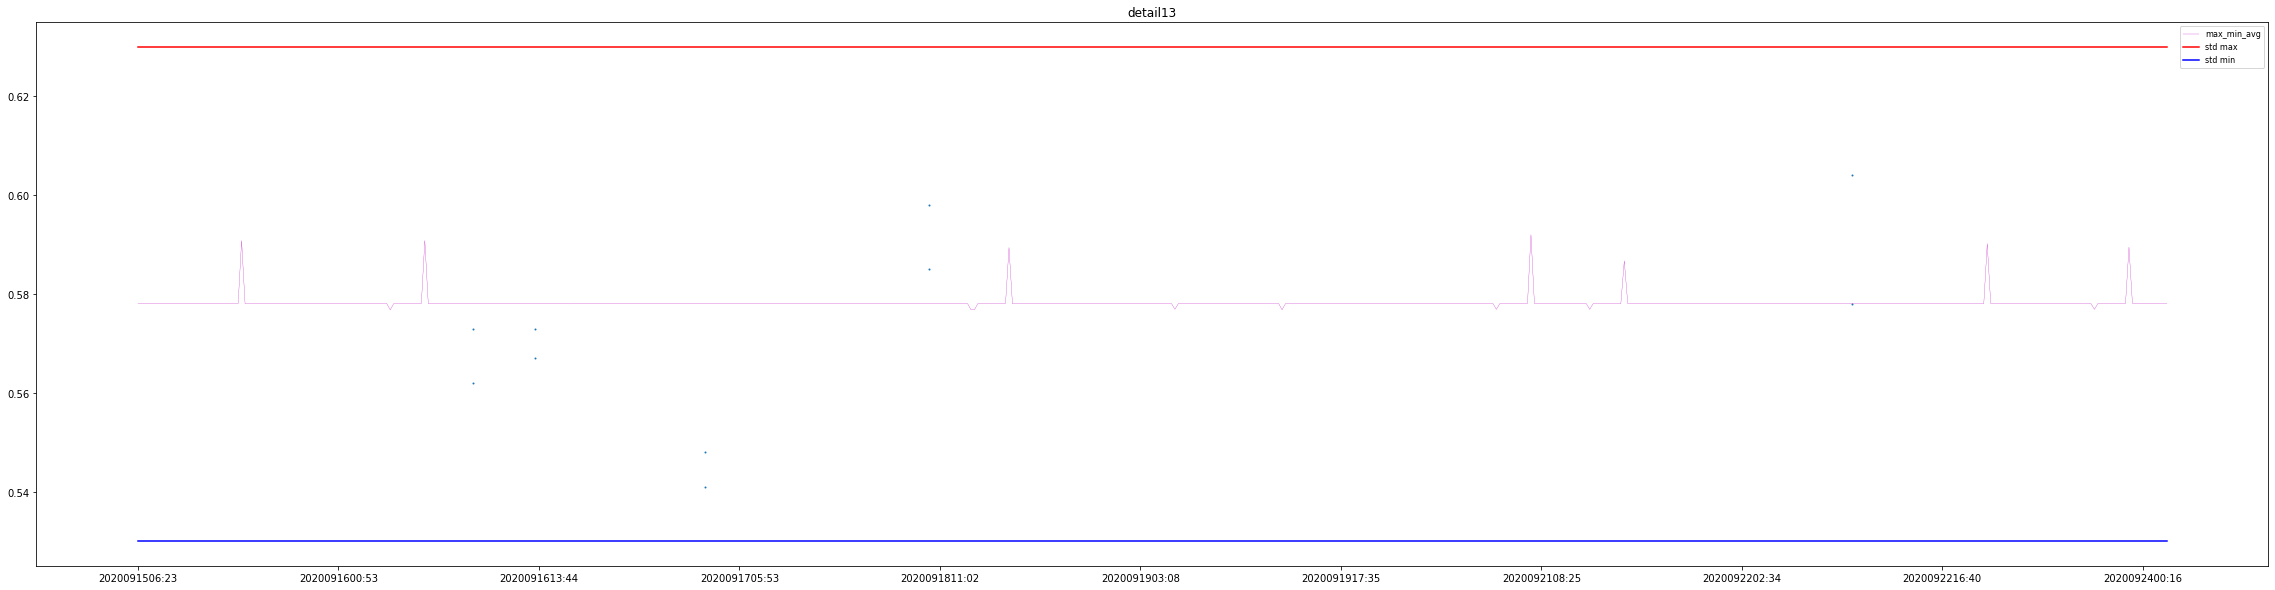

In [ ]:
rate(df)

labels = []
pred_label(by_package, by_machine)

pred_detail_plot("0162B00100",by_package, by_machine)
pred_avg_plot("0162B00100",by_package, by_machine)

#Prediction - By machine
Example of prediction by specific machine, just change "by_machine = True" then the pictures of prediction will show the label.

In [ ]:
by_package = False
by_machine = True   #only here is different

# put test data and label npy file path, ex: 'test_all.npy', 'label_all.npy'
test = np.load(folder_path + 'test_m.npy')
label = np.load(folder_path + 'label_m.npy',allow_pickle=True)
print(test.shape)
print(label.shape)

test = torch.tensor(test).to(torch.float32)
print(test.shape)

(10848, 100, 3)
(10848, 1)
torch.Size([10848, 100, 3])


In [ ]:
with torch.no_grad():
  pred = model(test, alpha=0.1, beta=0.1)

np.save(folder_path + 'pred_m.npy', pred)

In [ ]:
df = pd.DataFrame(test.reshape(-1, sequence_num*3).numpy())
p_df = pd.DataFrame(pred.numpy())

for i in range(26):
  df['pred'+str(i+1)] = p_df[i]

measure_pred = np.array(measure_std(pred, "0162B00100"))

df['label'] = label
df['measure_pred'] = measure_pred

data = np.load(folder_path+'true.npy',allow_pickle=True)
data = pd.DataFrame(data)
data_true = []
data_label = []
data_df = pd.DataFrame()

for pred_num in range(len(pred)):
  for data_num in range(len(data)):
    if data[0][data_num] == label[pred_num]: 
      data_label.append(pred_num)
      true = []
      for i in range(13):
        true.append(data.iloc[data_num][i+1])
      data_true.append(true)

data_df["num"] = pd.DataFrame(data_label)
data_true = pd.DataFrame(data_true)
for i in range(13):
  data_df['true'+str(i+1)] = data_true[i]

df.to_csv(folder_path +"/test_m.csv", header=True, index=True) 
print(df.head(10))
print(data_df.head(10))

      0    1         2     3    4         5     6    7         8     9  ...  \
0  34.0  4.0  0.566667  34.0  4.0  0.616667  34.0  4.0  0.283333  34.0  ...   
1  34.0  4.0  0.616667  34.0  4.0  0.283333  34.0  4.0  0.416667  34.0  ...   
2  34.0  4.0  0.283333  34.0  4.0  0.416667  34.0  4.0  0.233333  34.0  ...   
3  34.0  4.0  0.416667  34.0  4.0  0.233333  34.0  4.0  0.016667  34.0  ...   
4  34.0  4.0  0.233333  34.0  4.0  0.016667  34.0  4.0  0.050000  34.0  ...   
5  34.0  4.0  0.016667  34.0  4.0  0.050000  34.0  4.0  0.100000  34.0  ...   
6  34.0  4.0  0.050000  34.0  4.0  0.100000  34.0  4.0  0.100000  34.0  ...   
7  34.0  4.0  0.100000  34.0  4.0  0.100000  34.0  4.0  0.016667  34.0  ...   
8  34.0  4.0  0.100000  34.0  4.0  0.016667  34.0  4.0  0.050000  34.0  ...   
9  34.0  4.0  0.016667  34.0  4.0  0.050000  34.0  4.0  0.100000  34.0  ...   

     pred19    pred20    pred21    pred22    pred23    pred24    pred25  \
0  3.366728  2.367555  0.385822  0.573384  0.577232  0.

7748/10848 良率: 0.7142330383480826
detail1


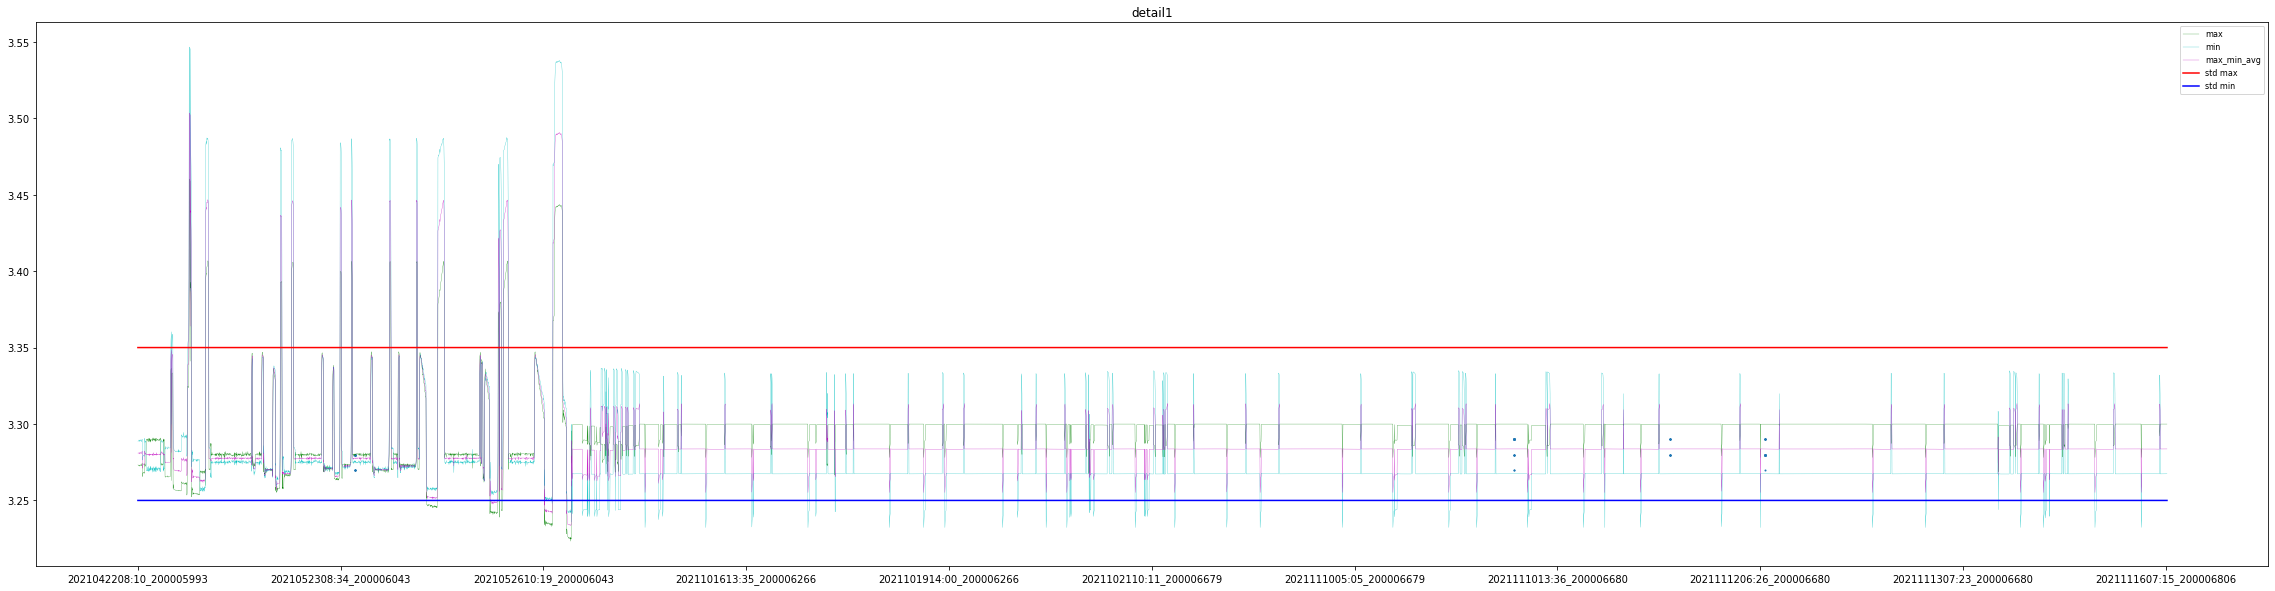

detail2


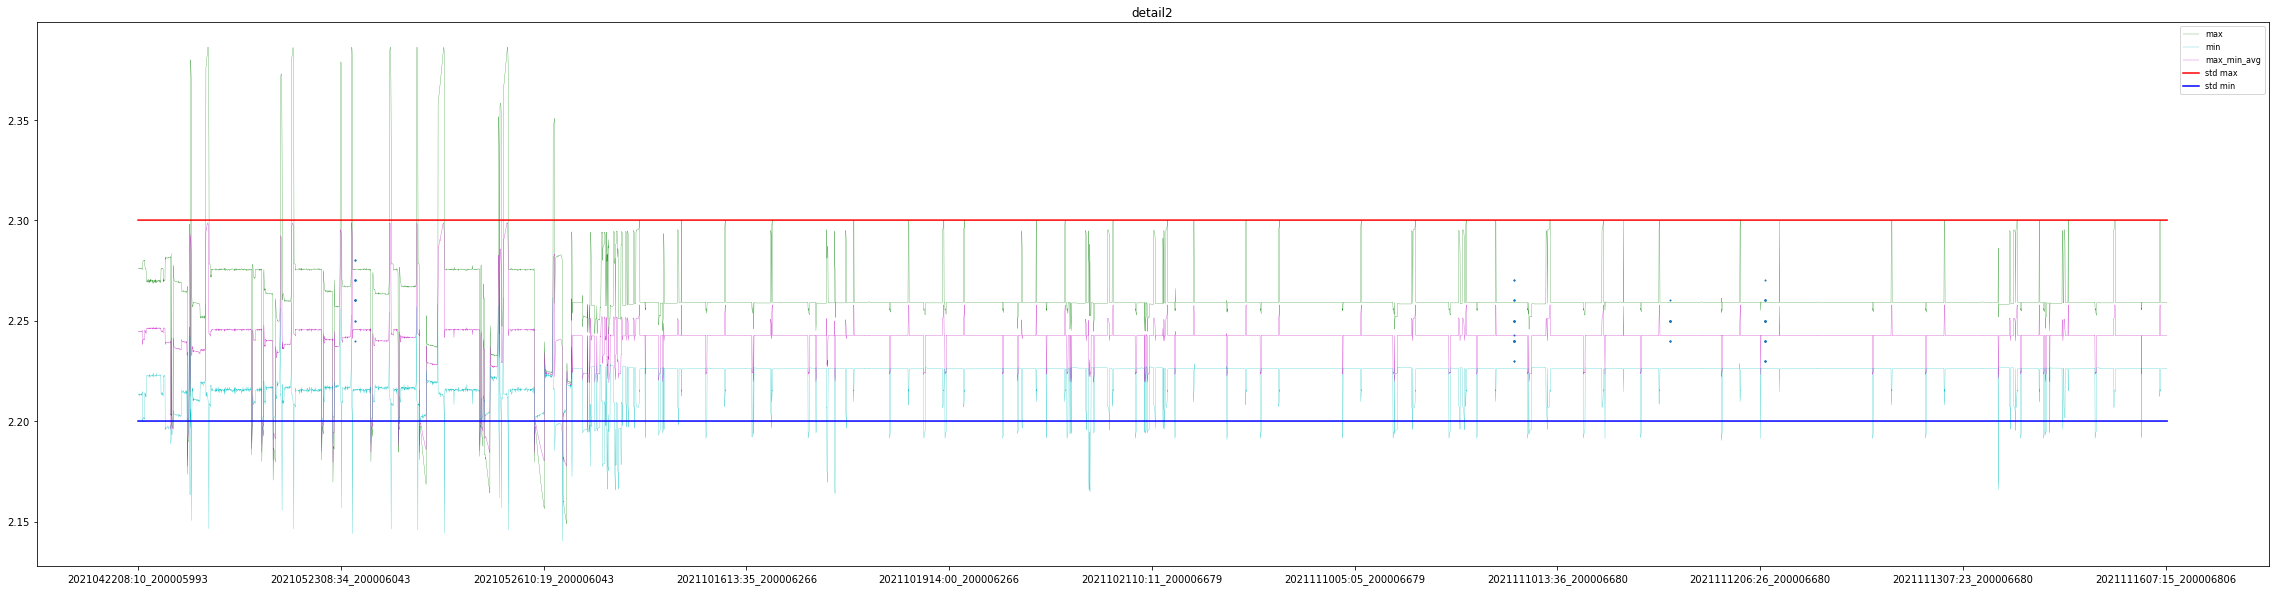

detail3


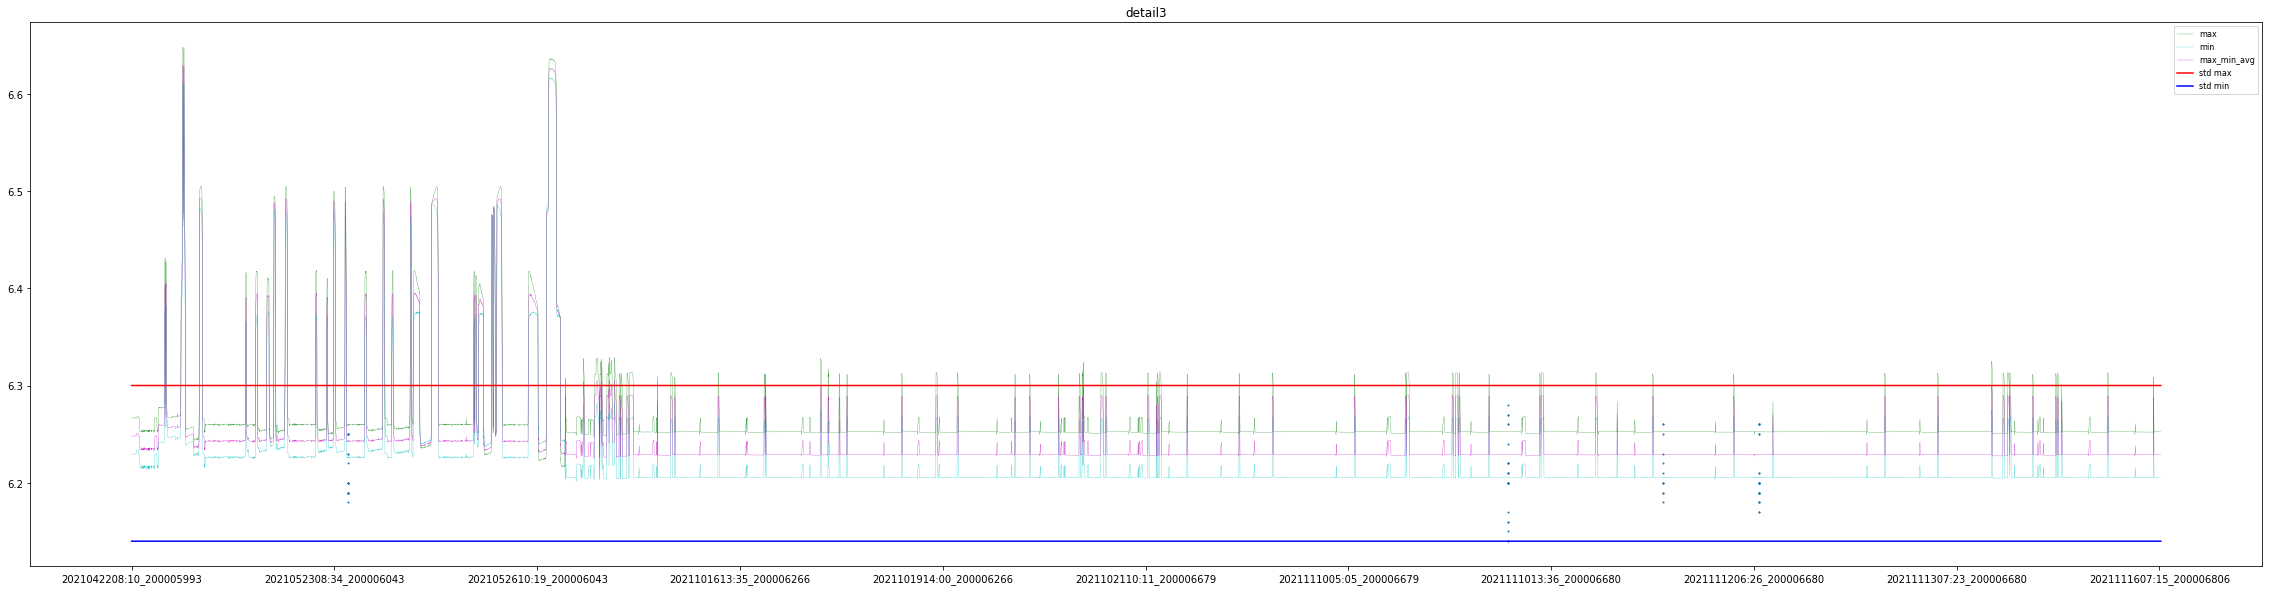

detail4


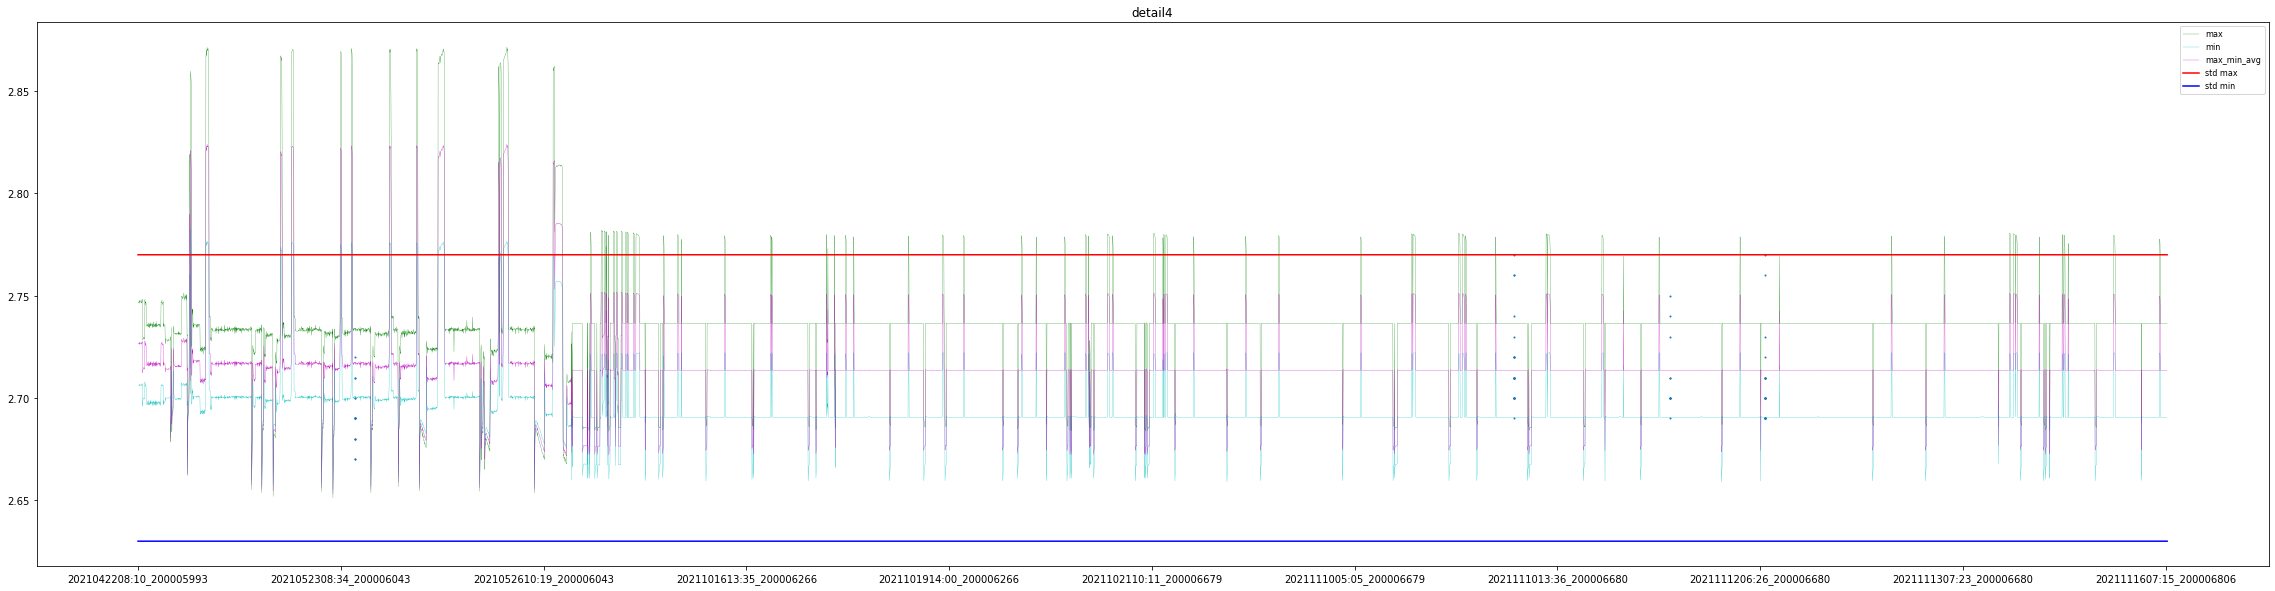

detail5


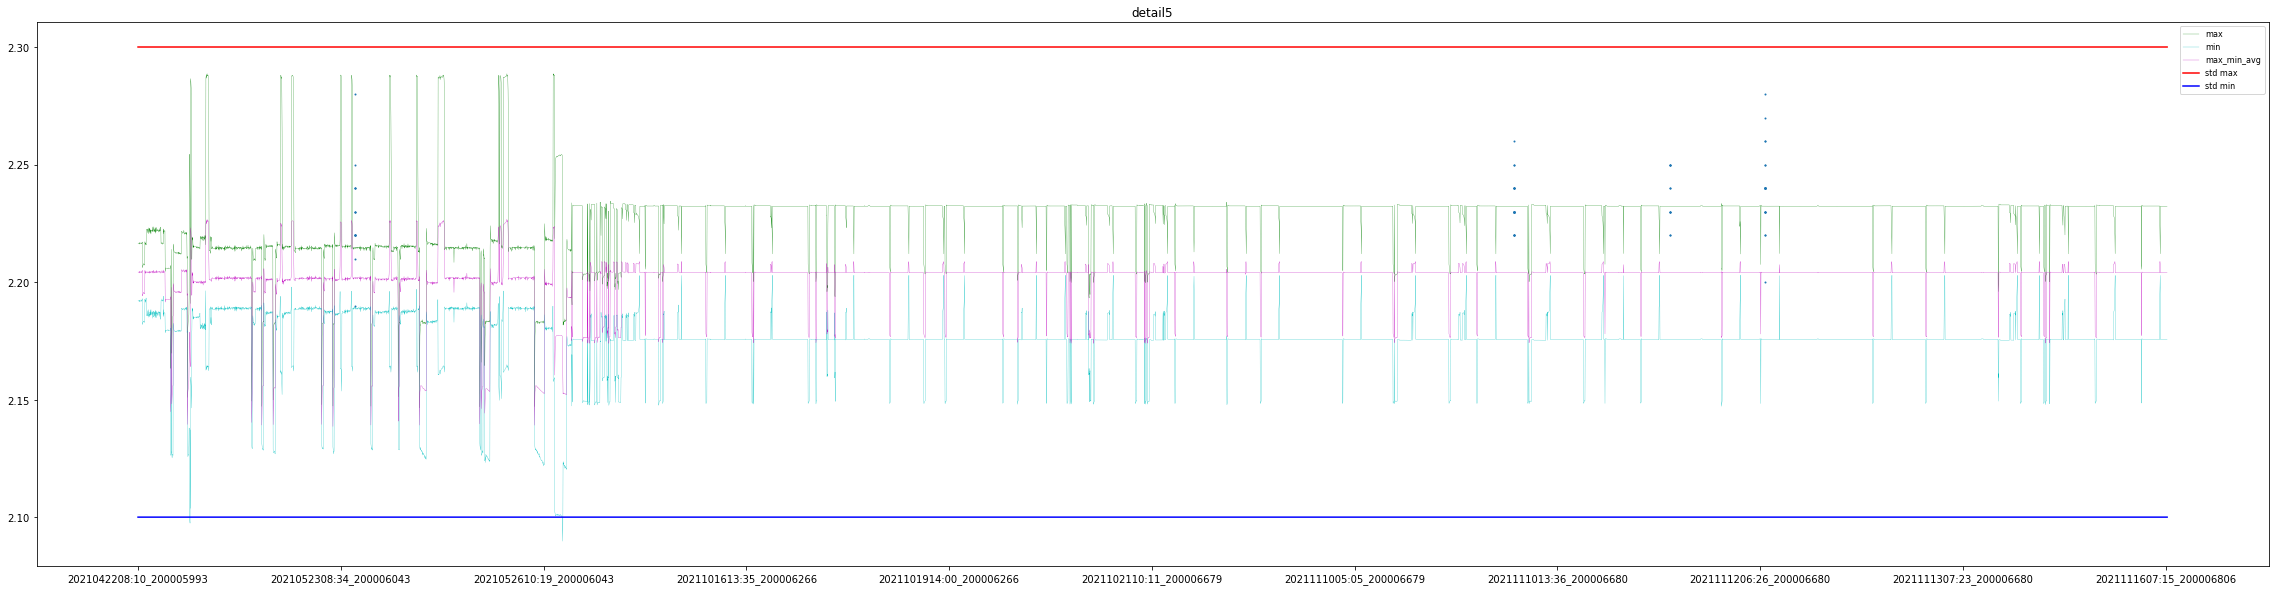

detail6


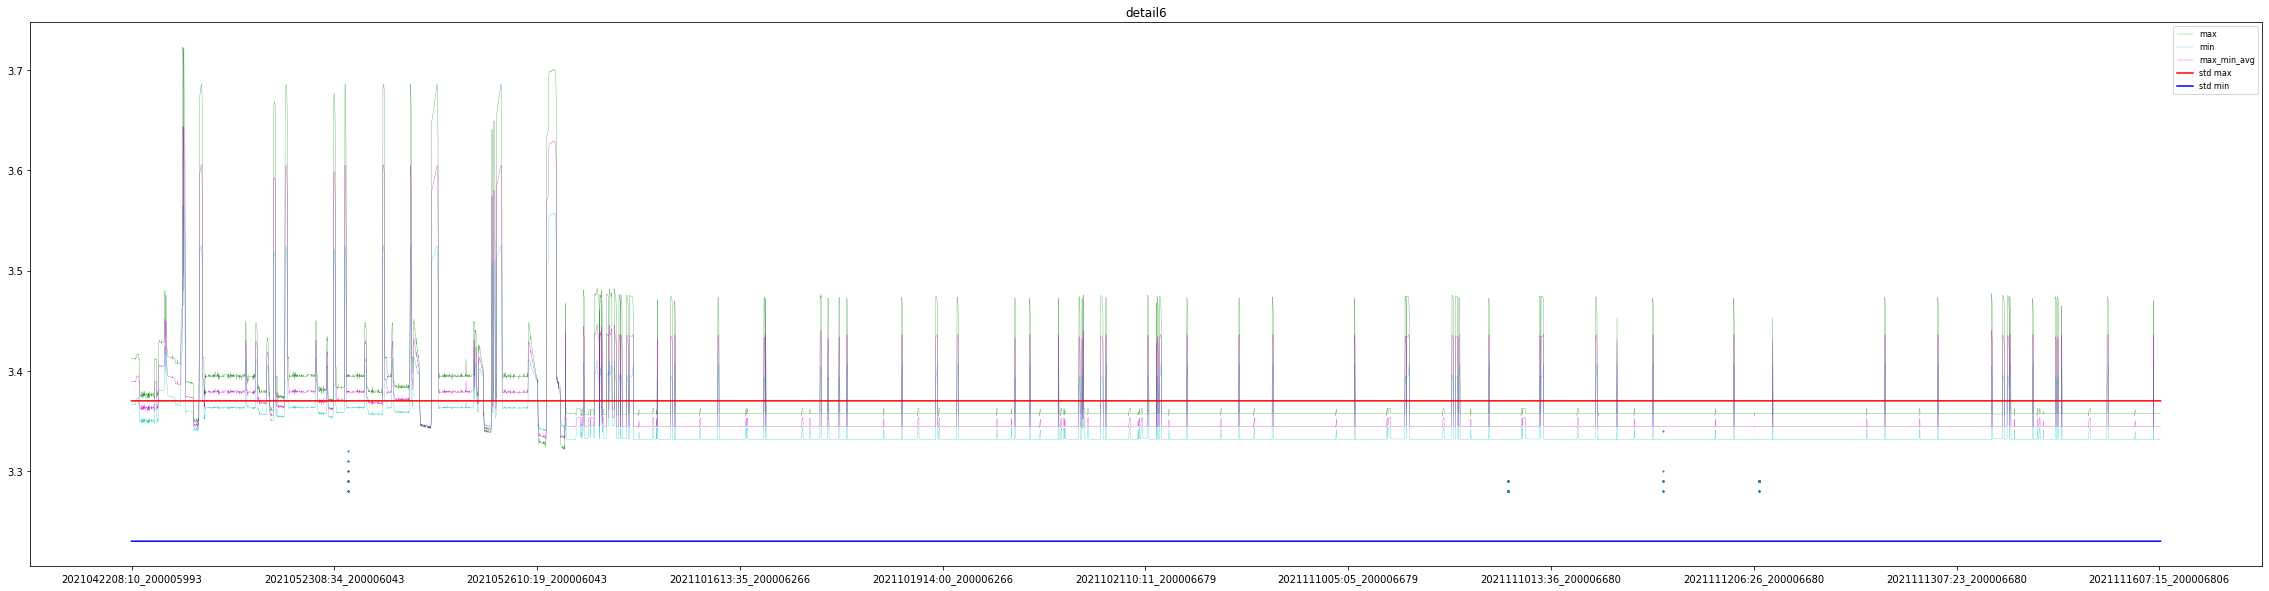

detail7


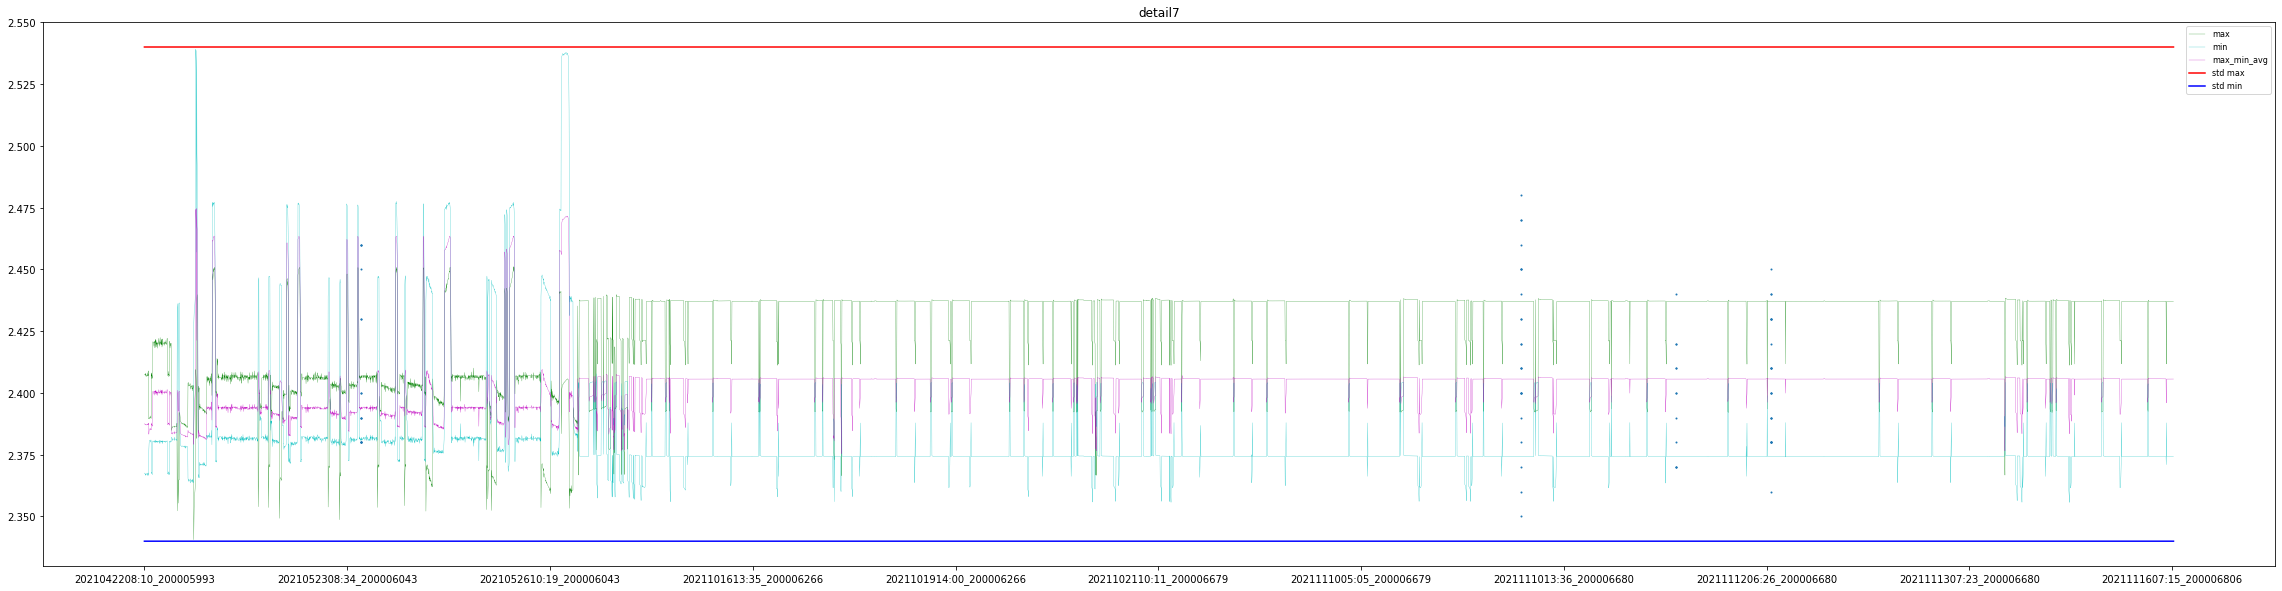

detail8


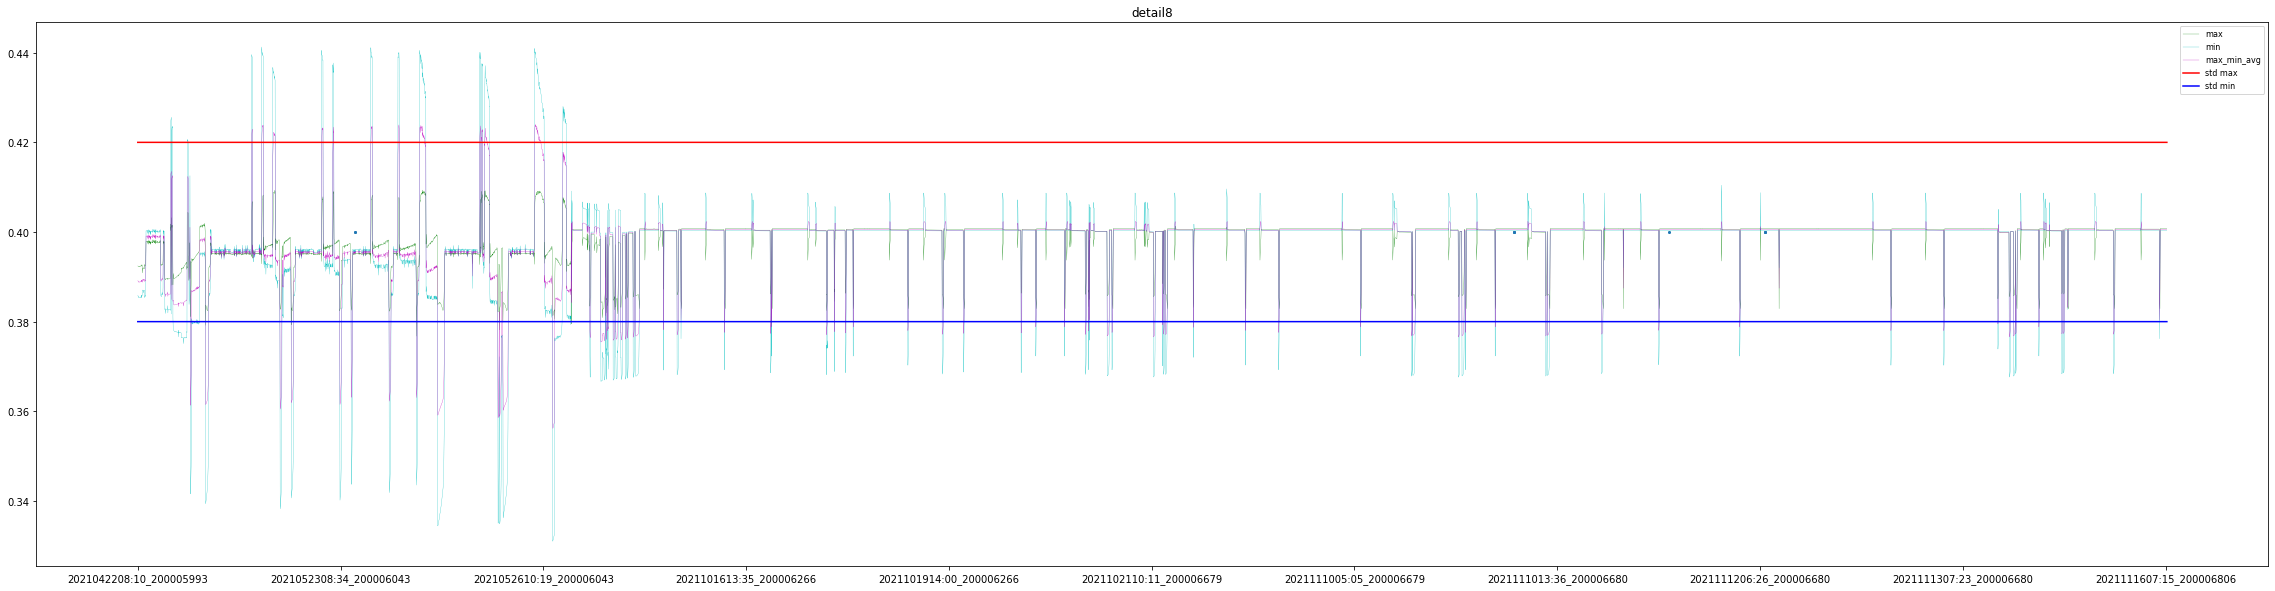

detail9


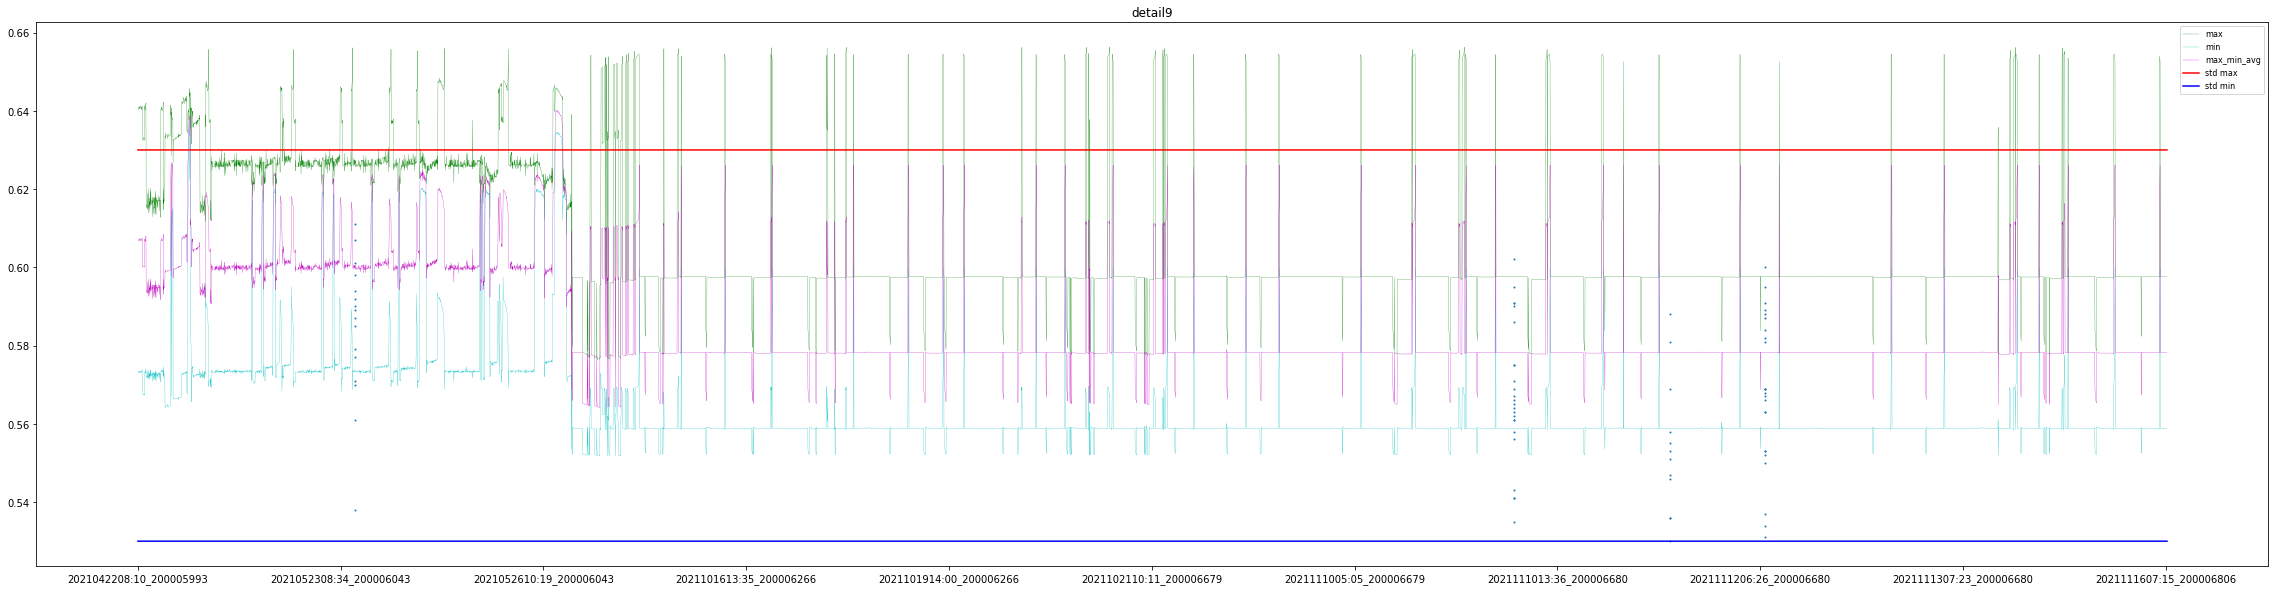

detail10


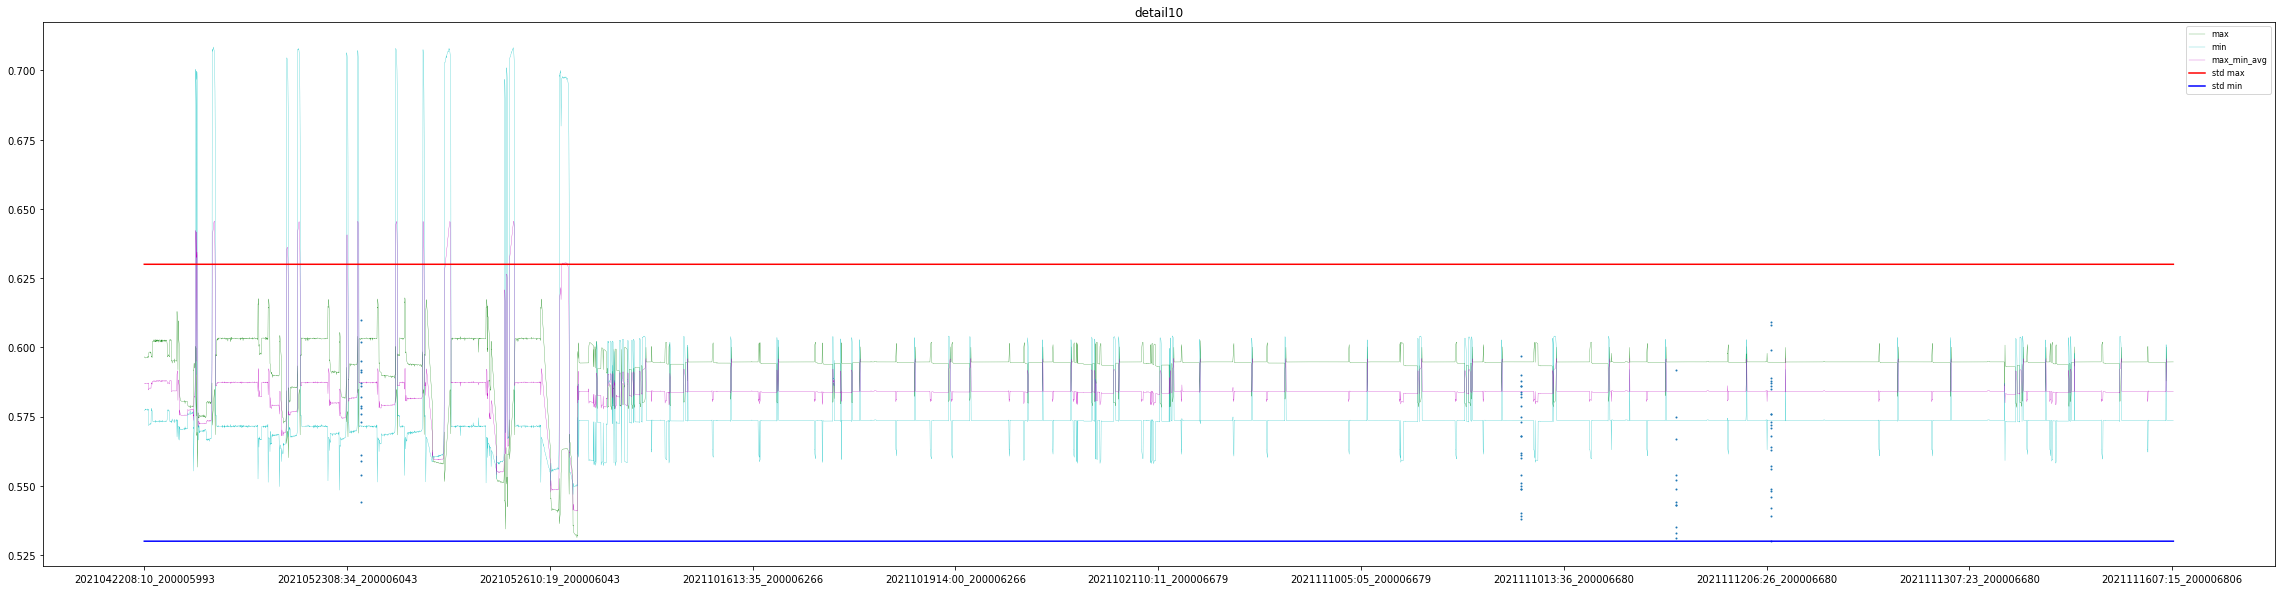

detail11


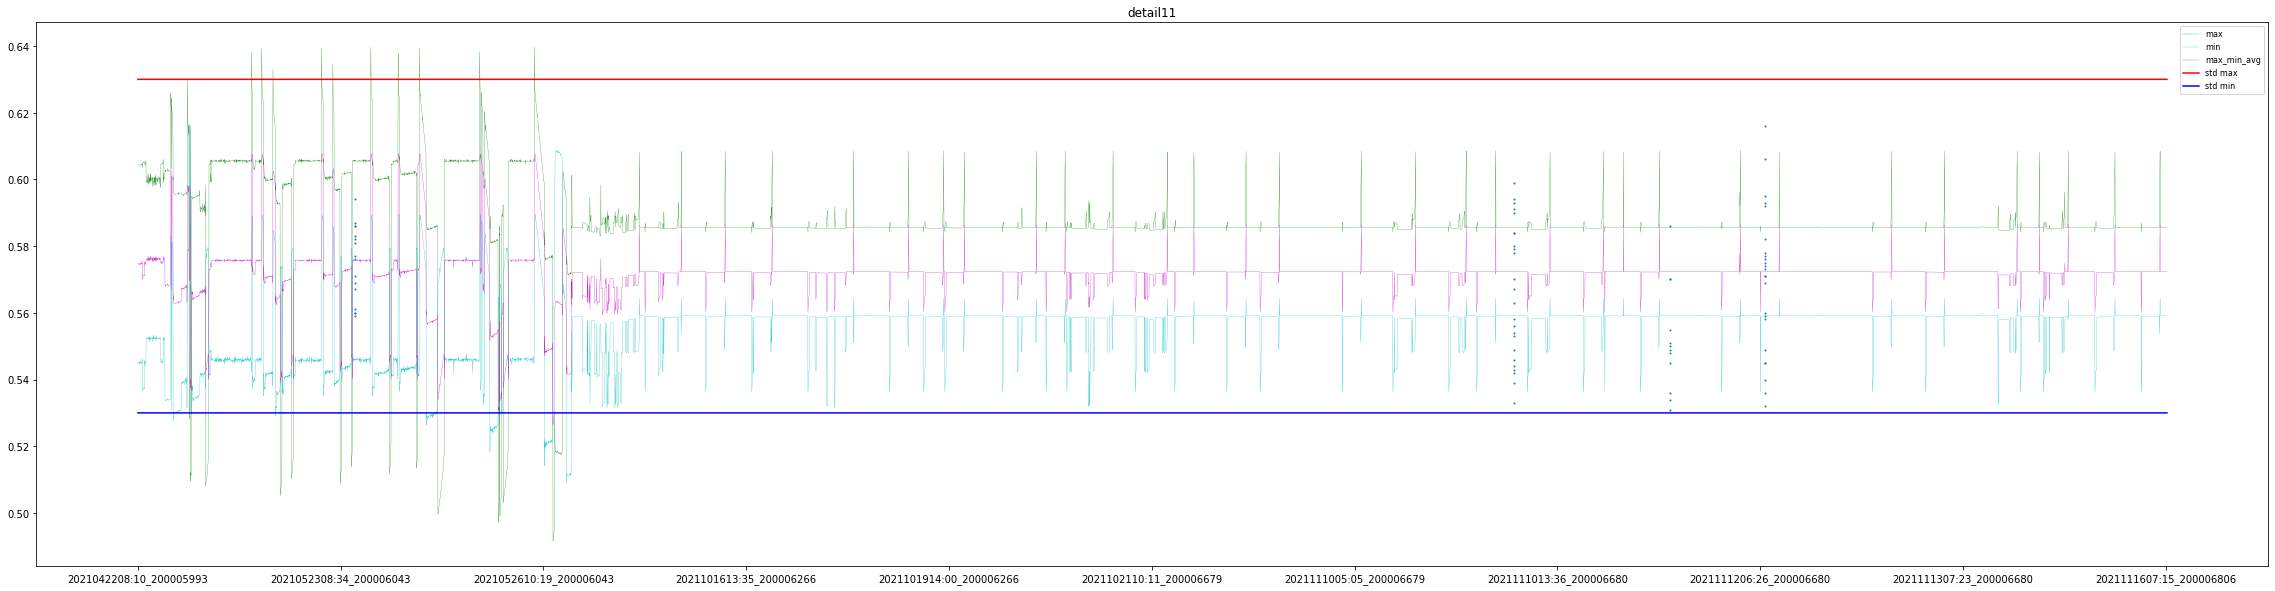

detail12


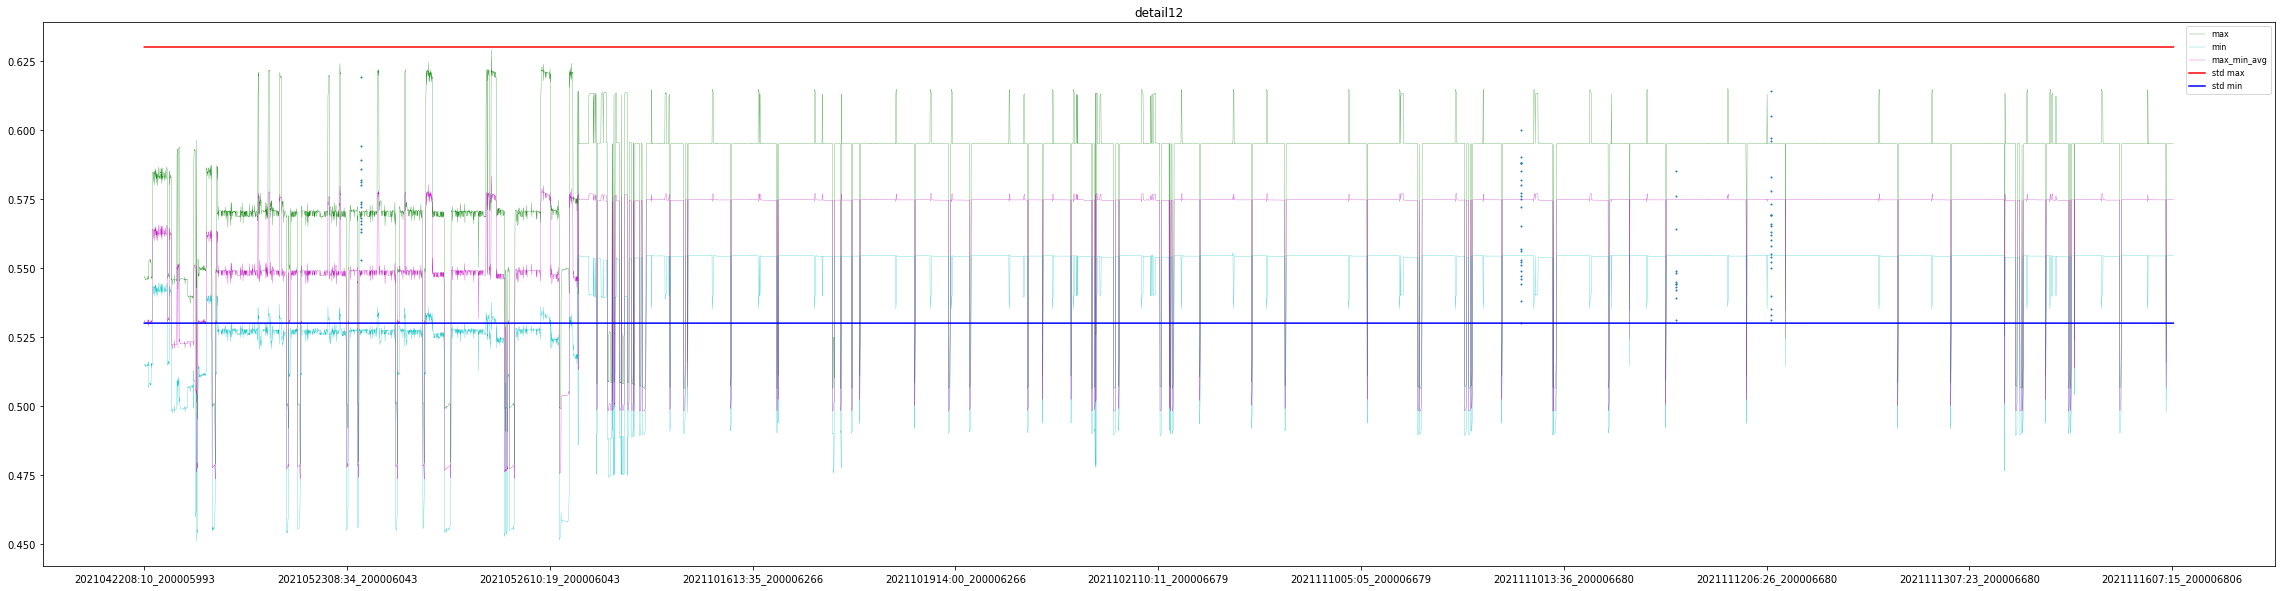

detail13


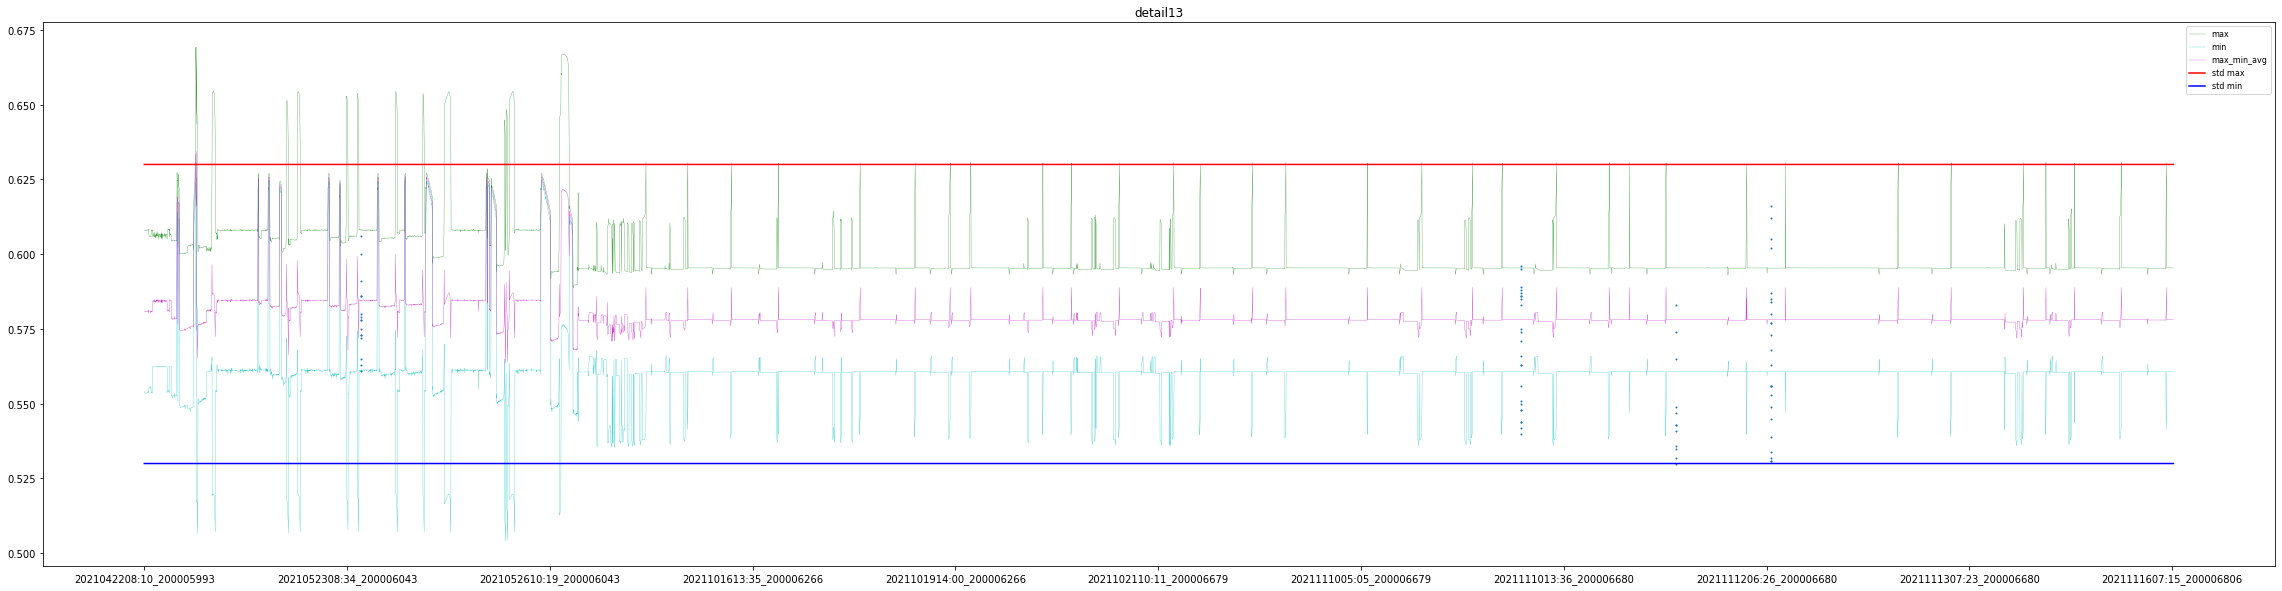

detail1


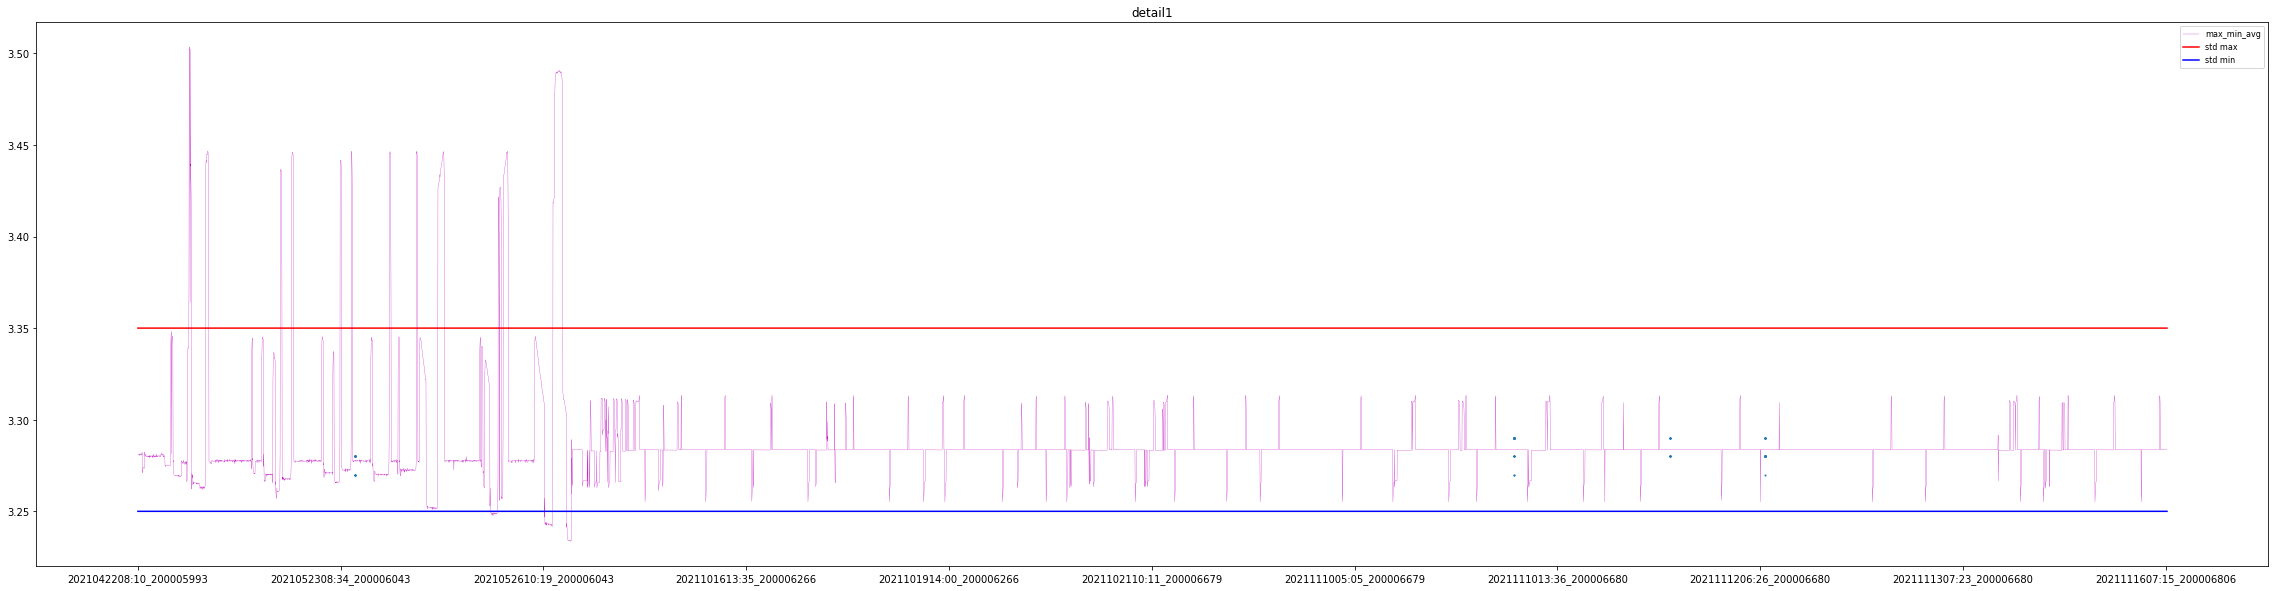

detail2


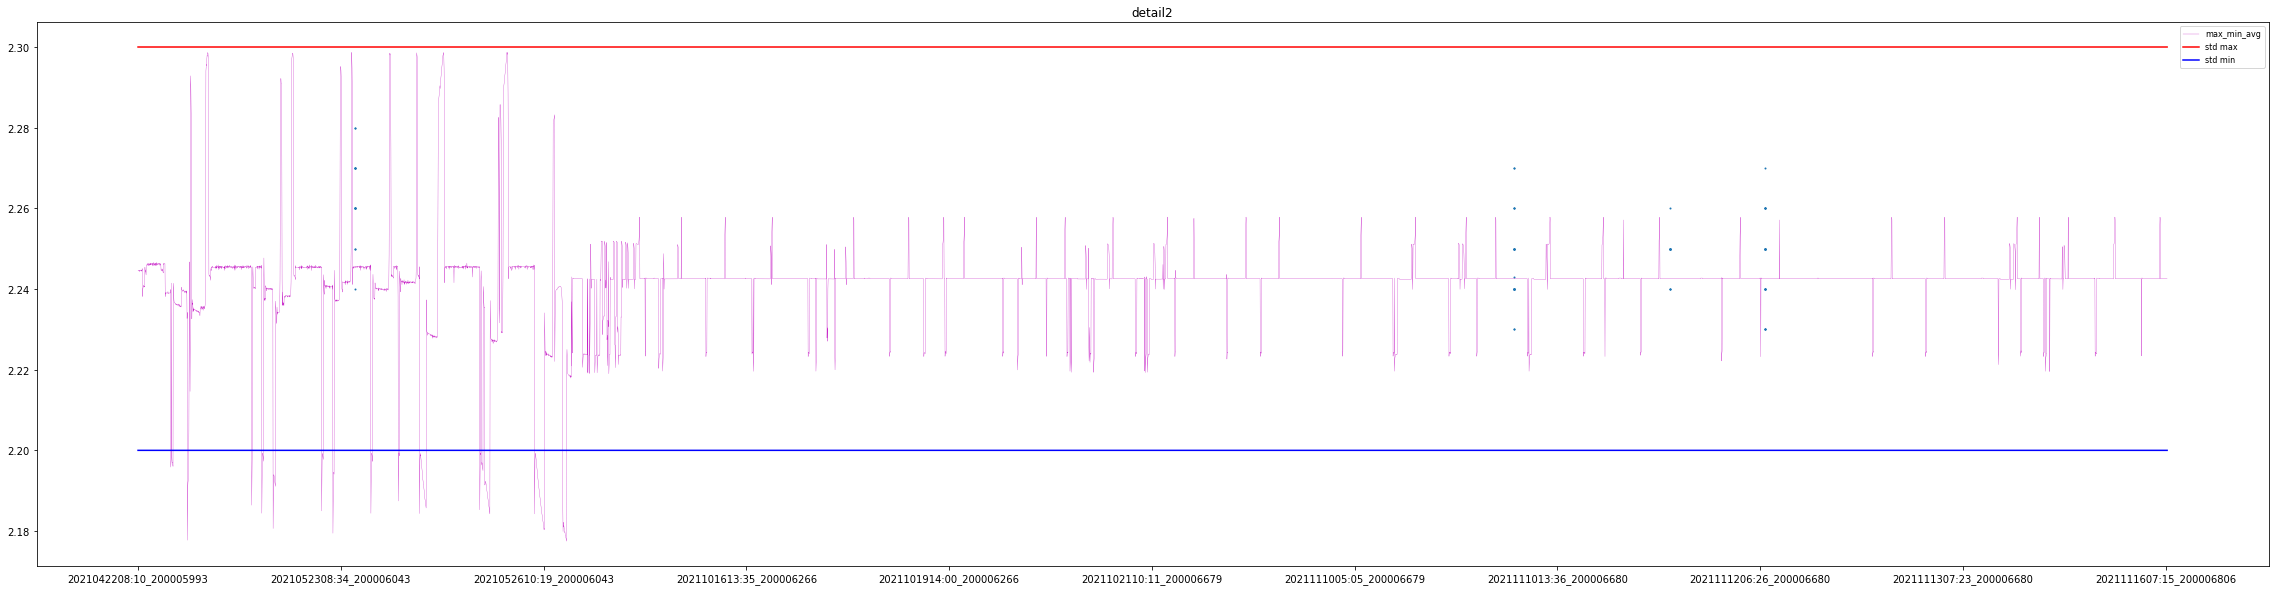

detail3


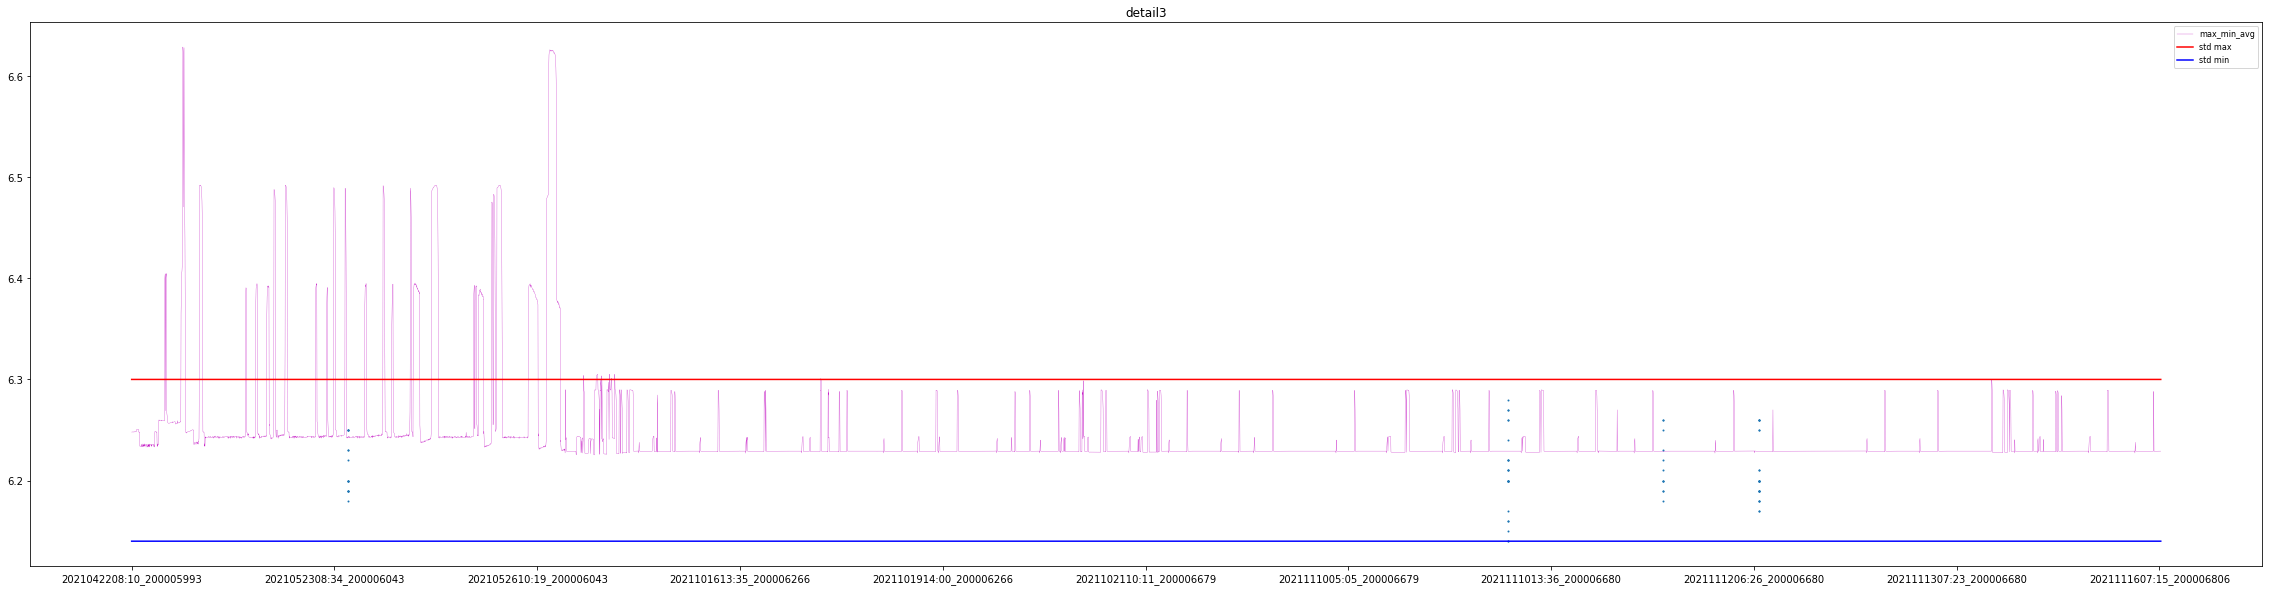

detail4


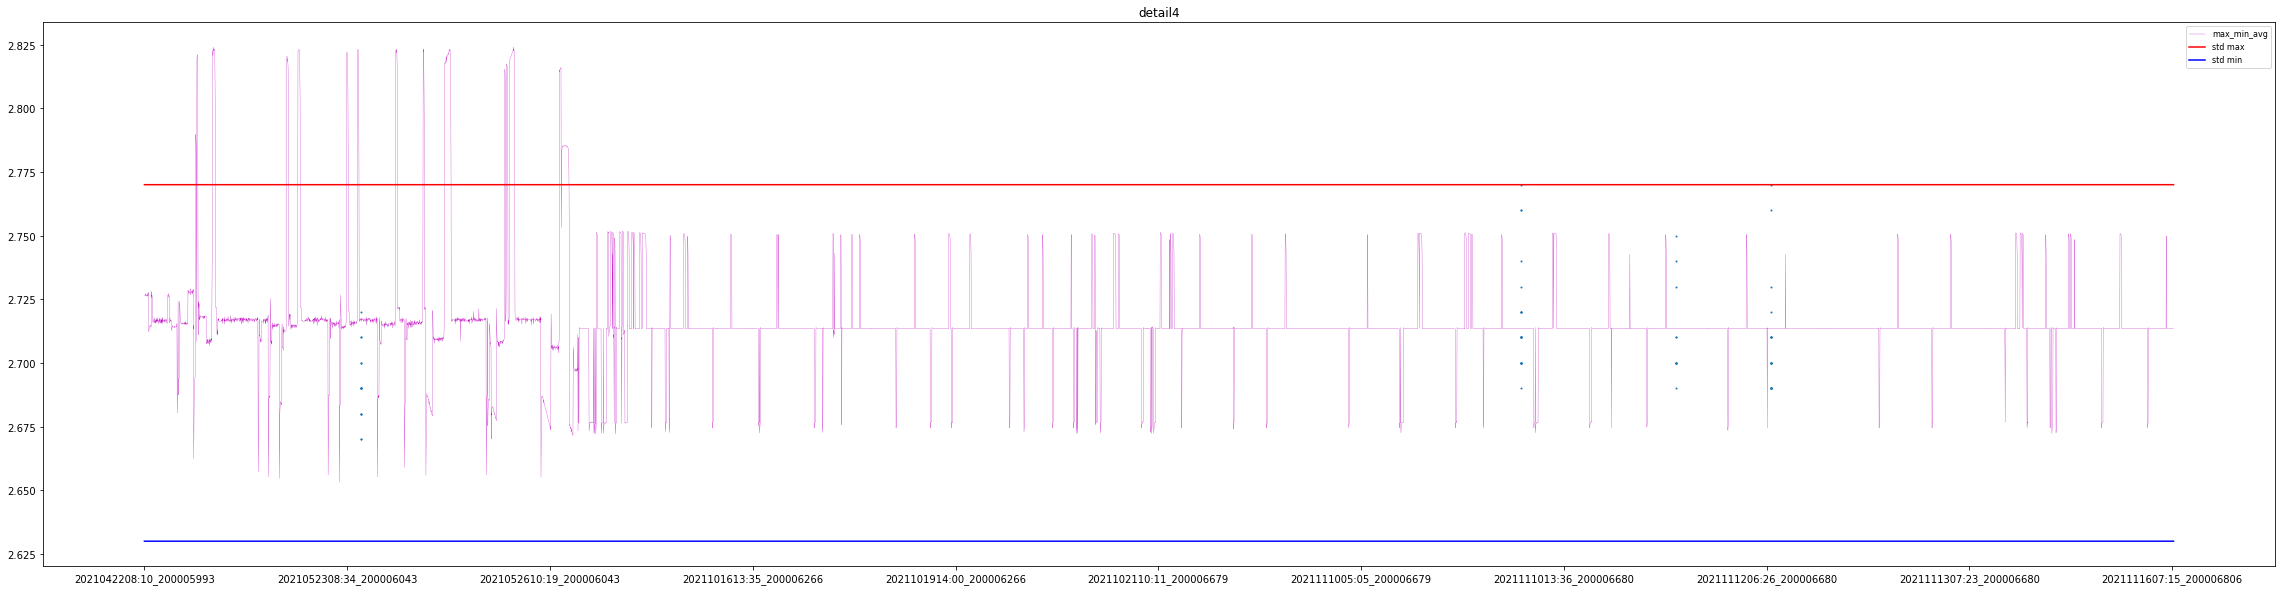

detail5


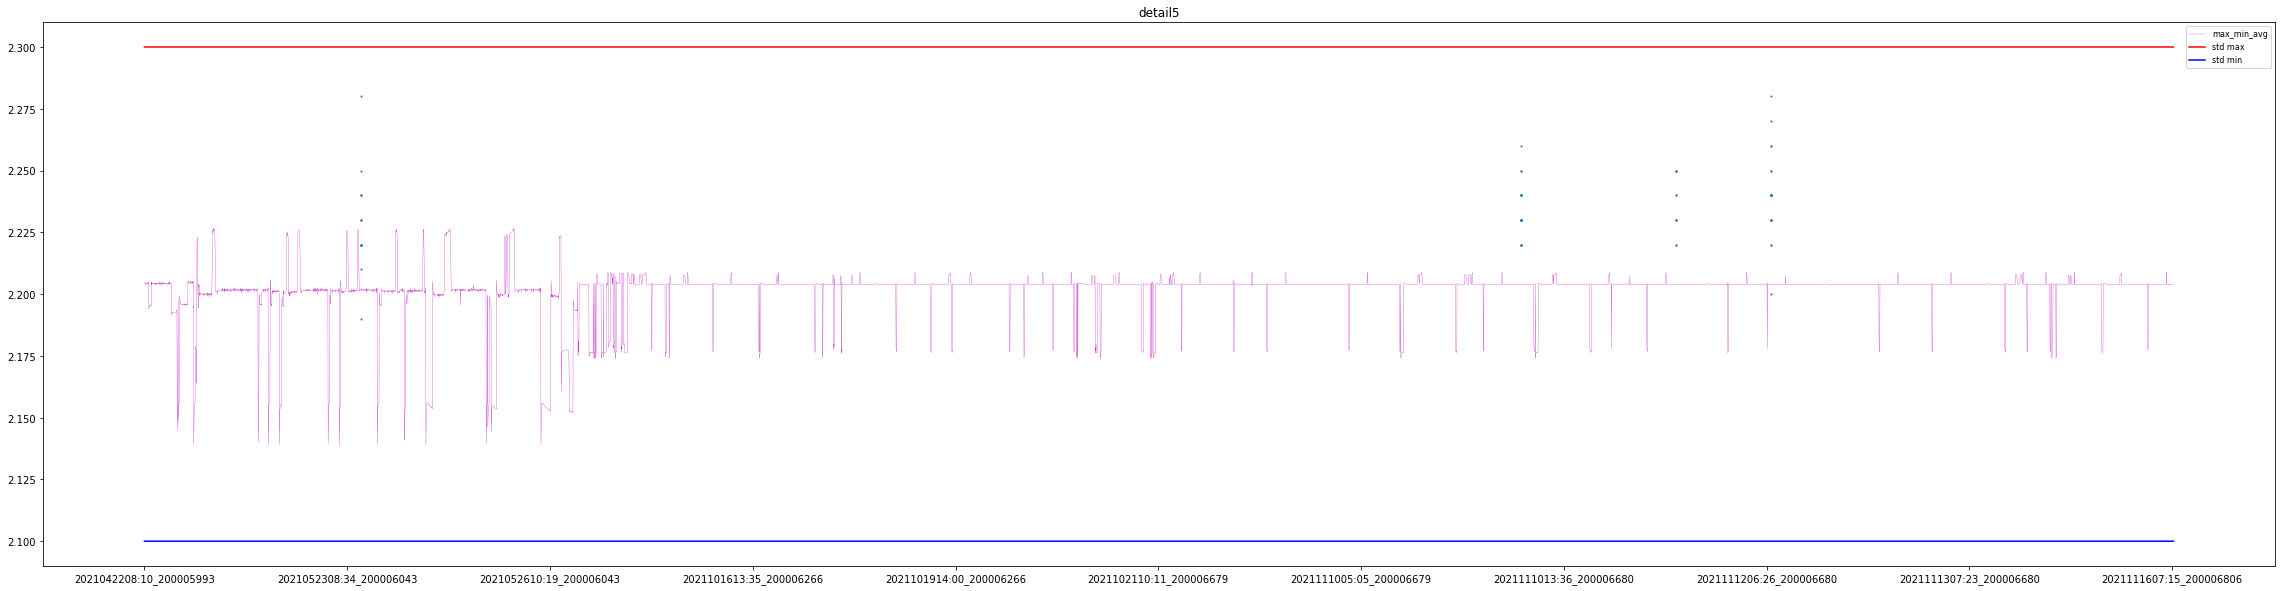

detail6


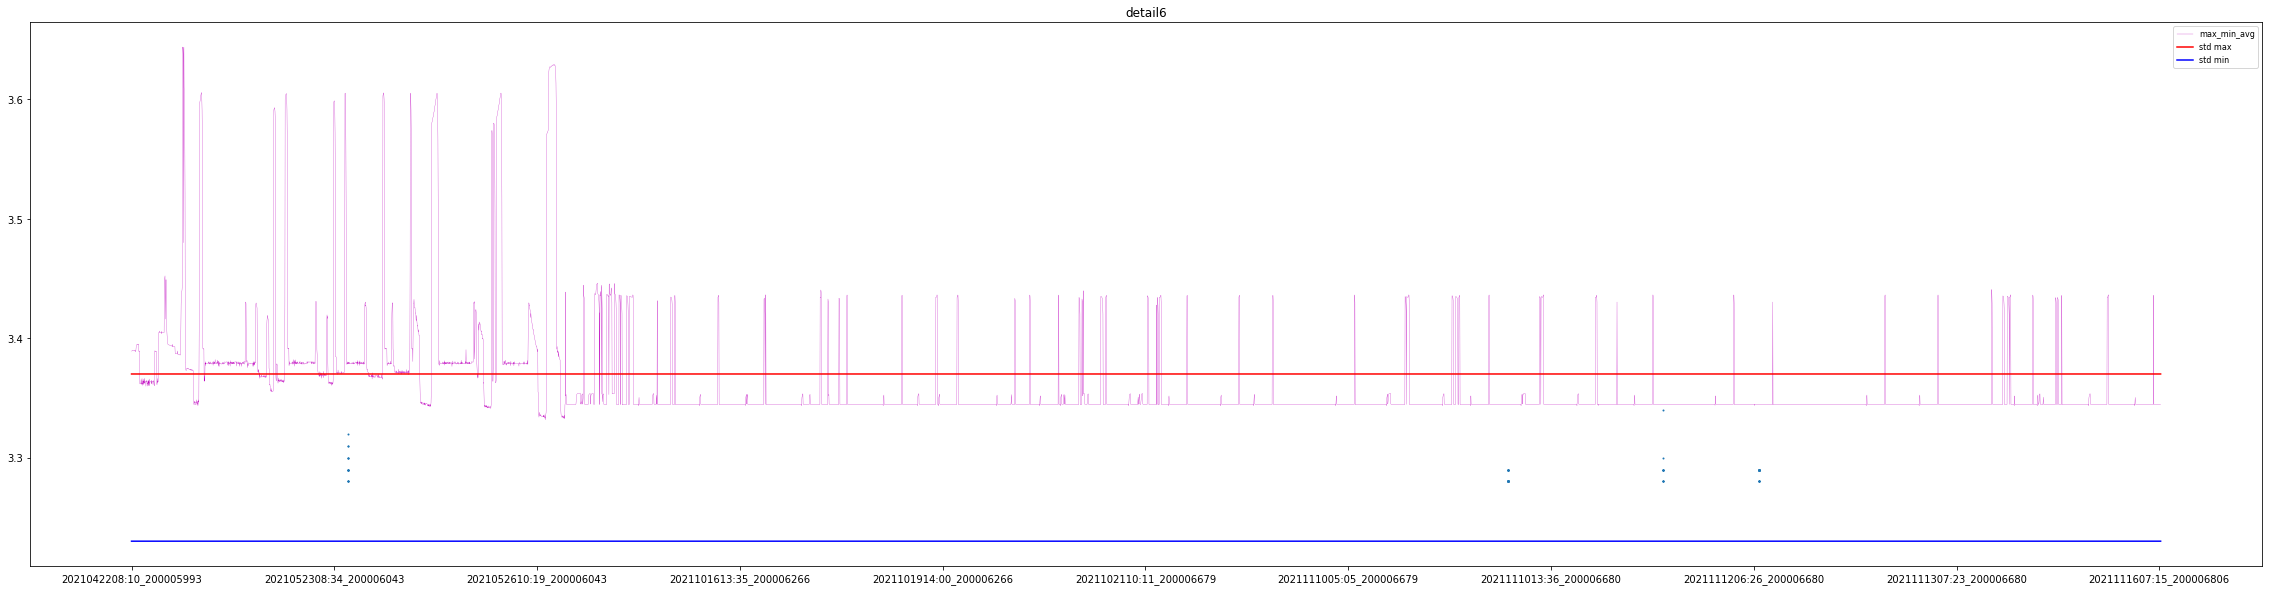

detail7


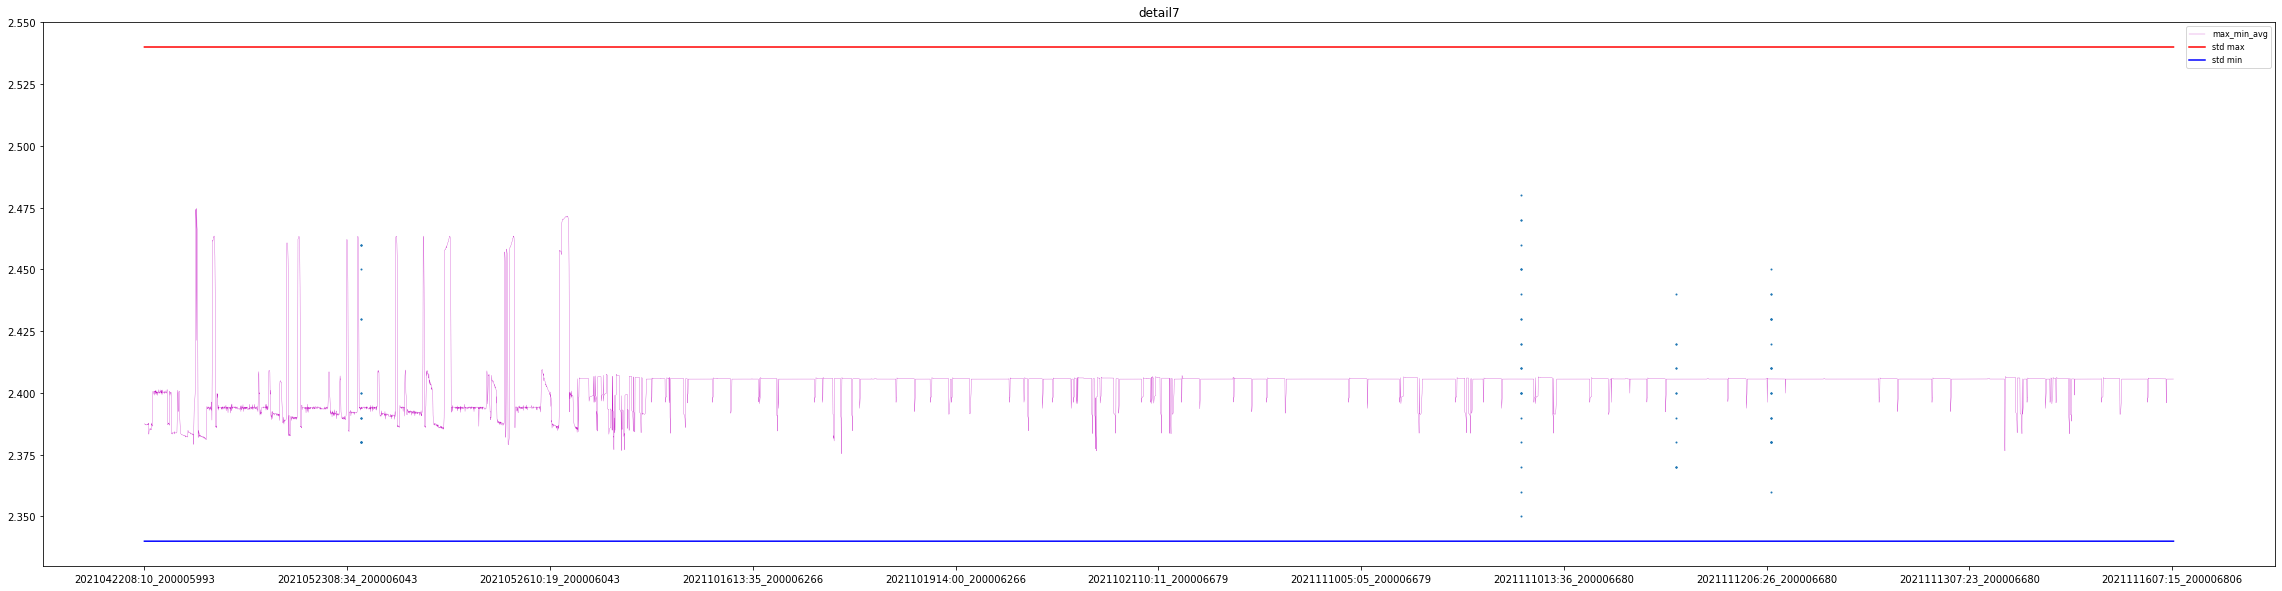

detail8


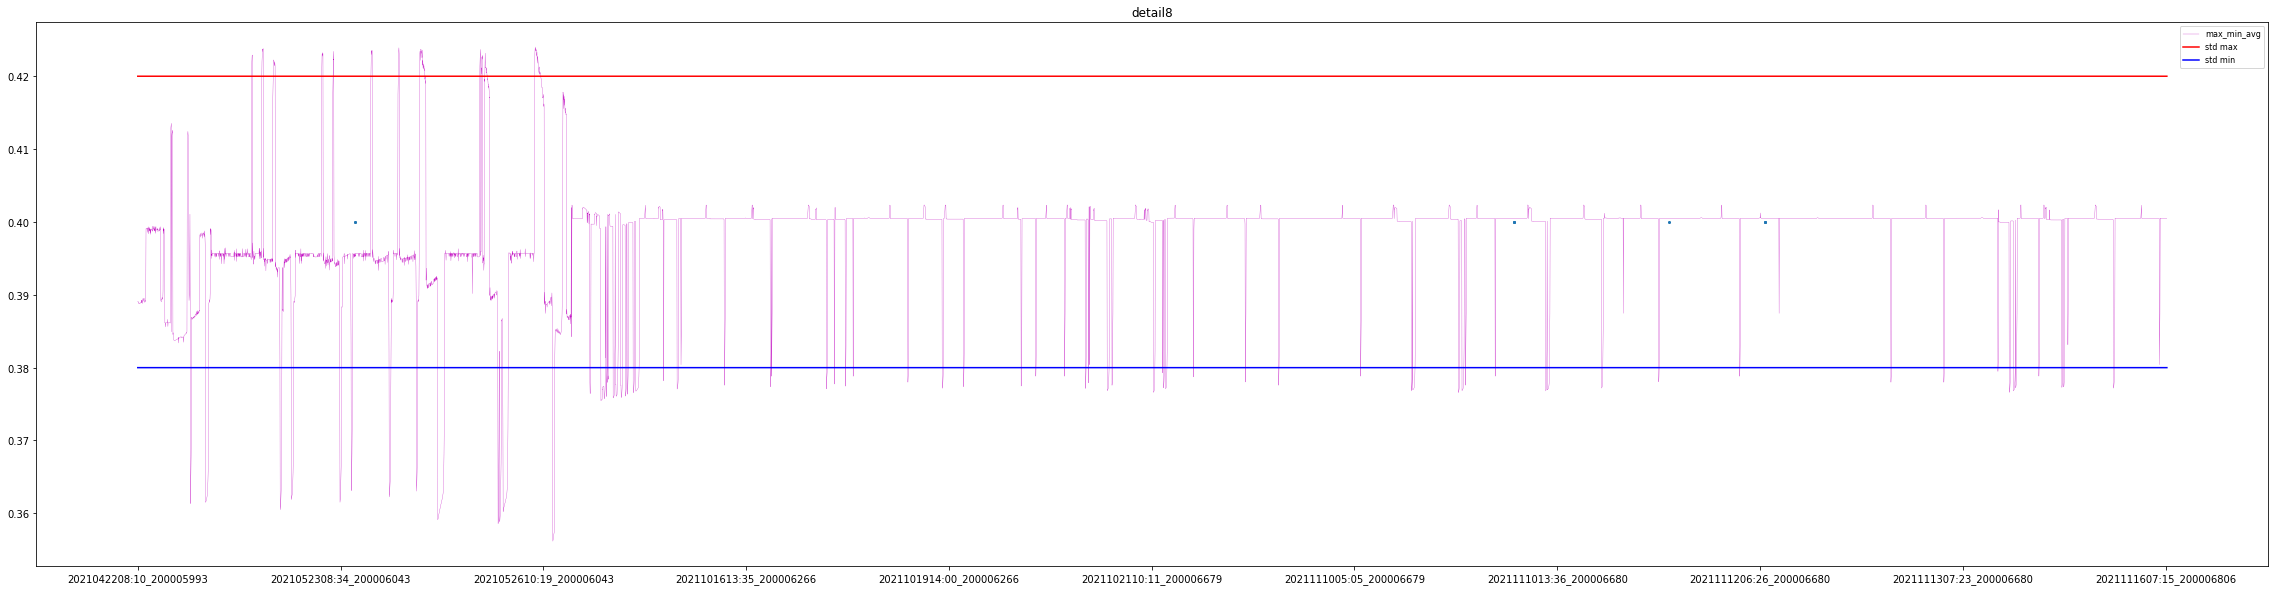

detail9


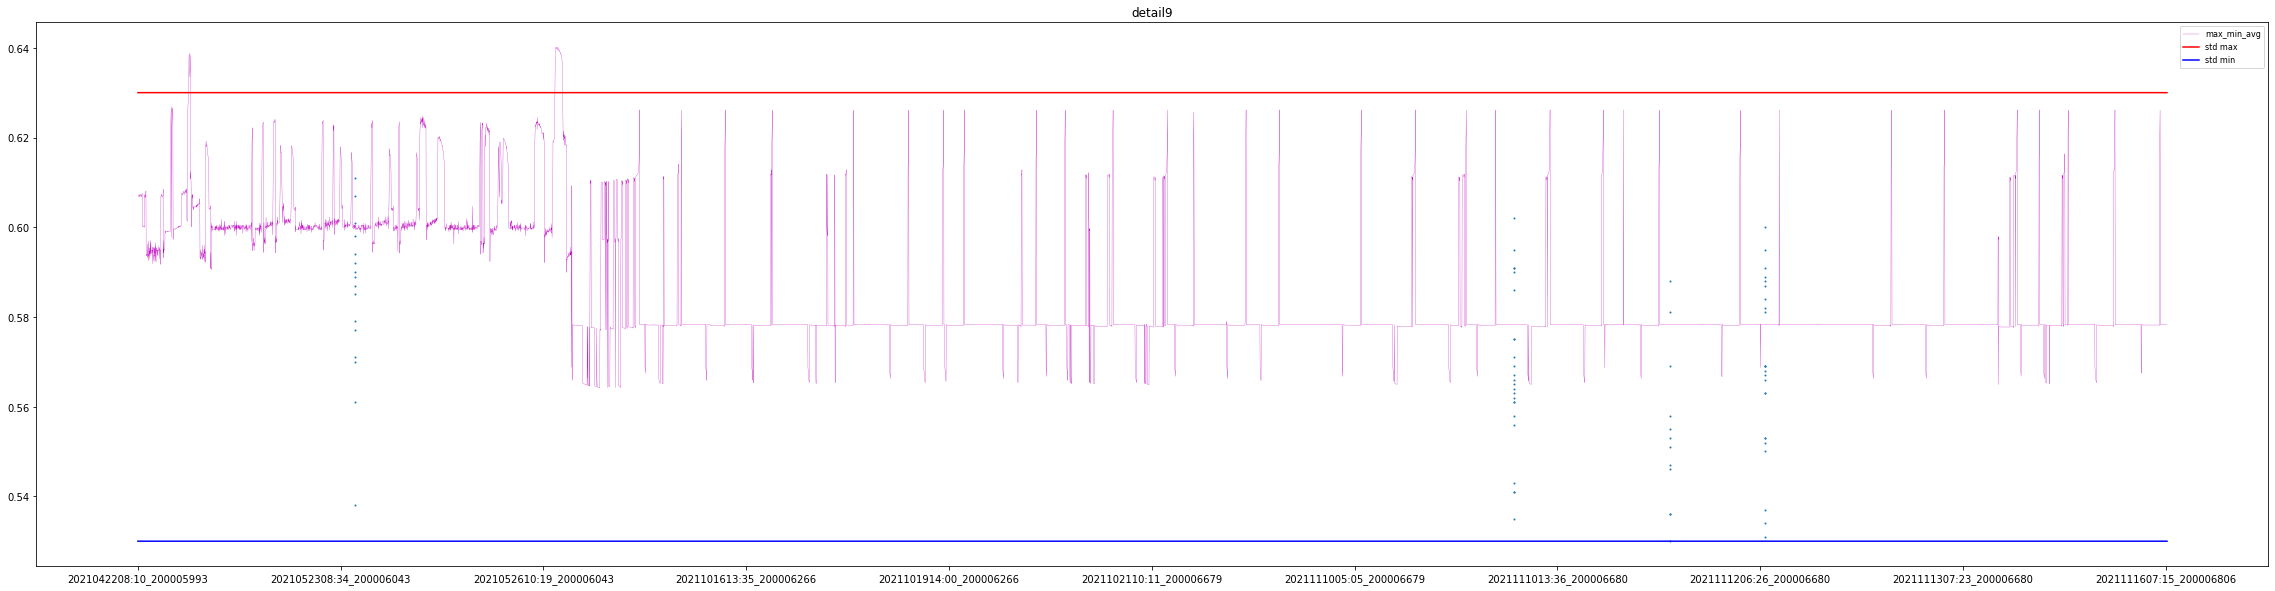

detail10


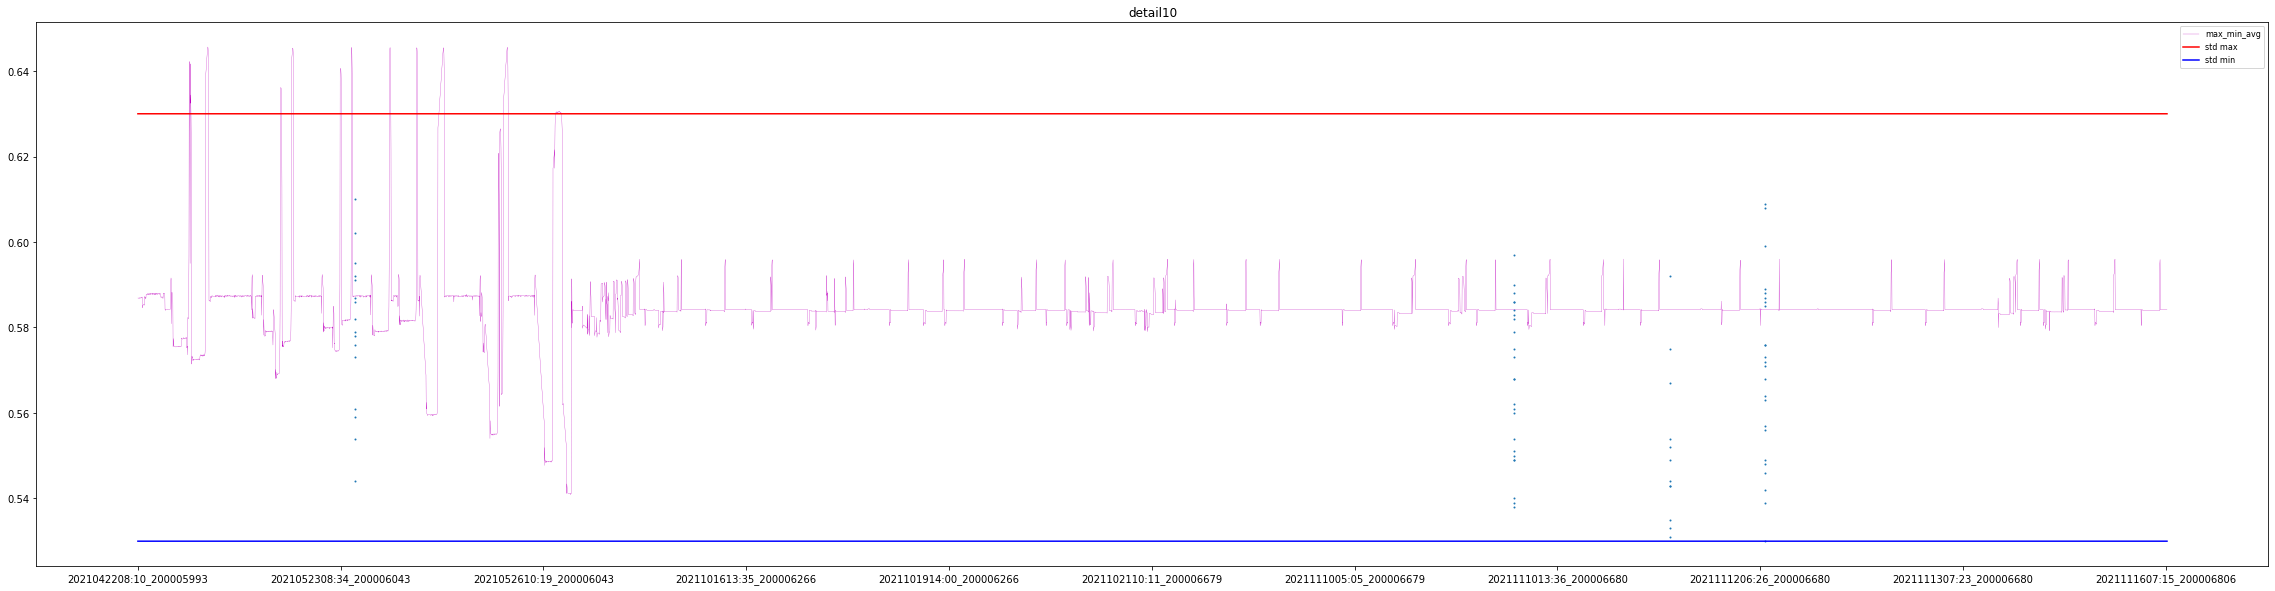

detail11


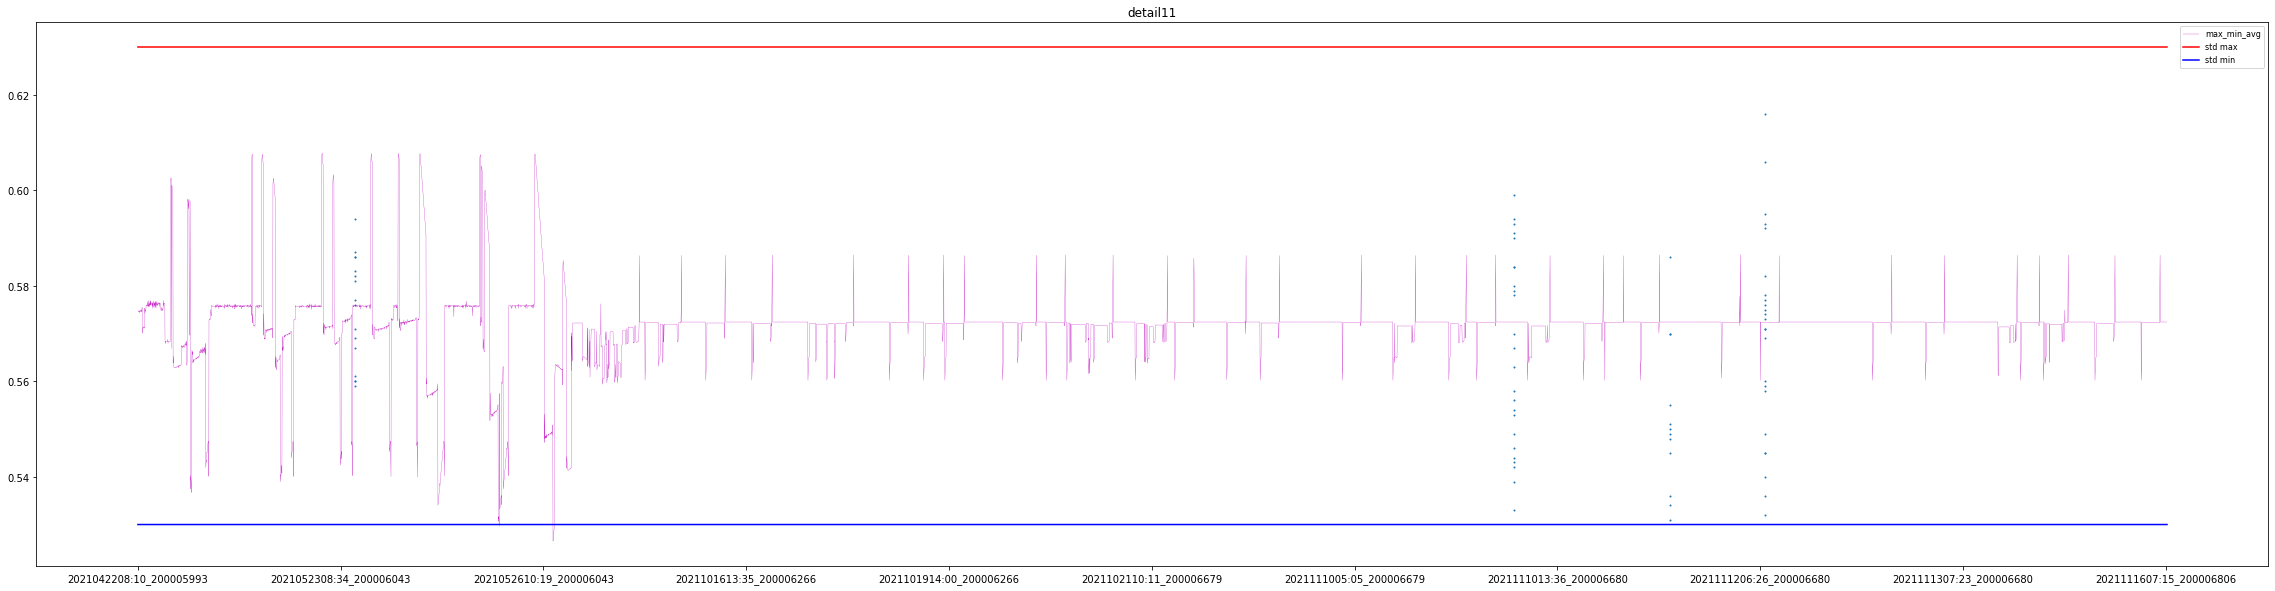

detail12


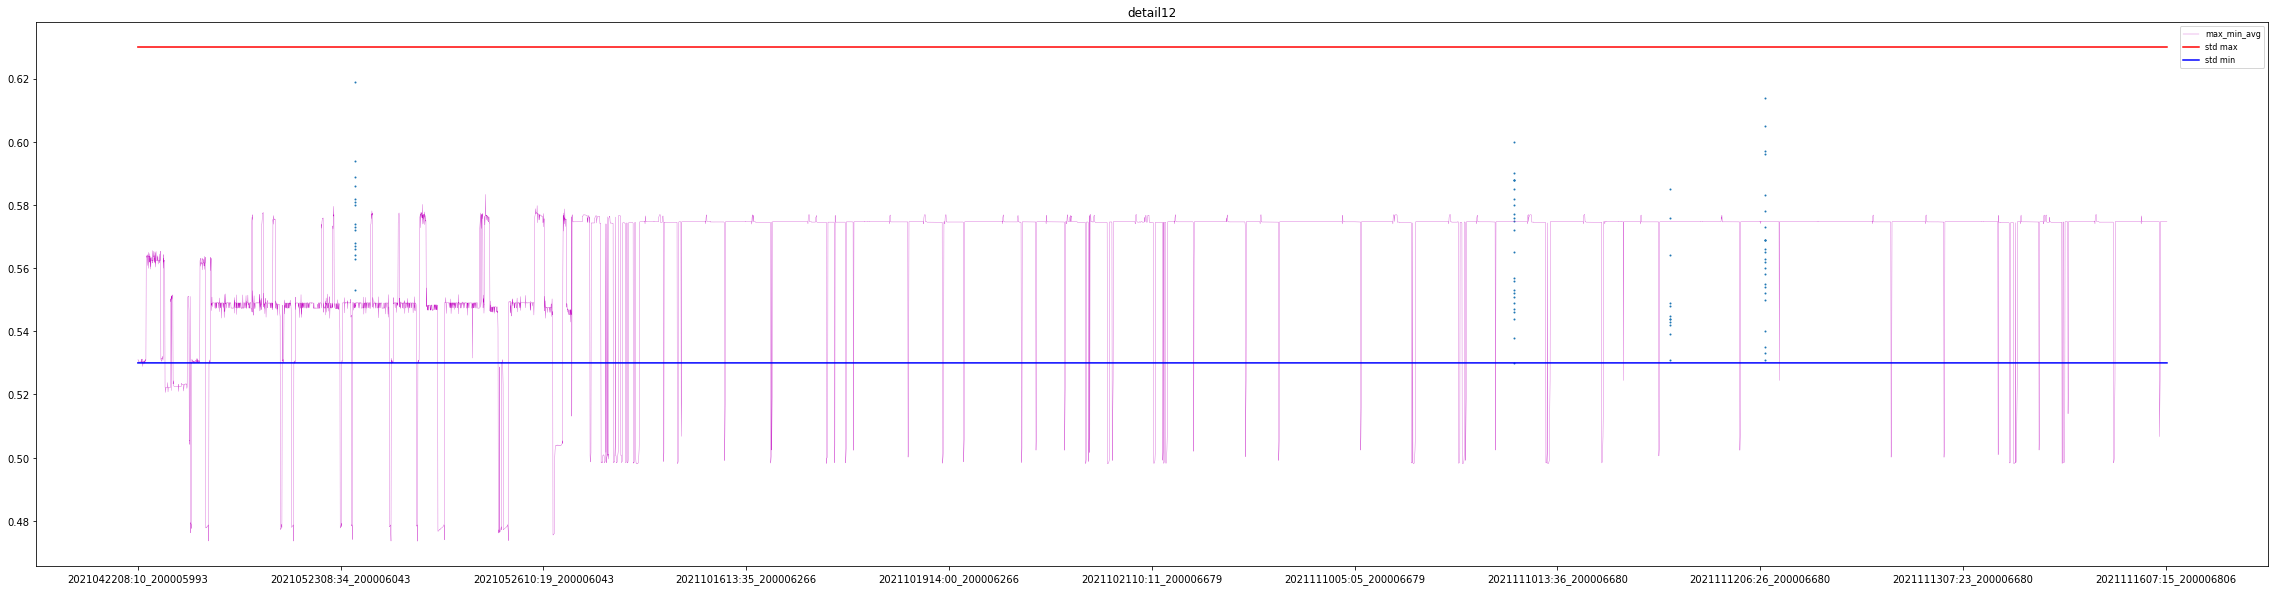

detail13


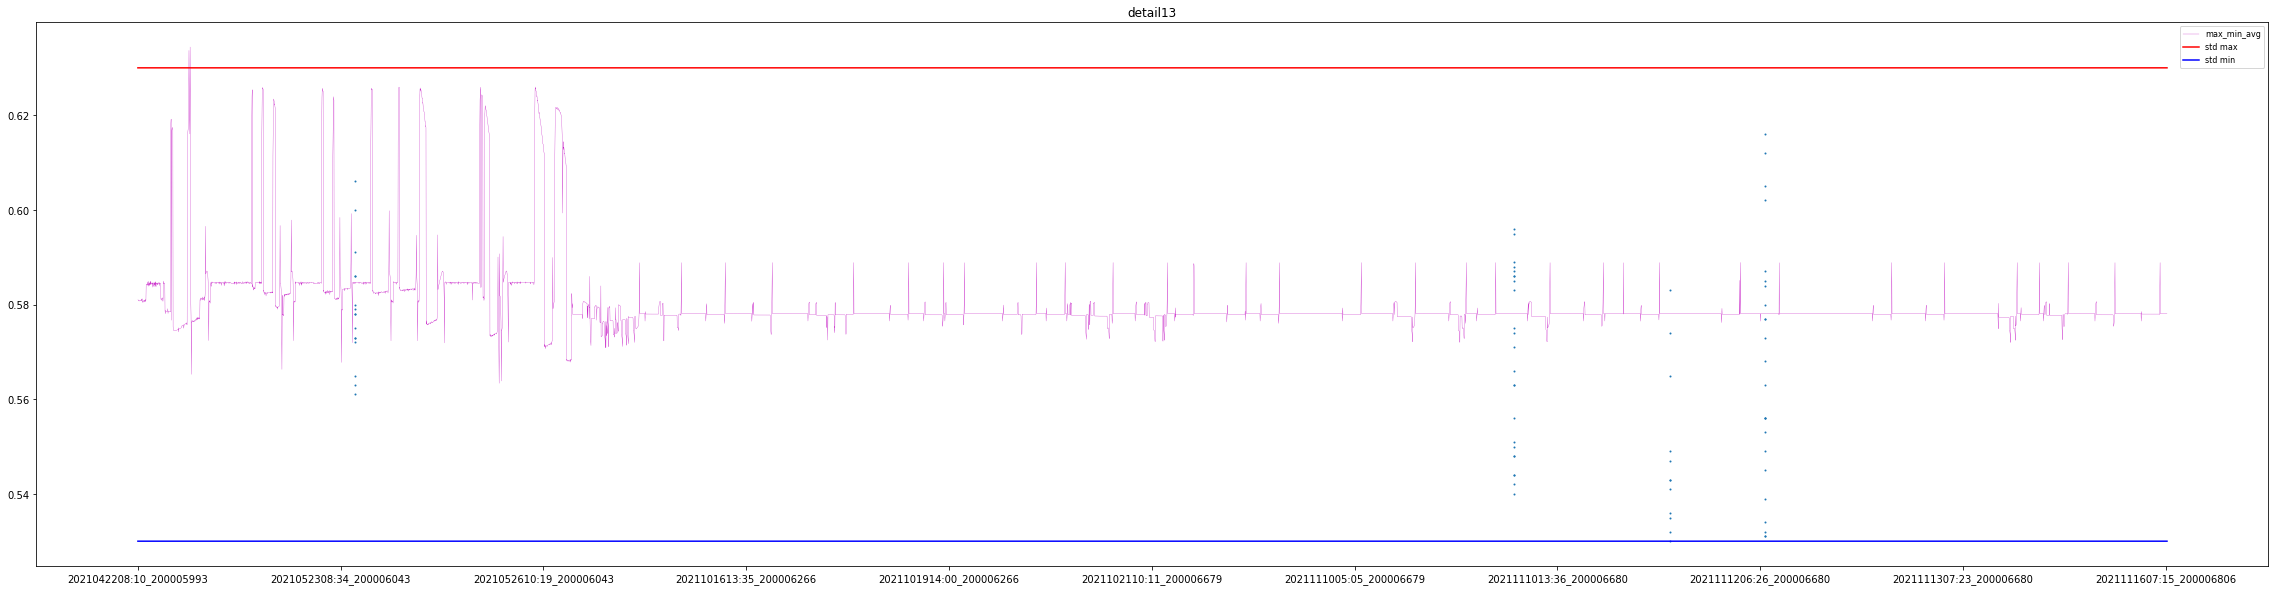

In [ ]:
rate(df)

labels = []
pred_label(by_package, by_machine)

pred_detail_plot("0162B00100",by_package, by_machine)
pred_avg_plot("0162B00100",by_package, by_machine)